In [62]:
import warnings
warnings.simplefilter(action='ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import statsmodels.formula.api as smf
import seaborn as sns
import json
import heapq
import random

from collections import OrderedDict

def unique_ordered_list(input_list):
    # Use an OrderedDict to maintain order and eliminate duplicates
    unique_dict = OrderedDict.fromkeys(input_list)

    # Get the keys (unique values) from the OrderedDict
    unique_list = list(unique_dict.keys())

    return unique_list

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)


def sim(trck,times,distance,dogs,lower_mult,upper_mult,lower_lim,upper_lim,clear_fave,BSP,few_dogs,use_straight_preds,use_320_preds,use_395_preds,use_520_preds,use_traralgon_preds):
    tracks=[trck]

    under_3=False
    for track in tracks:
        if few_dogs == False:
            data=pd.read_csv('class4/'+track+'.csv')
        
        if few_dogs == True:
            data=pd.read_csv('class3/'+track+'.csv')
        
        overall=[]
        for dist in data['Distance'].unique():
            if dist==distance:
                data2=data[data['Distance']==dist]
        #             print(data2.shape[0])
                if(data2.shape[0]>1000):
                    
                    if(use_straight_preds):
                        preds = ['split_z_avg', 'last_5_avg', 'at_cas_dist_time', 'mean_place', 'pir3', 'at_cas_perc', 'collision', 'i1', 'mean_in_race_pos']
                    
                    if(use_320_preds):
                        preds = ['faster_inside','i2','i1','split_z_avg','last_5_avg']
                    
                    if(use_395_preds):
                        preds = ['at_cas_dist_time_avg', 'faster_inside', 'i2', 'i1', 'split_z_avg', 'last_5_avg', 'mean_place', 'time_z_avg']
                    
                    if(use_520_preds):
                        preds = ['at_cas_dist_time_avg', 'faster_inside', 'i2', 'i1', 'split_z_avg', 'last_5_avg', 'mean_place', 'at_cas_perc', 'in_form', 'mean_in_race_pos', 'last_5_avg']
                        
                    if(use_traralgon_preds):
                        preds = ['ctime_z_avg','last_5_avg']
                    
                    data2=data2.dropna(subset = preds)

                    races= data2['RaceId'].unique()

                    if few_dogs == False:
                        invalid = pd.read_csv('Invalid/Invalid_'+track+'.csv')
                        
                    if few_dogs == True:
                        invalid = pd.read_csv('Invalid3/Invalid'+track+'.csv')
                        
                    invalid = list(invalid['Invalid'])
    #                 print(preds)
    
                    mod = LogisticRegression(random_state=42,max_iter=2000).fit(data2[preds], data2['Win'])
                    #mod = mod_straight

                    wins=0
                    losses=0
                    money=0
                    randmoney=0
                    betsize=1
                    
                    data3 = data2.dropna(subset=['price'])

                    ls = list(data3['RaceId'])
                    unique_ordered_lista = unique_ordered_list(ls)

                    for raceid in unique_ordered_lista:
                        if data3[data3['RaceId']==raceid].shape[0] in dogs and raceid not in invalid:                                      
                            race = data3[data3['RaceId']==raceid]
                            race=race.sort_values(by='RunTime')
                            race=race.reset_index()

                            predicted_times = mod.predict_proba(race[preds])
                            predicted_times = np.transpose(predicted_times)[1]
                            predicted_times = predicted_times/sum(predicted_times)
                            our_prices=1/(predicted_times)

                            if BSP==True:
                                prices = list(race['BSP'])
                            if BSP==False:
                                prices = list(race['price'])

                            #print(race)
                            #print(race['Date'][1])
#                             if race['Date'][1] == '2023-02-12':
#                                 print(race)
#                                 print(our_prices)
#                                 print(prices)

                            to_bet_on = np.argmin(our_prices)
                            our_price = our_prices[to_bet_on]
                            their_price = prices[to_bet_on]
                            their_favourite = np.argmin(prices)
                            their_favourite_price = prices[their_favourite]
                            our_take = our_prices[their_favourite]
                            our_prices1 = sorted(our_prices)
                            our_take1 = our_prices1.index(our_take)

                            our_prices1 = list(our_prices.copy())
                            our_prices1.remove(our_price)
                            to_bet_on1 = np.argmin(our_prices1)
                            our_price1 = our_prices1[to_bet_on1] 



                            if our_price1-our_price>1.3:
                                clear_fav = True
                            else:
                                clear_fav = False

#                             if raceid==877730702:
#                                 data3[data3['RaceId']==877730702].to_csv('eeee.csv')


                            if (their_price/our_price>lower_mult and their_price/our_price<upper_mult and their_price>lower_lim and their_price<upper_lim and clear_fav == clear_fave):
#                                 if their_favourite != to_bet_on and their_price<3:
#                                                     rand = random.randint(0, 4)
#                                                     their_price_rand = prices[rand]

#                                                     while their_price_rand > 4.5:
#                                                         rand = random.randint(0, 7)
#                                                         their_price_rand = prices[rand]

#                                                     if(rand==0):
#                                                         randmoney+=(their_price_rand-1)*betsize
#                                                     else:
#                                                         randmoney-=betsize

                                if(to_bet_on==0):
                                    if BSP == True:
                                        money+=(their_price-1)*betsize*0.75
                                        wins+=1
                                    else:
                                        money+=(their_price-1)*betsize
                                        wins+=1


                                    #race = race[race['Place']==to_bet_on+1]
                                    #print(to_bet_on+1)
                                    #print(race[['t1','t2','t3','t4','t5']])
                                    
                                    #print(money)
                                    #print(their_price)
                                    #print('---')
                                    #print(our_price)
                                    #print(race['Date'][1])
                                    #print(our_prices)
                                    #print(our_price)
                                    #print(prices)
                                    #print('win')

#                                     print('---')
#                                     print(our_price)
#                                     print(our_prices[their_favourite])
#                                     print('---')
                                
                                else:
                                    money-=betsize
                                    losses+=1
                                    
#                                     race = race[race['Place']==to_bet_on+1]
#                                     print(race['Trainer'])
#                                     print(to_bet_on+1)
#                                     print(race[['t1','t2','t3','t4','t5']])
                                    
                                    
                                    #print(race[['Place']])
                                    #print(money)
                                    #print(our_price)
                                    #print(race['Date'][1])
                                    #print(raceid)
                                    #print(their_price)
                                    #print(our_prices)
                                    #print(prices)
                                    #print('loss')


                    bets = wins+losses

                    if(bets!=0):
                        invested = bets*betsize
                        roi=100*(money/invested)
                        win_rate = wins/(wins+losses)


                    else:
                        invested=0
                        roi=0
                        win_rate = 0

                    res=[round(roi),round(win_rate,2),bets]
                    #res=[round(roi),round(win_rate,2),bets,'            ',randmoney]
                    


            #df = pd.DataFrame(overall)
            #df.columns=['track','dist','strat','max-size','multiplier','roi','winrate','bets']
    
    return res
        
        

In [66]:
#sim(trck,times,distance,dogs,lower_mult,upper_mult,lower_lim,upper_lim,clear_fav,use_bsp,use_straight_preds,use_320_preeds,use_395_preds,use_520_preds,use_traralgon)

sim('traralgon',False,395,[7,8],   0.3,0.5,    2,7,   False,False,False,   False,False,False,False,True)


[-20, 0.32, 74]

In [4]:
'''
'albion park',False,331,[7,8],   0.1,9,   2.49,2.91,   True,False,False,   False,True,False,False,False
'albion park',False,395,[7,8],   0.1,9,   1.79,2.11,   True,False,False,   False,True,False,False,False
'albion park',False,520,[7,8],   0.1,9,   1.89,2.31,   True,False,False,   False,False,False,True,False
'ballarat',False,390,[7,8],   0.1,9,   2.89,3.31,   True,False,False,   False,True,False,False,False
'bendigo',False,425,[7,8],   0.1,9,   2.49,2.91,   True,False,False,   False,True,False,False,False
'bundaberg',False,460,[7,8],   0.1,9,   2,3,   True,False,False,   False,False,False,True,False
'bundaberg',False,460,[7,8],   0.1,9,   2,3,   False,False,False,   False,False,False,True,False
'cannington',False,275,[7,8],   0.1,9,   2.1,2.7,   True,False,False,   True,False,False,False,False
'cannington',False,380,[7,8],   0.1,9,   2.09,2.51,   True,False,False,   False,True,False,False,False
'capalaba',False,366,[7,8],   0.1,9,    2.19,2.61,   True,False,False,   False,True,False,False,False (lept out massively to sit at top of range)
'capalaba',False,366,[7,8],   0.1,9,    2.69,3.31,   True,False,False,   False,True,False,False,False
'casino',False,411,[7,8],   0.1,9,   2.59,3.11,   True,False,False,   False,True,False,False,False
'dapto',False,297,[7,8],   0.1,9,   2,2.71,   True,False,False,   True,False,False,False,False
'darwin',False,383,[7,8],   0.1,9,   1.6,2.4,   True,False,False,   False,True,False,False,False
'gawler',False,400,[7,8],   0.1,9,   2.3,3,   True,False,False,   False,True,False,False,False
'geelong',False,400,[7,8],   0.1,9,   2.1,2.5,   True,False,False,   False,True,False,False,False
lay----'gosford',False,388,[7,8],   0.1,9,   1.89,2.41,   True,False,False,   False,True,False,False,False
lay----'goulburn',False,350,[7,8],   0.1,9,   1.79,2.21,   True,False,False,   False,True,False,False,False
'grafton',False,350,[7,8],   0.1,9,    2.19,2.7,   True,False,False,   False,True,False,False,False
lay----'horsham',False,410,[7,8],   0.1,9,   1.79,2.21,   True,False,False,   False,True,False,False,False
'ipswich',False,288,[7,8],   0.1,9,   1.79,2.11,   True,False,False,   False,True,False,False,False
'launceston',False,278,[7,8],   0.1,9,   1.7,2.7,   True,False,False,   True,False,False,False,False
'maitland',False,400,[7,8],   0.1,9,   1.6,2.7,   True,False,False,   False,True,False,False,False
'mount gambier',False,400,[7,8],   0.1,9,   1,2.8,   True,False,False,   False,True,False,False,False
'murray bridge',False,300,[7,8],   0.1,9,   1,4,   True,False,False,   True,False,False,False,False
lay----'richmond',False,320,[7,8],   0.1,9,   1.69,2.21,   True,False,False,   True,False,False,False,False
'richmond',False,401,[7,8],   0.1,9,   1.69,2.11,   True,False,False,   False,True,False,False,False
'rockhampton',False,407,[7,8],   0.1,9,   1.5,2.21,   True,False,False,   False,True,False,False,False
'sandown park',False,515,[7,8],   0.1,9,    2.39,2.91,   True,False,False,   False,True,False,False,False
'shepparton',False,390,[7,8],   0.1,9,   1.7,2.7,   False,False,False,   False,True,False,False,False
'the meadows',False,525,[7,8],   0.1,9,   3,3.6,   True,False,False,   False,False,False,True,False
'townsville',False,380,[7,8],   0.1,9,   3.09,3.91,   True,False,False,   False,True,False,False,False
'warragul',False,400,[7,8],   0.1,9,   2,2.6,   True,False,False,   False,True,False,False,False
'wentworth park',False,520,[7,8],   0.1,9,   2.9,3.4,   True,False,False,   False,False,False,True,False

$10,550
'''

"\n'albion park',False,331,[7,8],   0.1,9,   2.49,2.91,   True,False,False,   False,True,False,False,False\n'albion park',False,395,[7,8],   0.1,9,   1.79,2.11,   True,False,False,   False,True,False,False,False\n'albion park',False,520,[7,8],   0.1,9,   1.89,2.31,   True,False,False,   False,False,False,True,False\n'ballarat',False,390,[7,8],   0.1,9,   2.89,3.31,   True,False,False,   False,True,False,False,False\n'bendigo',False,425,[7,8],   0.1,9,   2.49,2.91,   True,False,False,   False,True,False,False,False\n'bundaberg',False,460,[7,8],   0.1,9,   2,3,   True,False,False,   False,False,False,True,False\n'bundaberg',False,460,[7,8],   0.1,9,   2,3,   False,False,False,   False,False,False,True,False\n'cannington',False,275,[7,8],   0.1,9,   2.1,2.7,   True,False,False,   True,False,False,False,False\n'cannington',False,380,[7,8],   0.1,9,   2.09,2.51,   True,False,False,   False,True,False,False,False\n'casino',False,411,[7,8],   0.1,9,   2.59,3.11,   True,False,False,   False,Tr

In [ ]:
'''
-maitland
-mount gambier
-warrnambool
-goulburn
-warragul
-geelong
-wentworth park
-angle park
-the gardens
-cannington
-the meadows
-ipswich
-capalaba
-darwin
-sandown park
-albion park
-richmond
-traralgon
-gunnedah
-geelong
-shepparton
-maitland
'''

bendigo 425
{1.5: 19, 1.6: 18, 1.7: 18, 1.8: 17, 1.9: 22, 2.0: 19, 2.1: 20, 2.2: 18, 2.3: 15, 2.4: 15, 2.5: 13, 2.6: 15, 2.7: 17, 2.8: 17, 2.9000000000000004: 16}
albion park 395
{1.5: 13, 1.6: 17, 1.7: 13, 1.8: 15, 1.9: 10, 2.0: 10, 2.1: 13, 2.2: 15, 2.3: 15, 2.4: 16, 2.5: 15, 2.6: 14, 2.7: 14}
mount gambier 400
{}
shepparton 390
{}
traralgon 395
{1.5: 14, 1.6: 17, 1.7: 14, 1.8: 13, 1.9: 11, 2.0: 10}
ballarat 390
{1.5: 17, 1.6: 20, 1.7: 19, 1.8: 19, 1.9: 18, 2.0: 18, 2.1: 17, 2.2: 21, 2.3: 21, 2.4: 22, 2.5: 20, 2.6: 17, 2.7: 13, 2.8: 18, 2.9000000000000004: 19, 3.0: 15, 3.1: 18, 3.2: 16, 3.3: 15, 3.4000000000000004: 17, 3.5: 14}
warragul 400
{1.5: 15, 1.6: 16, 1.7: 18, 1.8: 16, 1.9: 13, 2.0: 14, 2.1: 12, 2.2: 12, 2.3: 13, 2.4: 14, 2.5: 13, 2.6: 17, 2.7: 15, 2.8: 13, 2.9000000000000004: 10, 3.0: 10}
horsham 410
{1.5: 16, 1.6: 13, 1.7: 13, 1.8: 11, 1.9: 14, 2.0: 13, 2.1: 15, 2.2: 10}
geelong 400
{1.5: 20, 1.6: 22, 1.7: 16, 1.8: 19, 1.9: 18, 2.0: 15, 2.1: 18, 2.2: 16, 2.3: 20, 2.4: 20, 2

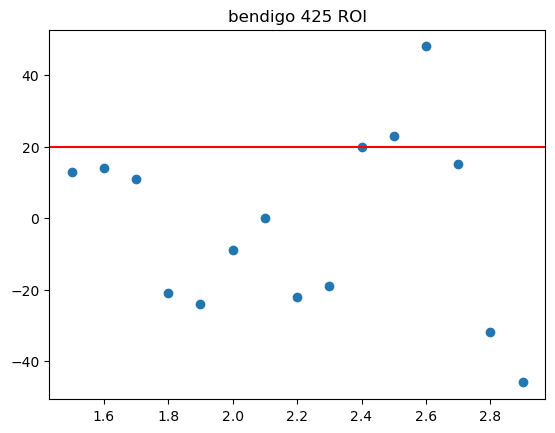

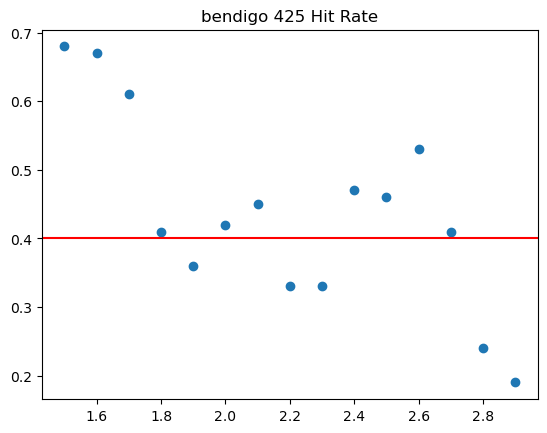

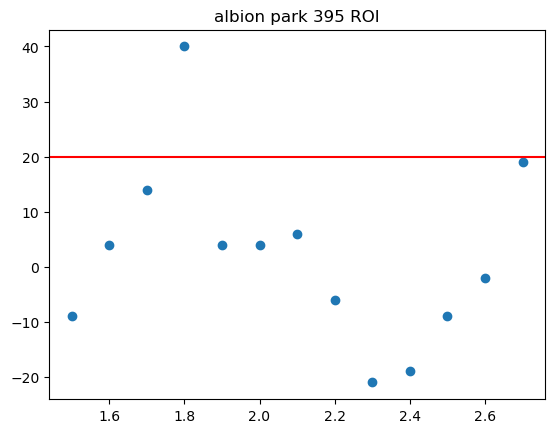

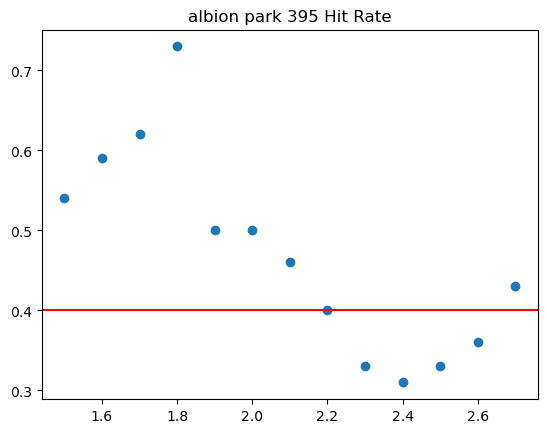

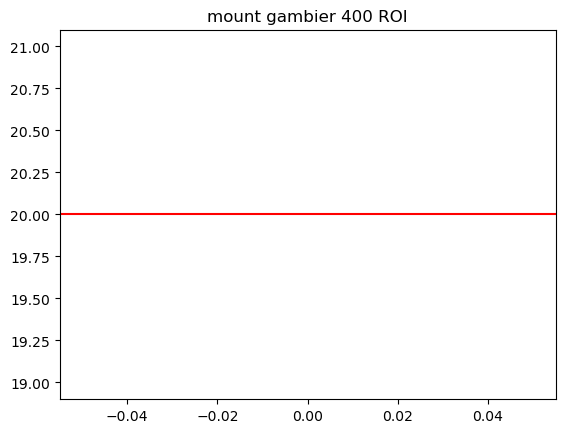

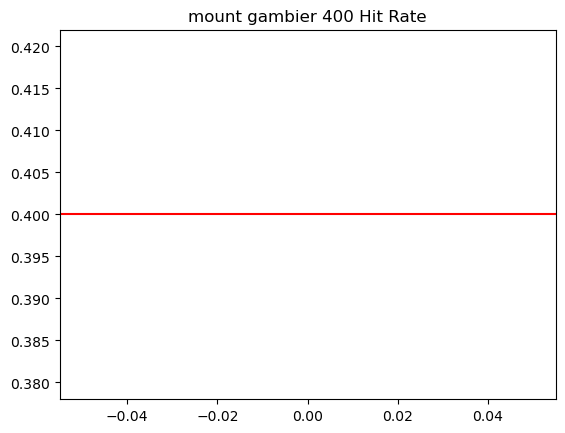

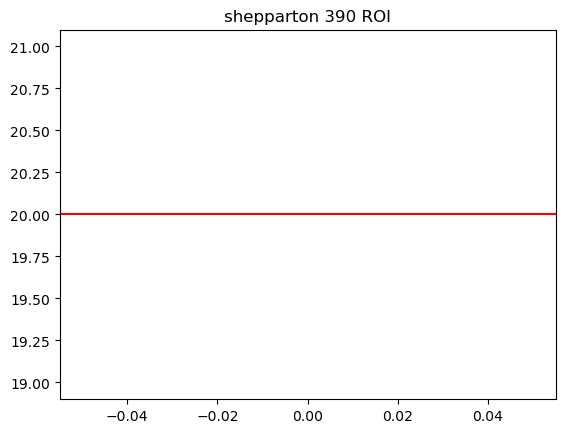

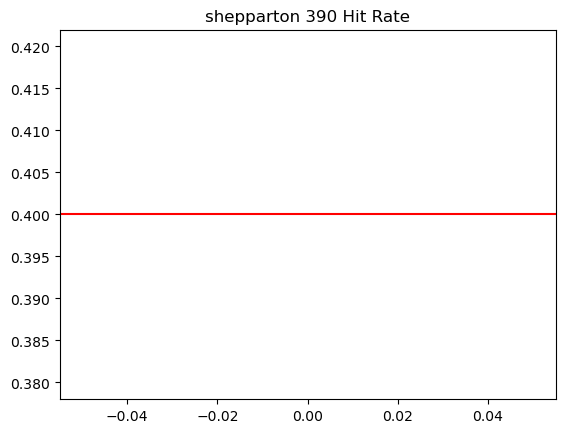

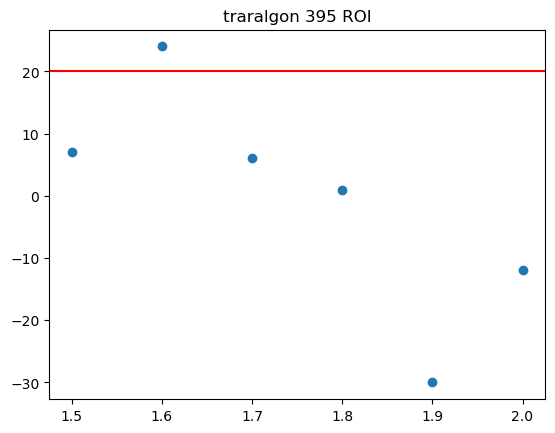

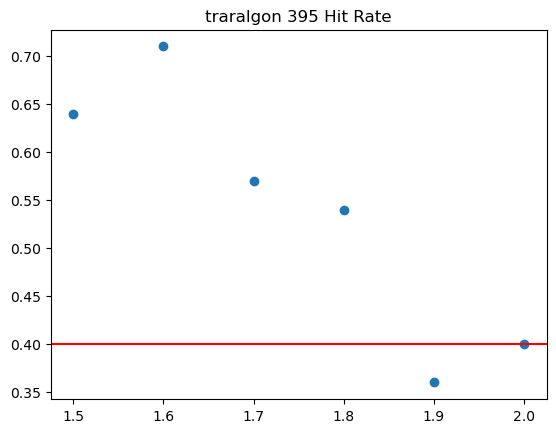

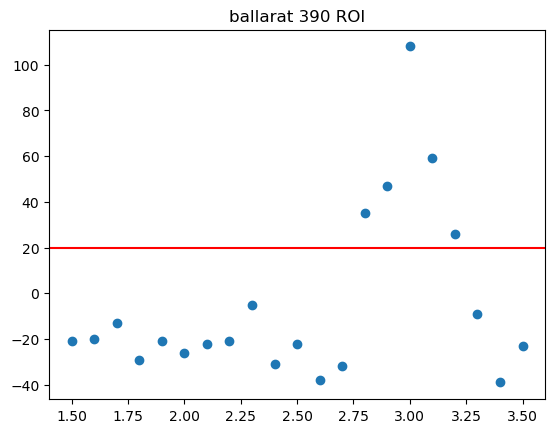

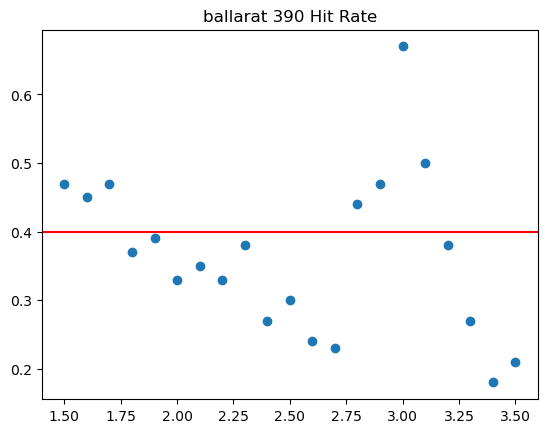

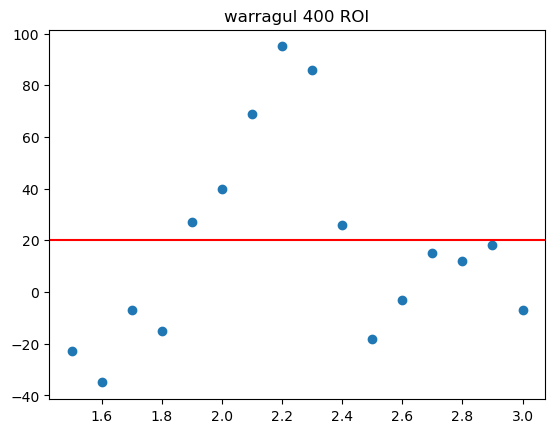

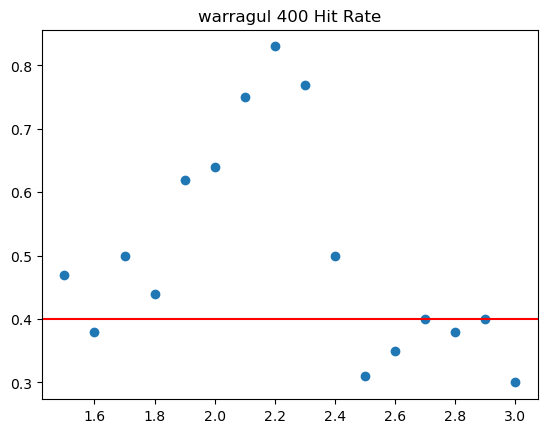

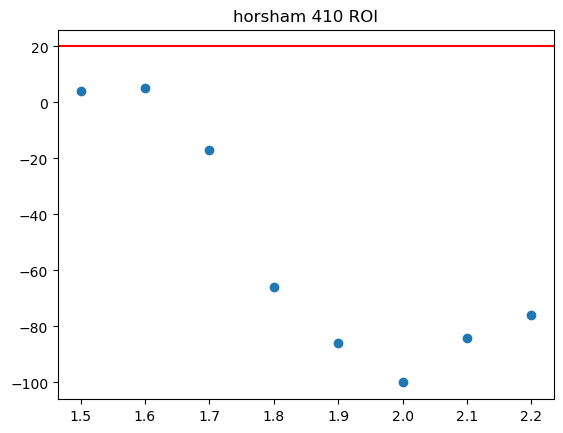

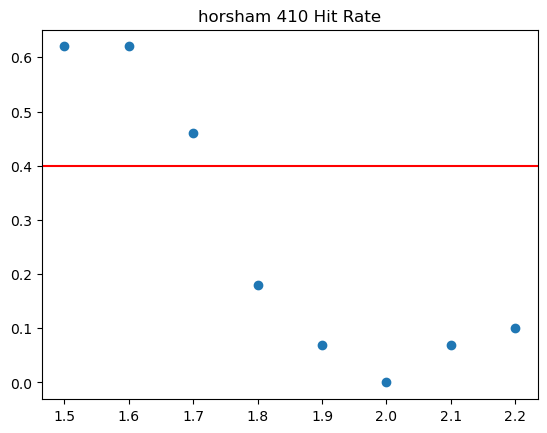

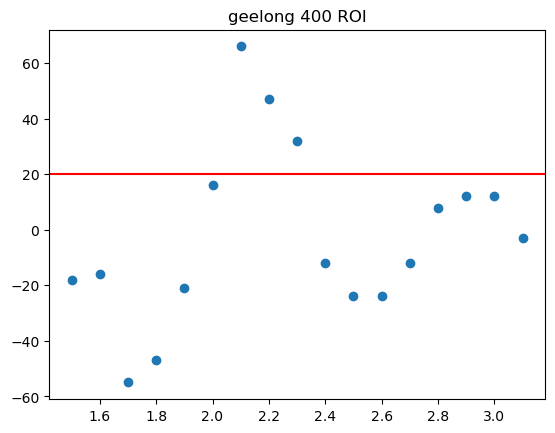

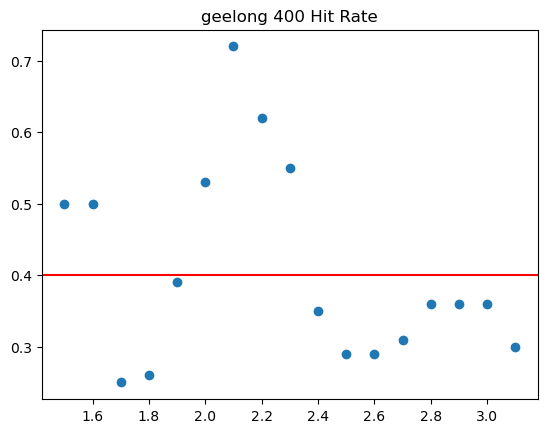

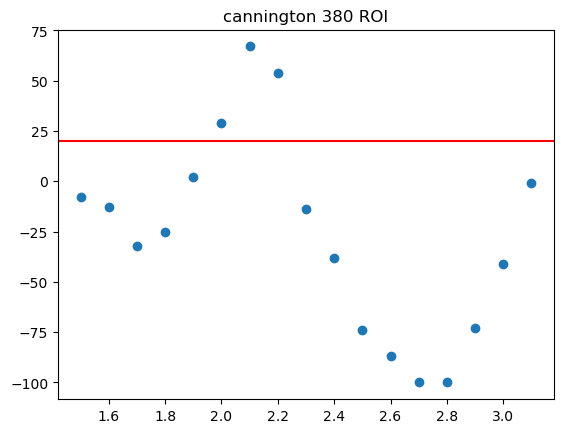

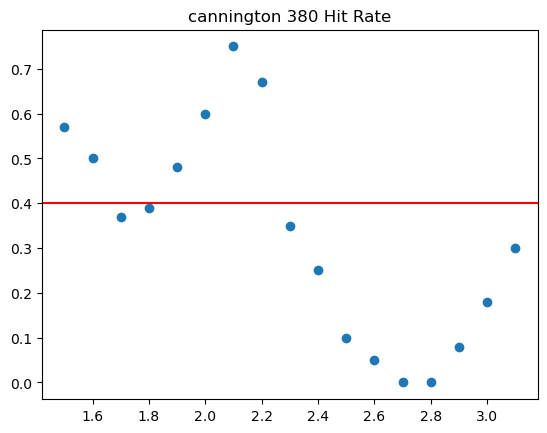

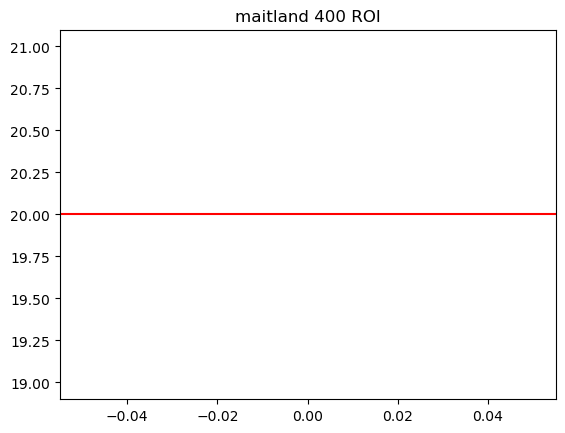

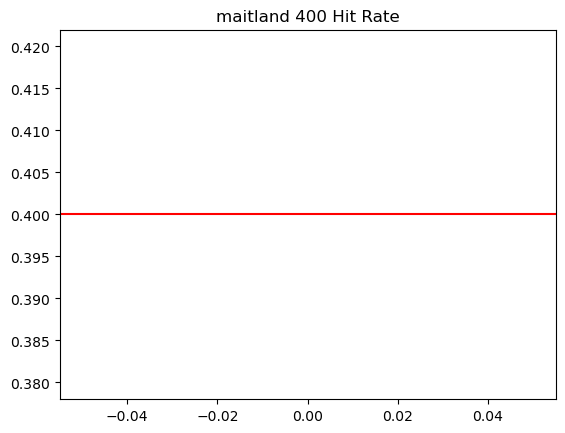

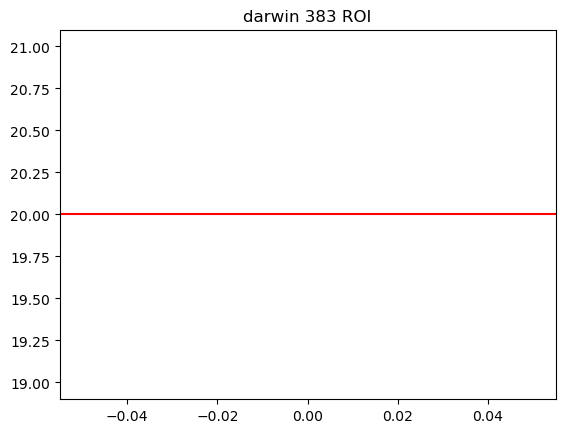

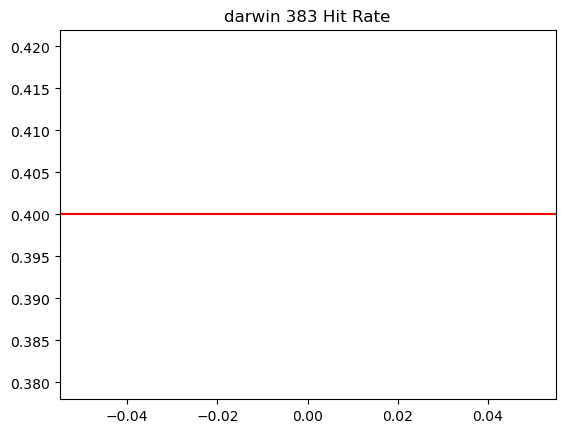

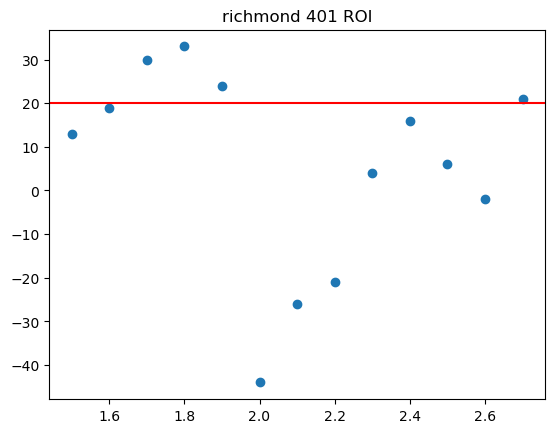

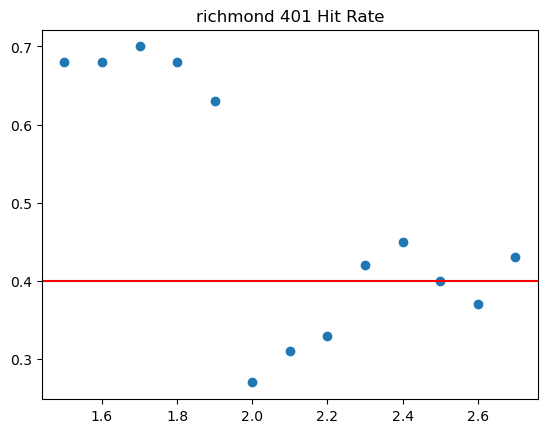

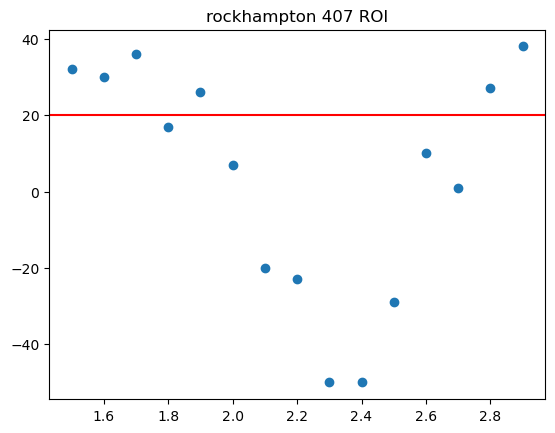

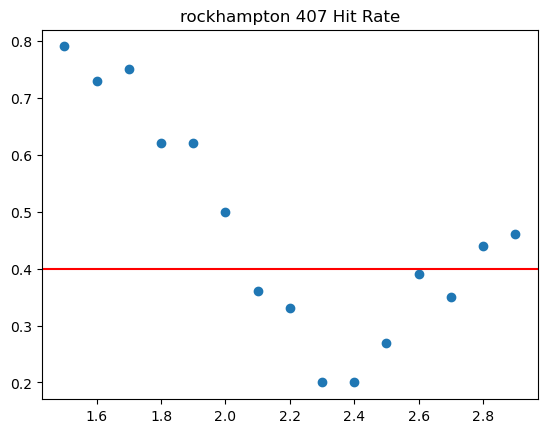

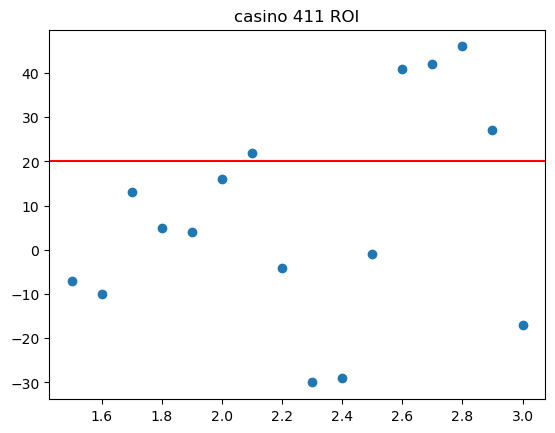

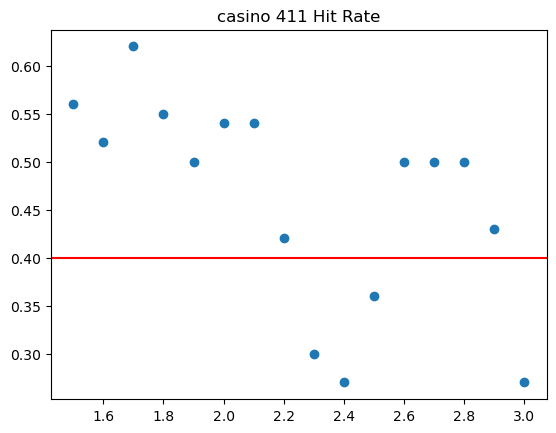

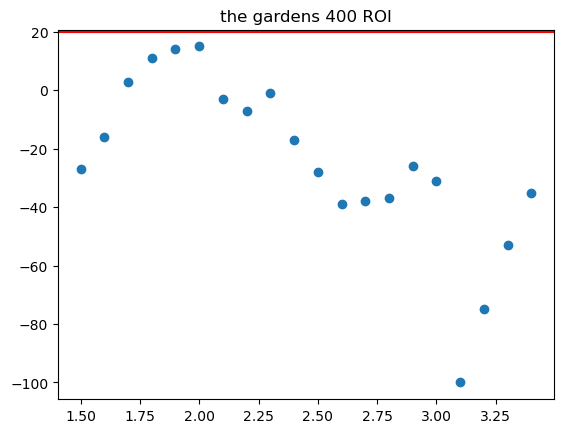

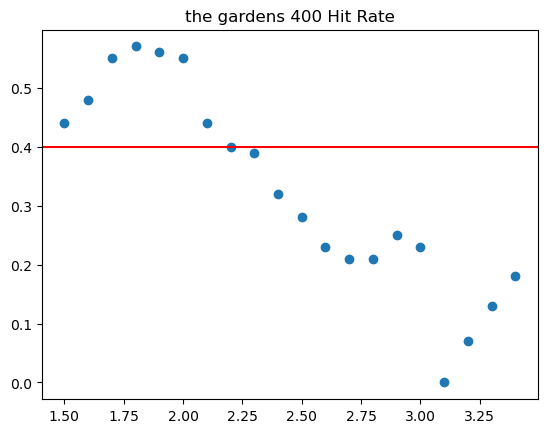

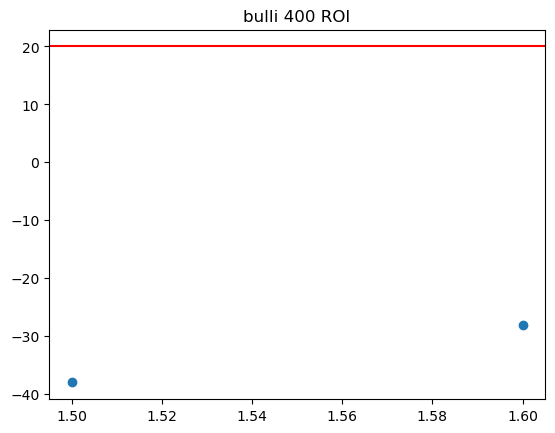

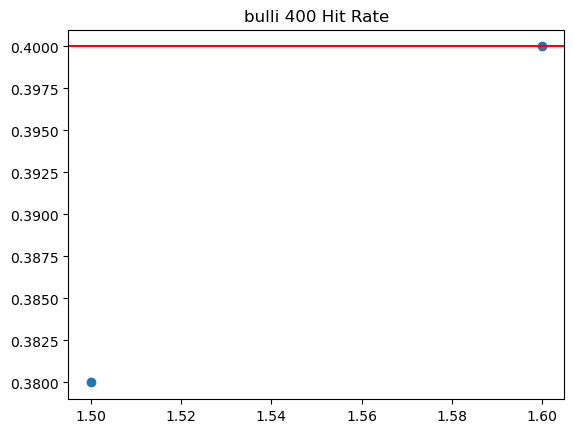

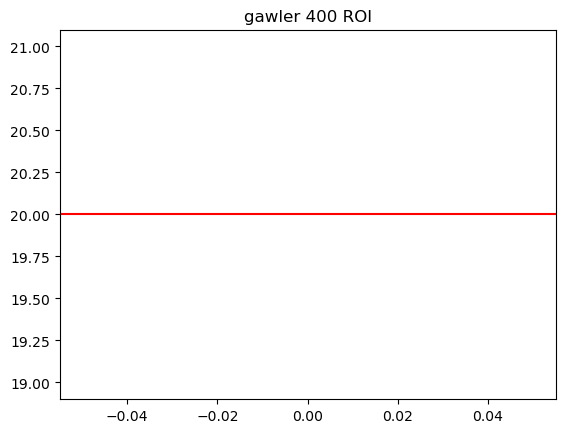

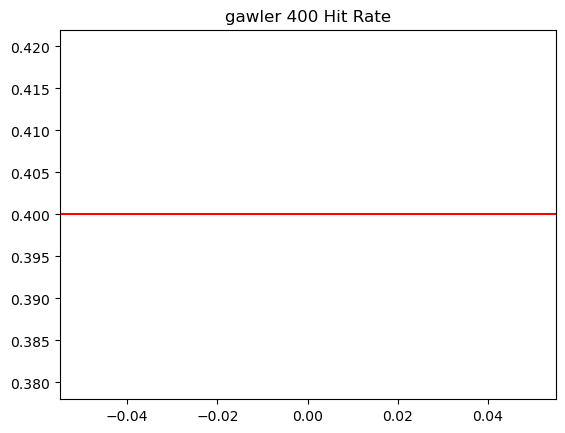

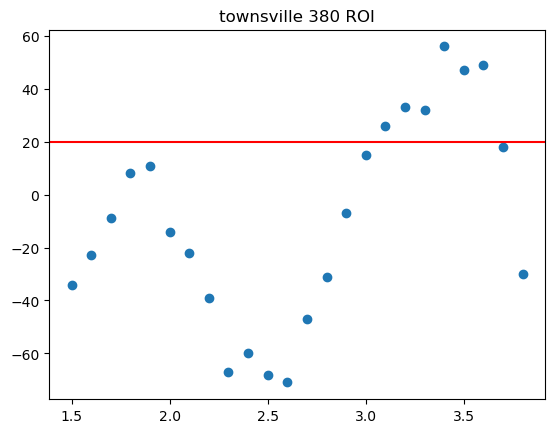

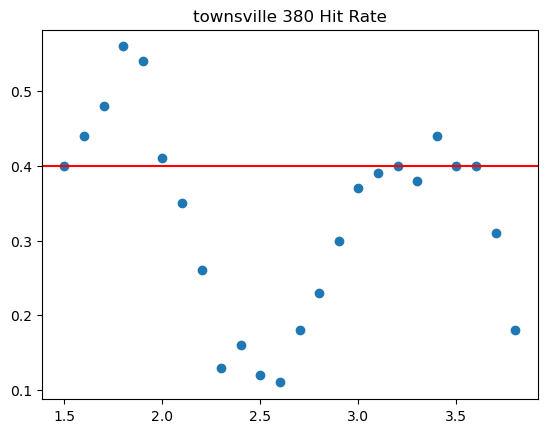

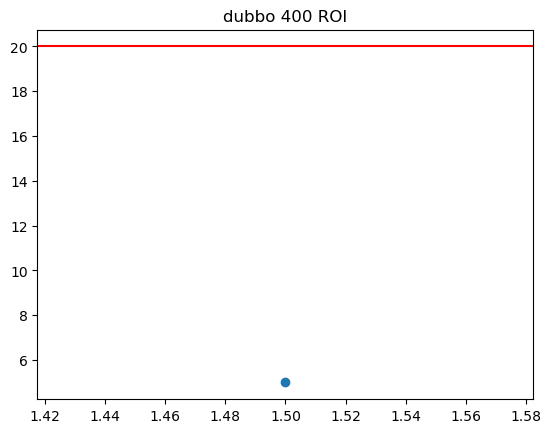

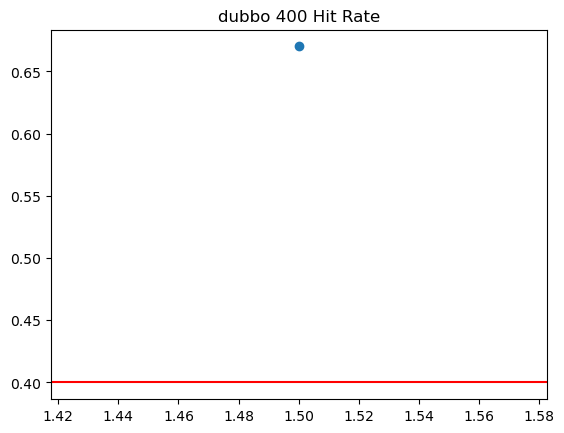

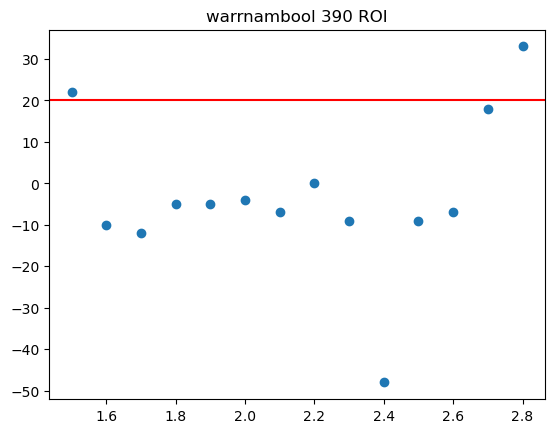

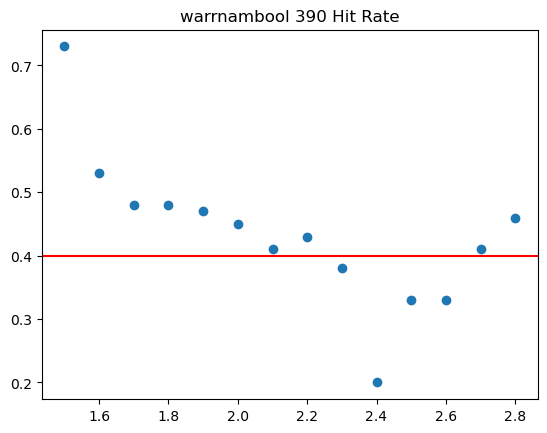

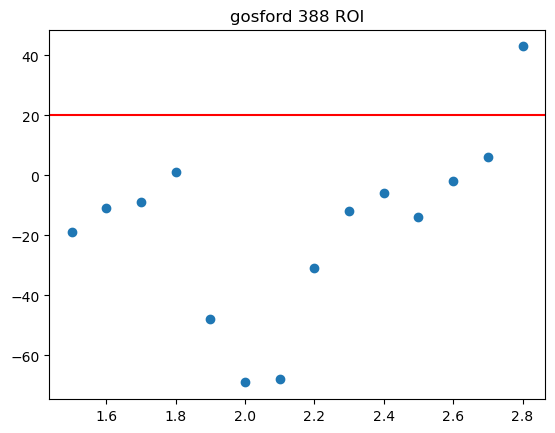

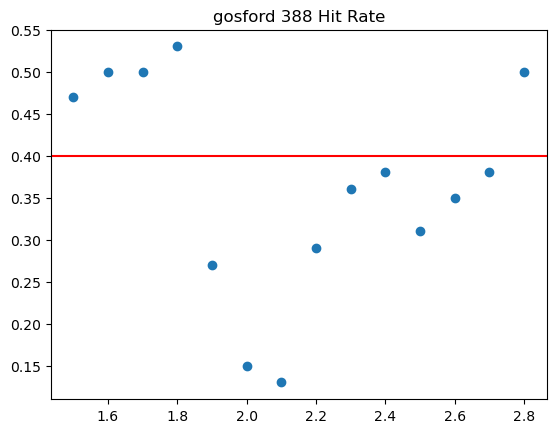

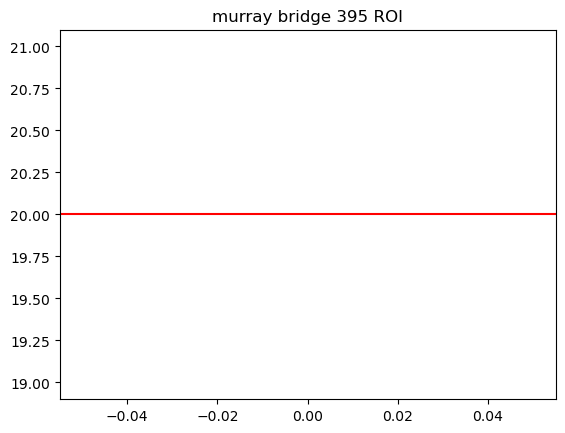

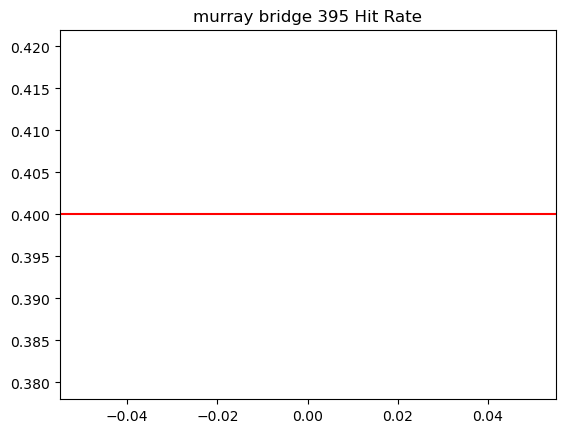

In [296]:
#395 Clear Fav 320 preds

for x in dick.keys():
    
    kra = 0
    for y in dick[x]:
        if y>375 and y<430:
            kra = y
            
    if kra != 0:
        dic = {}
        tracker = []
        rois = []
        hits = []
        bets = []

        for i in range(0,41):
            ls = sim(x,False,kra,[7,8],   0.1,47,   (1.49+i*0.1),(1.81+i*0.1),   True,False,False,   False,True,False,False,False)
            if ls[2]>9:
                tracker.append(1.5+i*0.1)
                rois.append(ls[0])
                hits.append(ls[1])
                bets.append(ls[2])
                dic[1.5+i*0.1] = ls[2]
            else:
                break

        f1 = plt.figure()
        f2 = plt.figure()
        g1 = f1.add_subplot(111)
        g1.scatter(tracker,rois)
        g1.axhline(y = 20, color = 'r', linestyle = '-')
        g2 = f2.add_subplot(111)
        g2.scatter(tracker,hits)
        g2.axhline(y = 0.4, color = 'r', linestyle = '-')
        g1.title.set_text(x+' '+str(kra)+' '+'ROI')
        g2.title.set_text(x+' '+str(kra)+' '+'Hit Rate')
        plt.draw()
        print(x,kra)
        print(dic)
        
plt.show()

bendigo 425
{1.5: 37, 1.6: 31, 1.7: 34, 1.8: 27, 1.9: 37, 2.0: 38, 2.1: 36, 2.2: 41, 2.3: 45, 2.4: 45, 2.5: 44, 2.6: 47, 2.7: 38, 2.8: 38, 2.9000000000000004: 40, 3.0: 30, 3.1: 31, 3.2: 32, 3.3: 31, 3.4000000000000004: 36, 3.5: 39, 3.6: 38, 3.7: 35, 3.8000000000000003: 25, 3.9000000000000004: 26, 4.0: 16, 4.1: 18, 4.2: 23, 4.300000000000001: 25, 4.4: 25, 4.5: 28, 4.6: 23, 4.7: 35, 4.800000000000001: 35, 4.9: 24, 5.0: 24}
albion park 395
{1.5: 13, 1.6: 14, 1.7: 16, 1.8: 16, 1.9: 14, 2.0: 18, 2.1: 21, 2.2: 28, 2.3: 27, 2.4: 24, 2.5: 24, 2.6: 19, 2.7: 21, 2.8: 19, 2.9000000000000004: 17, 3.0: 21, 3.1: 20, 3.2: 21, 3.3: 22, 3.4000000000000004: 20, 3.5: 18, 3.6: 19, 3.7: 22, 3.8000000000000003: 17, 3.9000000000000004: 19, 4.0: 14, 4.1: 13, 4.2: 14}
mount gambier 400
{}
shepparton 390
{}
traralgon 395
{}
ballarat 390
{1.5: 10}
warragul 400
{1.5: 17, 1.6: 15, 1.7: 22, 1.8: 23, 1.9: 24, 2.0: 19, 2.1: 17, 2.2: 27, 2.3: 35, 2.4: 42, 2.5: 42, 2.6: 38, 2.7: 31, 2.8: 25, 2.9000000000000004: 23, 3.0

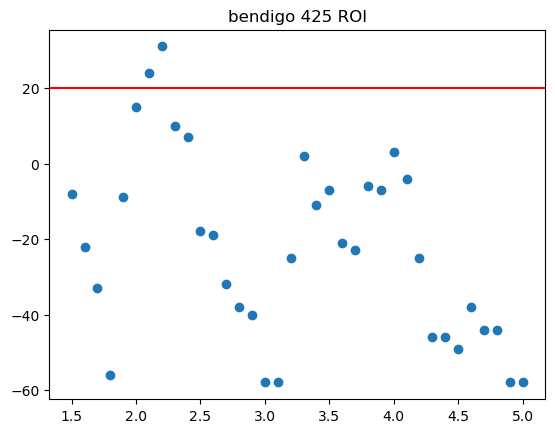

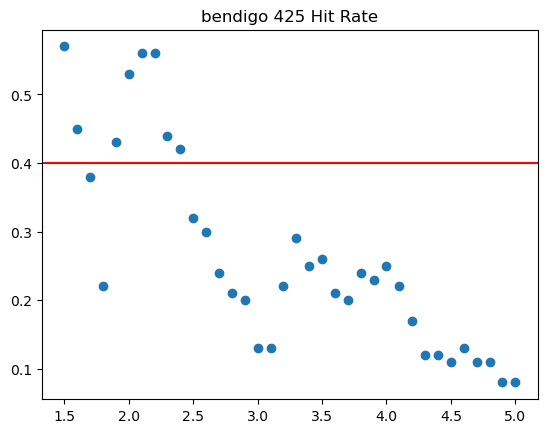

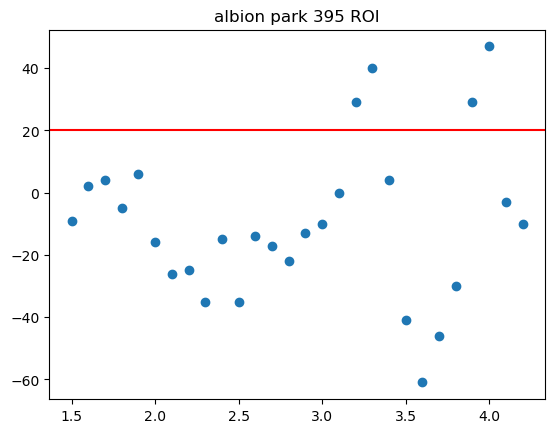

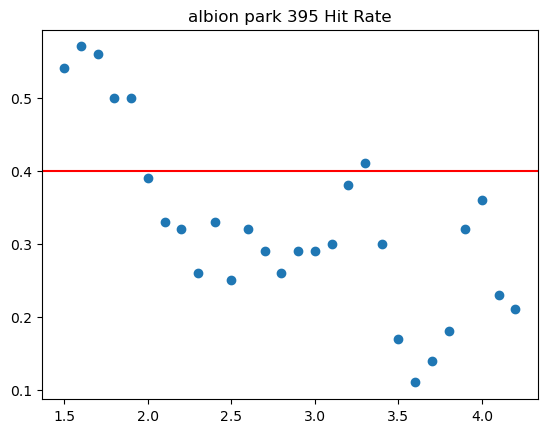

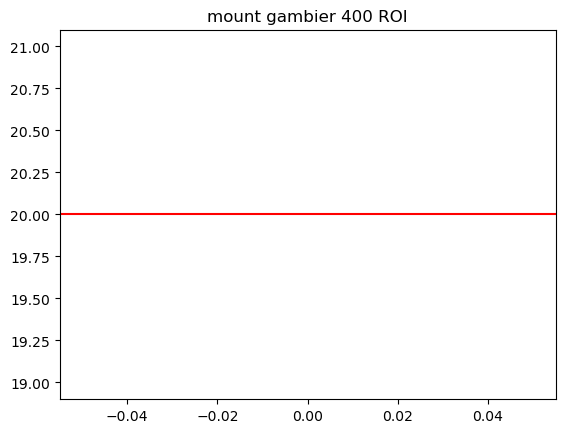

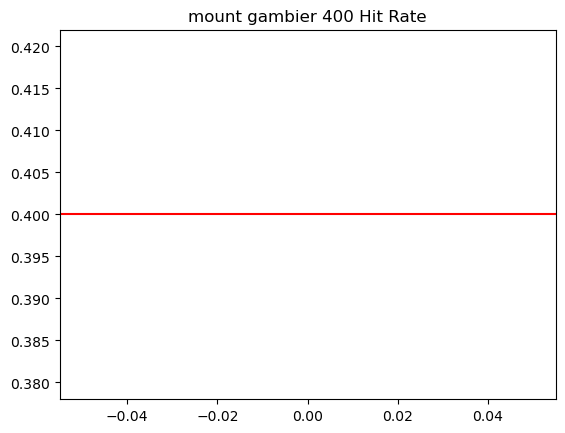

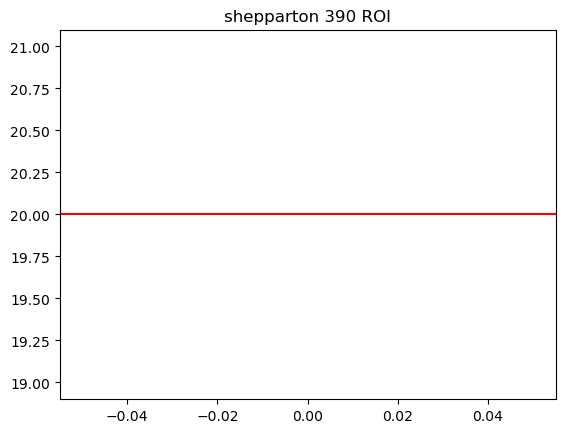

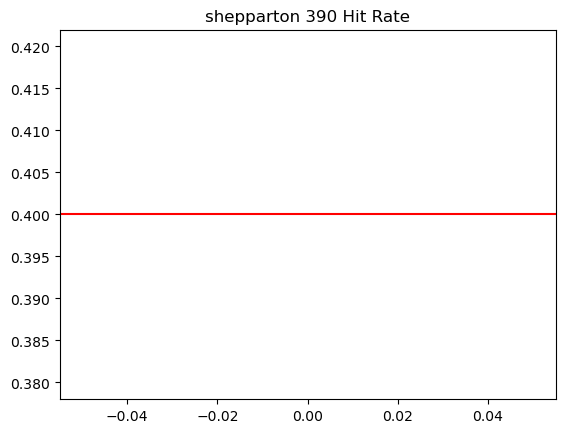

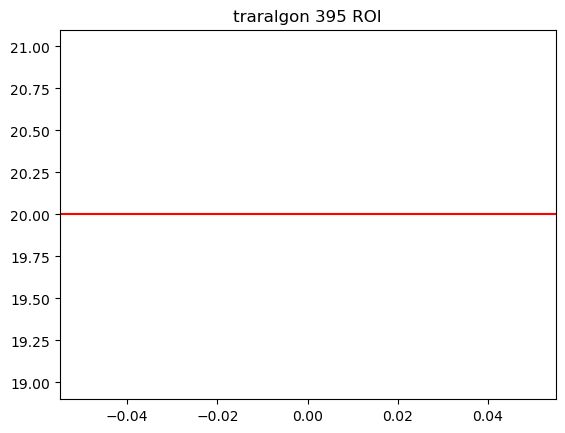

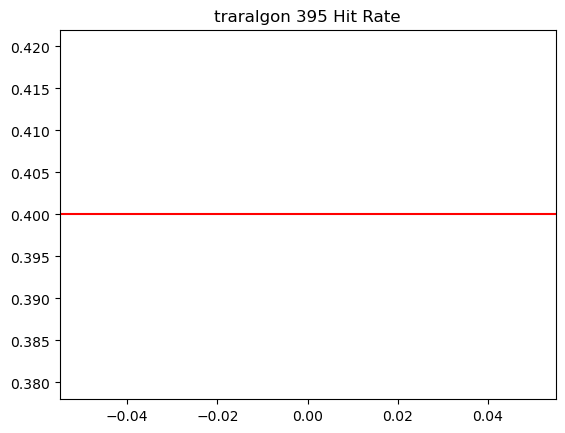

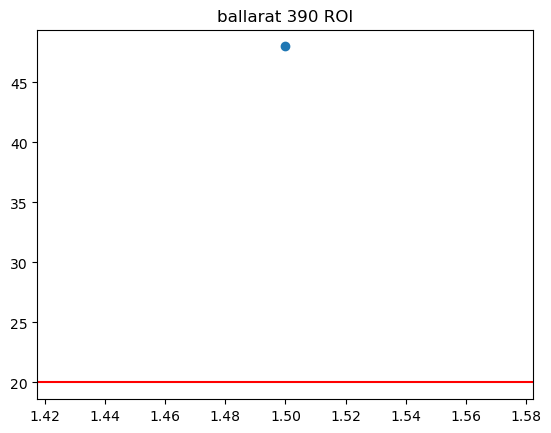

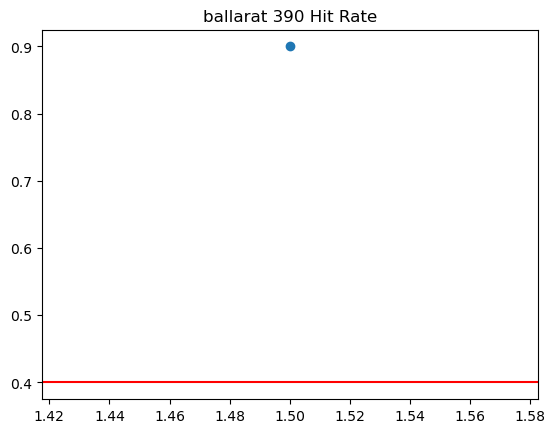

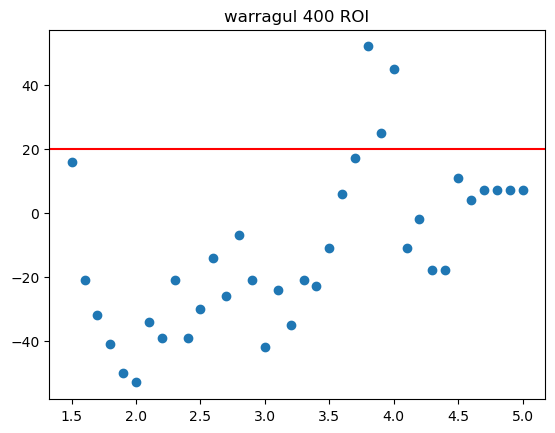

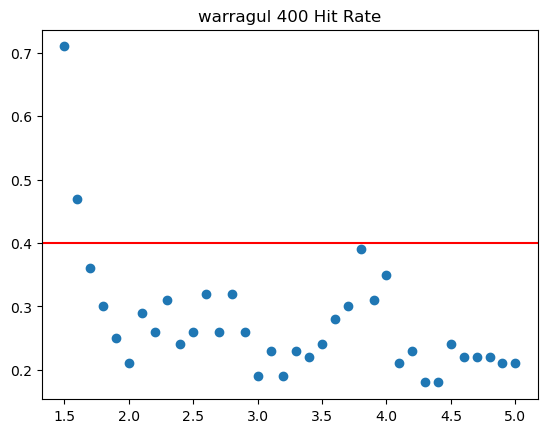

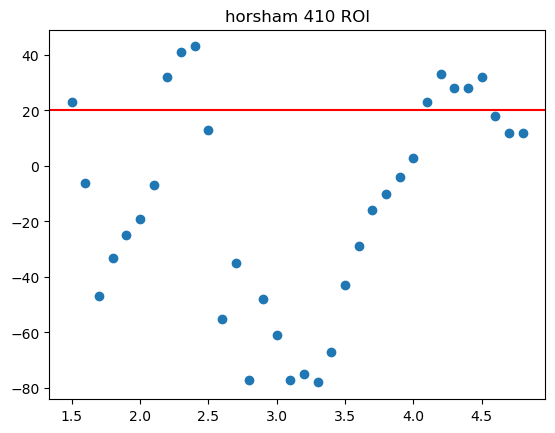

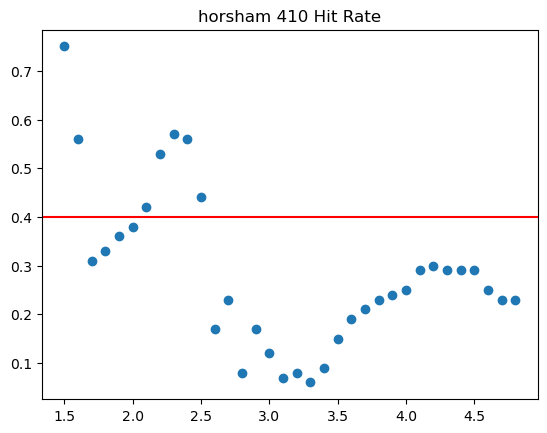

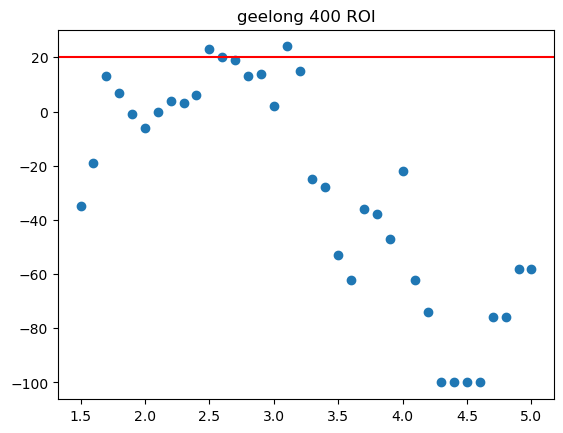

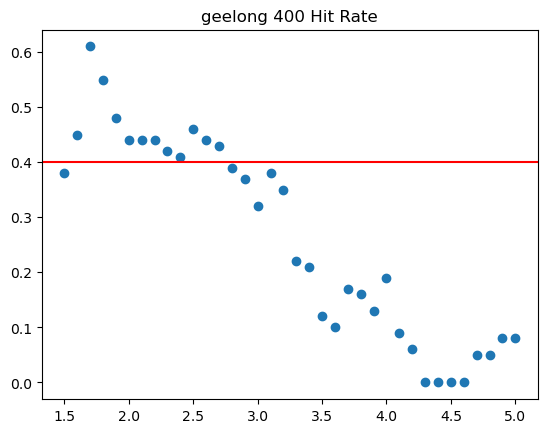

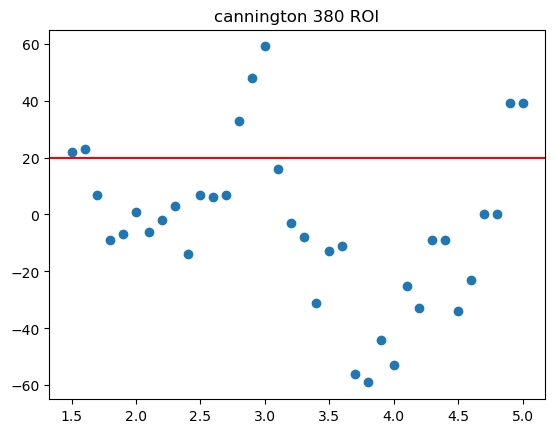

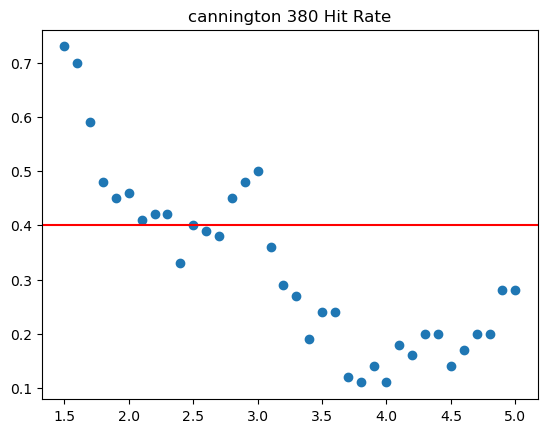

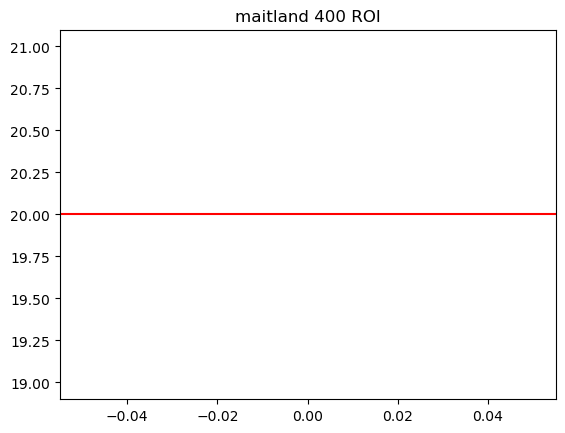

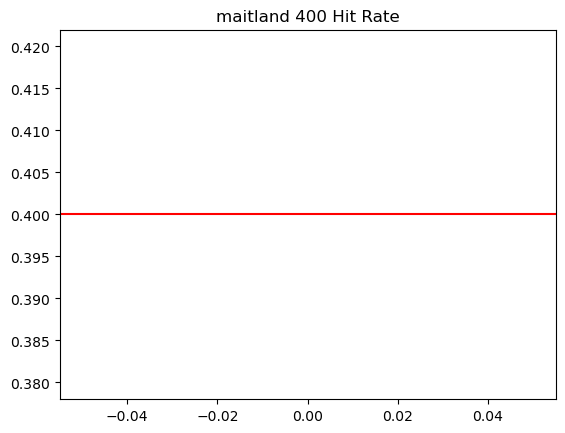

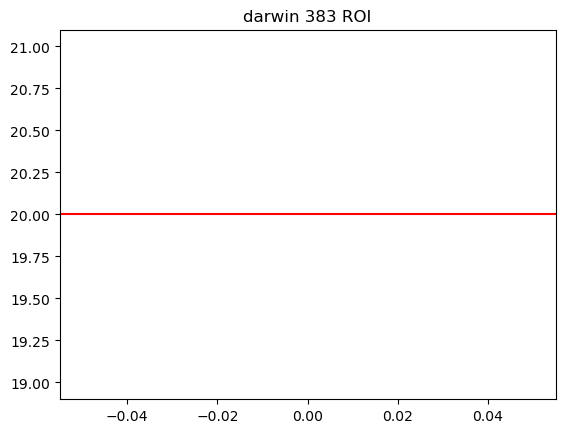

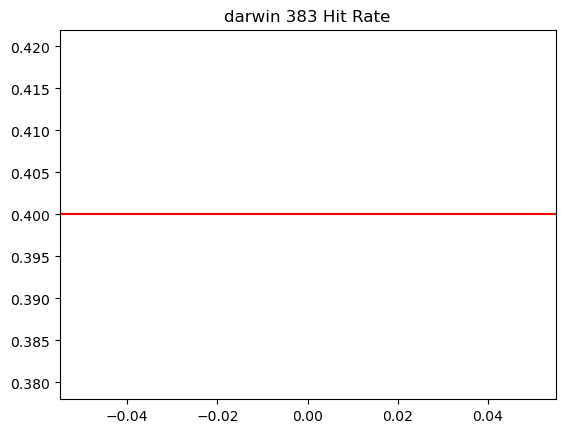

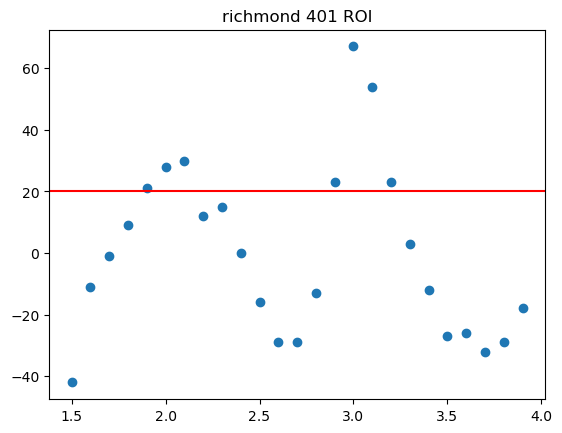

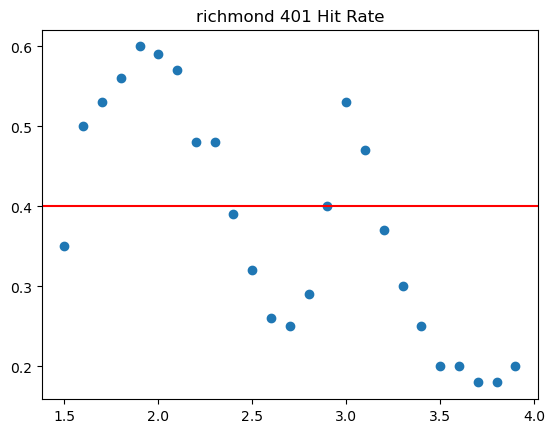

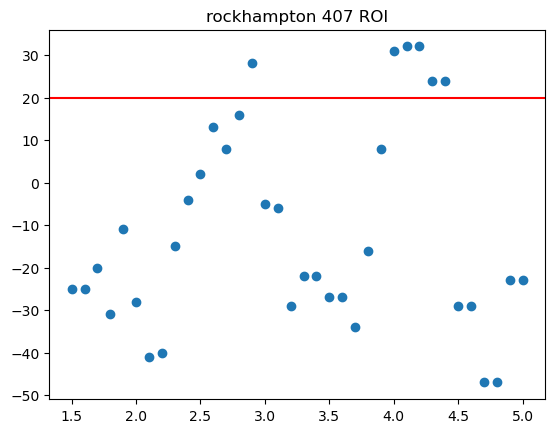

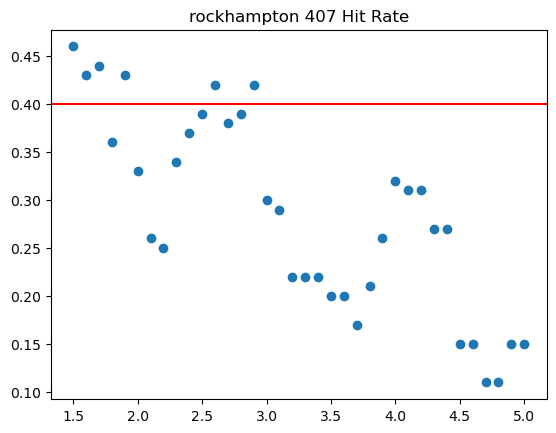

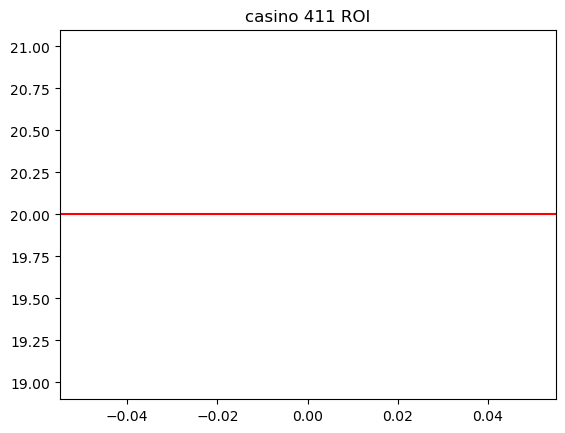

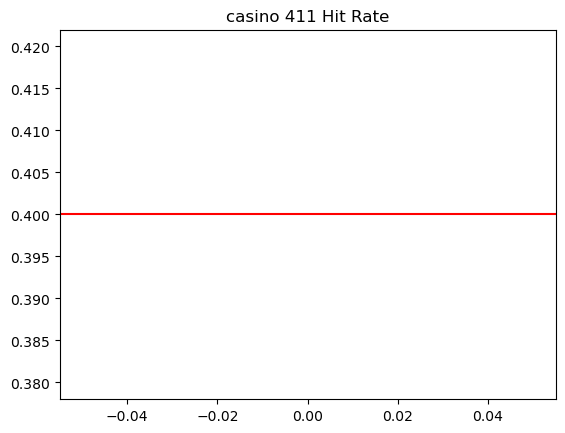

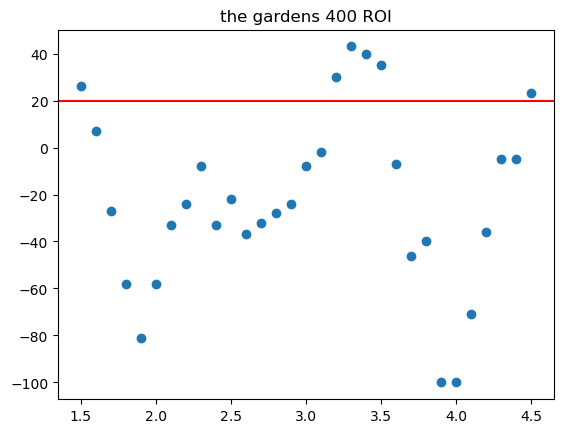

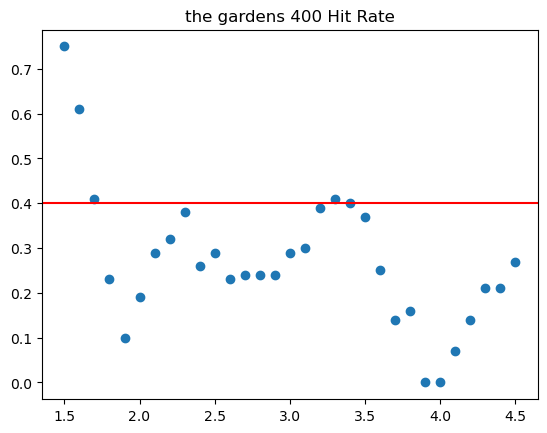

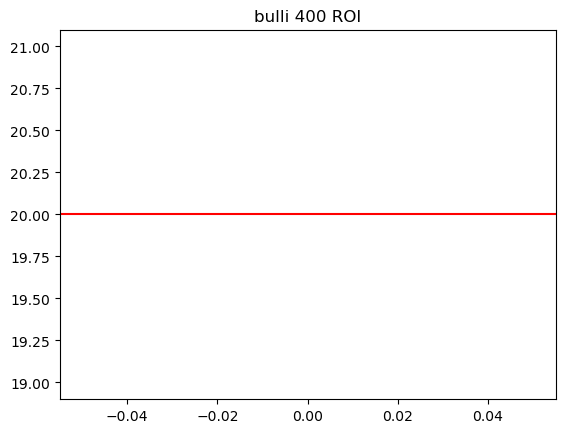

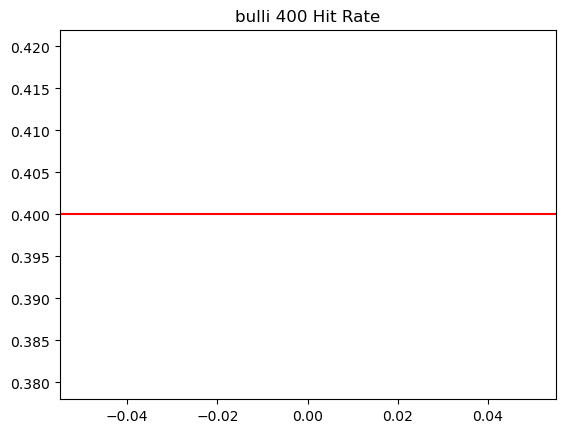

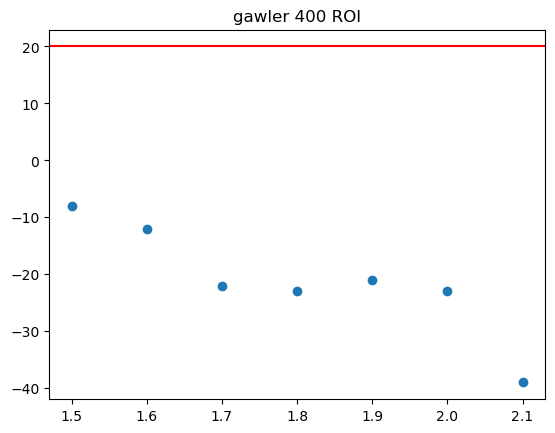

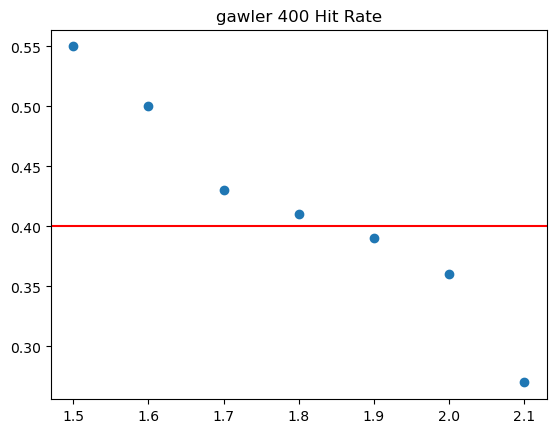

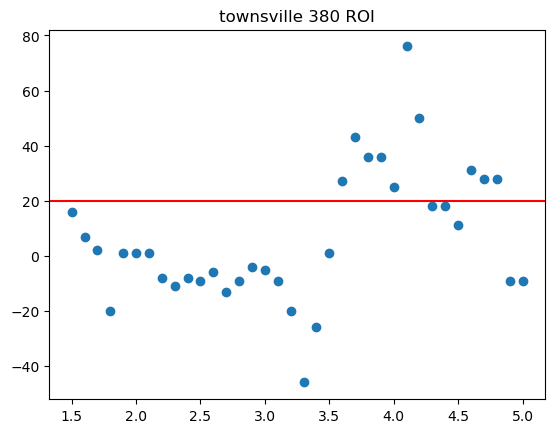

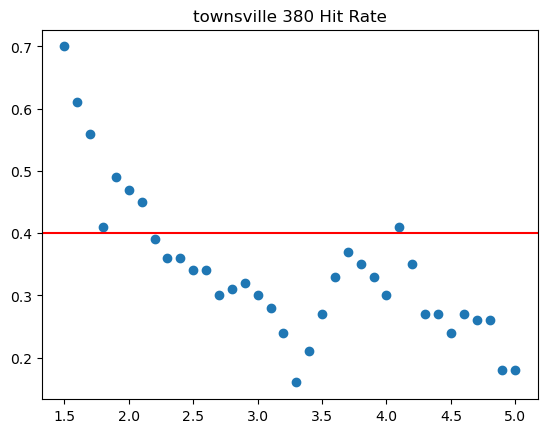

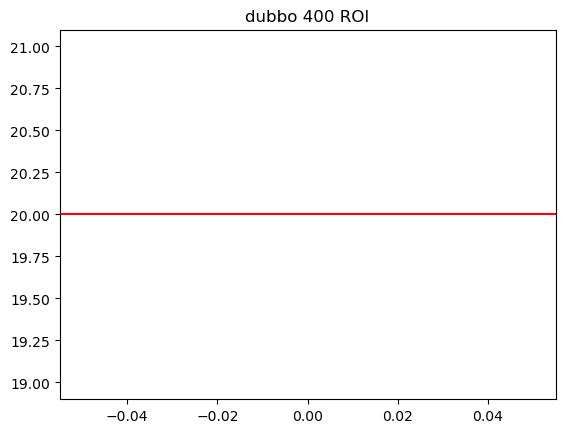

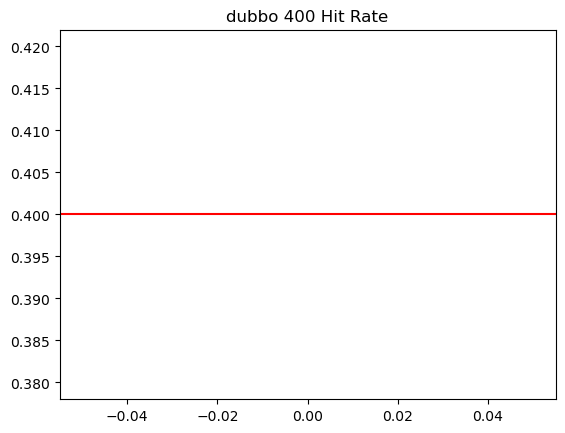

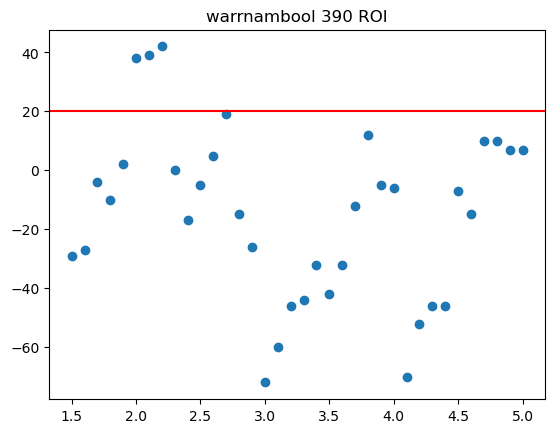

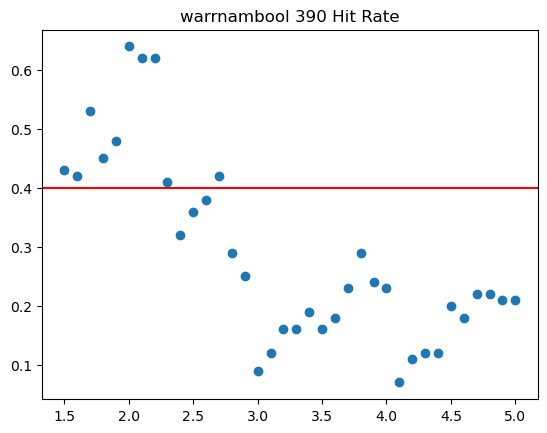

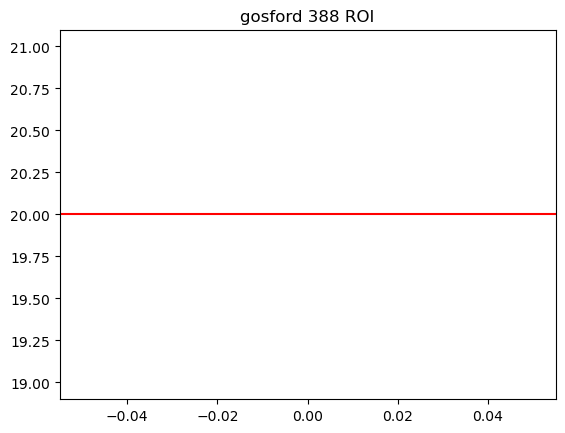

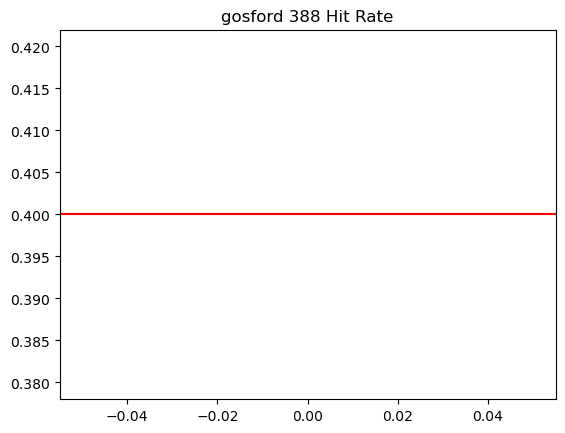

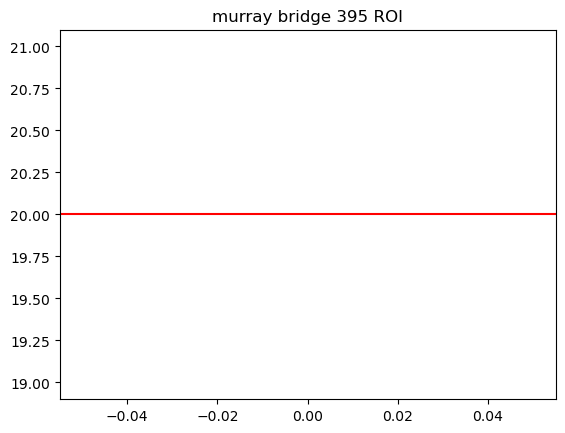

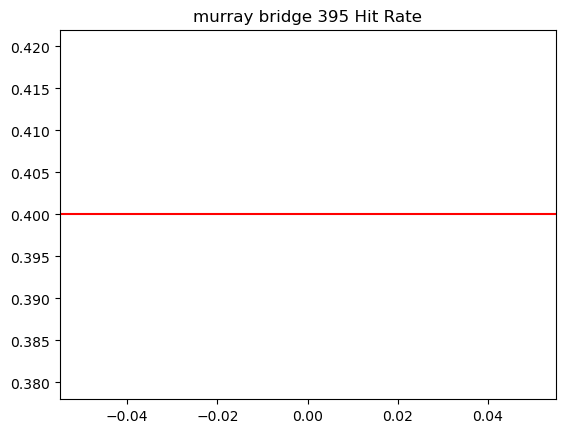

In [297]:
#395 Non-Clear Fav 320 preds

for x in dick.keys():
    
    kra = 0
    for y in dick[x]:
        if y>375 and y<430:
            kra = y
            
    if kra != 0:
        dic = {}
        tracker = []
        rois = []
        hits = []
        bets = []

        for i in range(0,41):
            ls = sim(x,False,kra,[7,8],   0.1,47,   (1.49+i*0.1),(1.81+i*0.1),   False,False,False,   False,True,False,False,False)
            if ls[2]>9:
                tracker.append(1.5+i*0.1)
                rois.append(ls[0])
                hits.append(ls[1])
                bets.append(ls[2])
                dic[1.5+i*0.1] = ls[2]
            else:
                break

        f1 = plt.figure()
        f2 = plt.figure()
        g1 = f1.add_subplot(111)
        g1.scatter(tracker,rois)
        g1.axhline(y = 20, color = 'r', linestyle = '-')
        g2 = f2.add_subplot(111)
        g2.scatter(tracker,hits)
        g2.axhline(y = 0.4, color = 'r', linestyle = '-')
        g1.title.set_text(x+' '+str(kra)+' '+'ROI')
        g2.title.set_text(x+' '+str(kra)+' '+'Hit Rate')
        plt.draw()
        print(x,kra)
        print(dic)
        
plt.show()

bendigo 500
{1.5: 16, 1.6: 14, 1.7: 14, 1.8: 13, 1.9: 12, 2.0: 13, 2.1: 14, 2.2: 11, 2.3: 12, 2.4: 15, 2.5: 12, 2.6: 11}
sandown park 595
{}
albion park 520
{1.5: 29, 1.6: 31, 1.7: 27, 1.8: 26, 1.9: 23, 2.0: 23, 2.1: 26, 2.2: 32, 2.3: 33, 2.4: 27, 2.5: 25, 2.6: 24, 2.7: 21, 2.8: 23, 2.9000000000000004: 16, 3.0: 11, 3.1: 11}
mount gambier 512
{}
angle park 515
{}
launceston 515
{1.5: 13, 1.6: 13}
warragul 460
{1.5: 21, 1.6: 22, 1.7: 25, 1.8: 21, 1.9: 20, 2.0: 13, 2.1: 15, 2.2: 13, 2.3: 12, 2.4: 11, 2.5: 10}
horsham 485
{1.5: 12, 1.6: 10, 1.7: 10}
geelong 460
{1.5: 10}
cannington 520
{1.5: 24, 1.6: 23, 1.7: 29, 1.8: 24, 1.9: 25, 2.0: 22, 2.1: 17, 2.2: 19, 2.3: 13, 2.4: 14, 2.5: 13, 2.6: 11}
ipswich 520
{1.5: 20, 1.6: 20, 1.7: 22, 1.8: 16, 1.9: 14, 2.0: 17, 2.1: 18, 2.2: 24, 2.3: 19, 2.4: 17, 2.5: 16, 2.6: 13, 2.7: 13, 2.8: 13, 2.9000000000000004: 11, 3.0: 11}
the meadows 525
{1.5: 21, 1.6: 27, 1.7: 35, 1.8: 36, 1.9: 34, 2.0: 31, 2.1: 26, 2.2: 26, 2.3: 25, 2.4: 31, 2.5: 27, 2.6: 29, 2.7: 

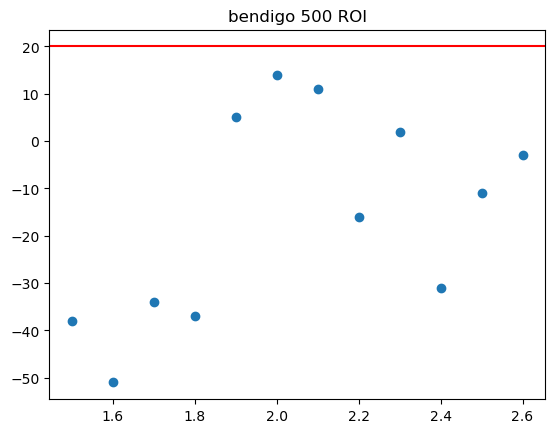

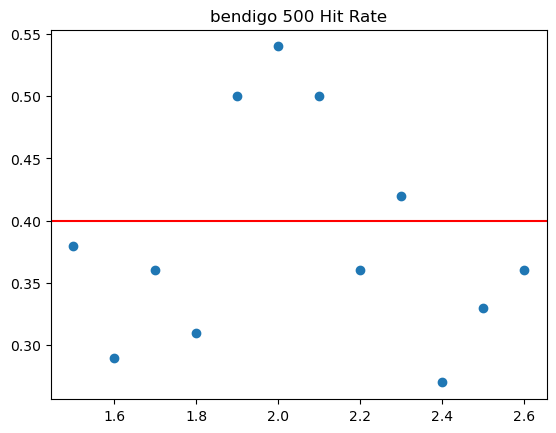

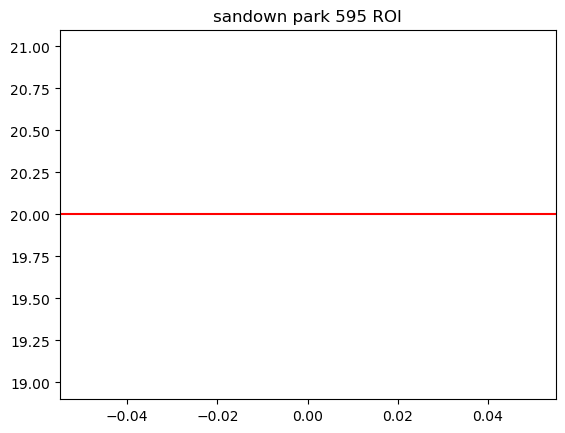

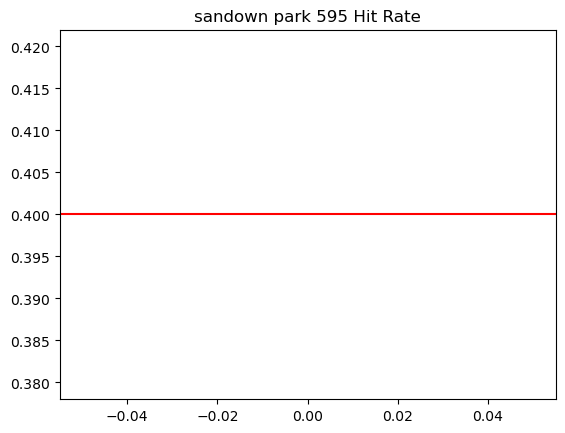

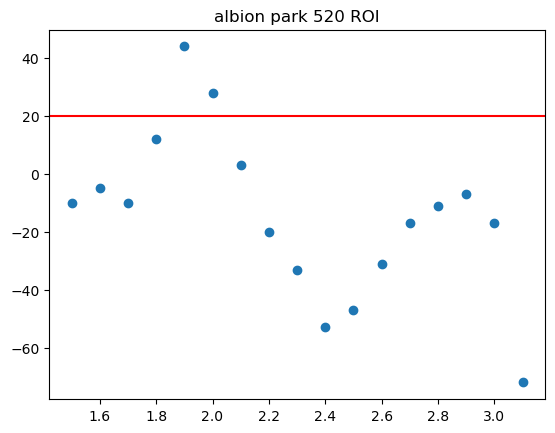

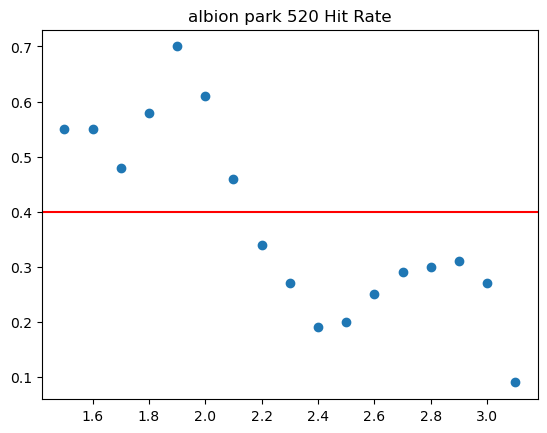

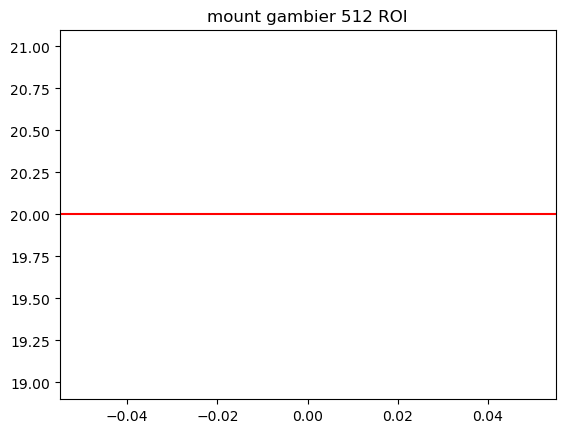

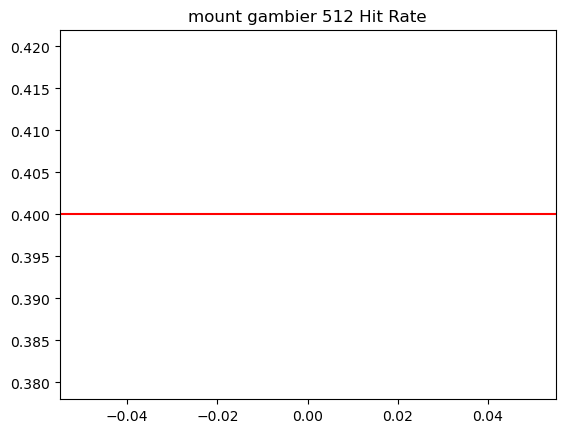

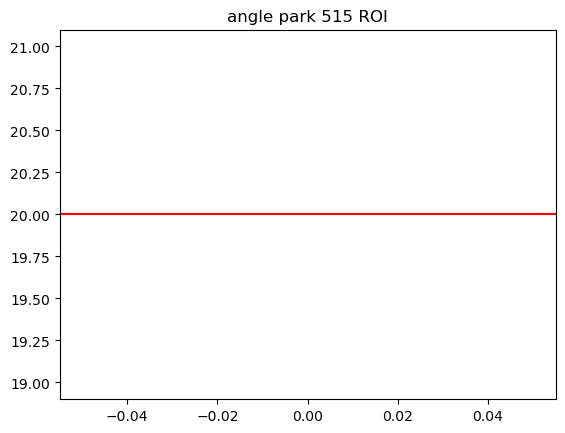

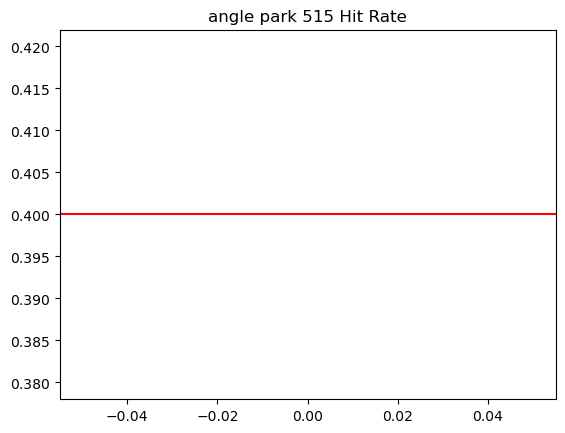

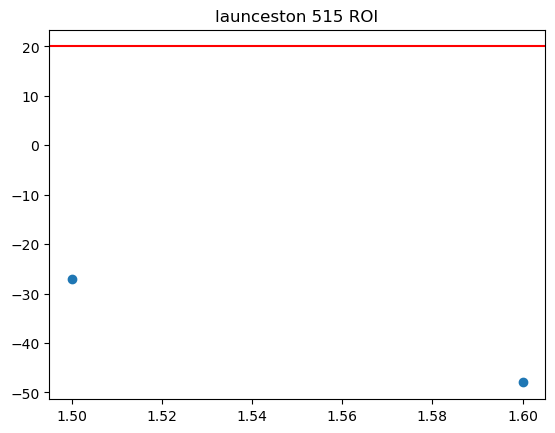

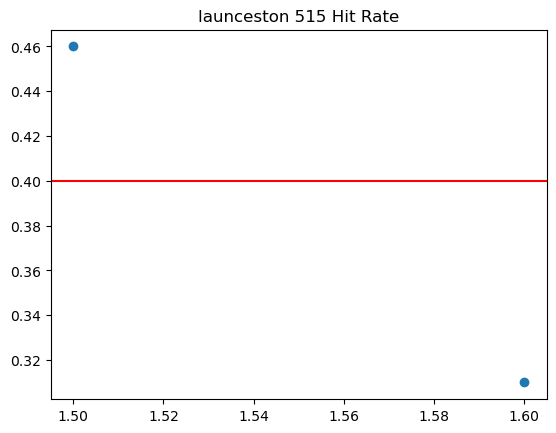

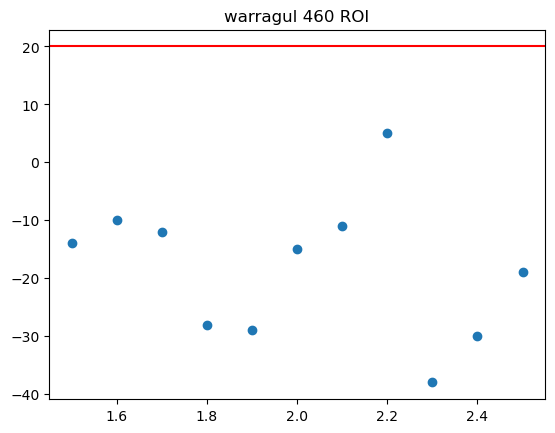

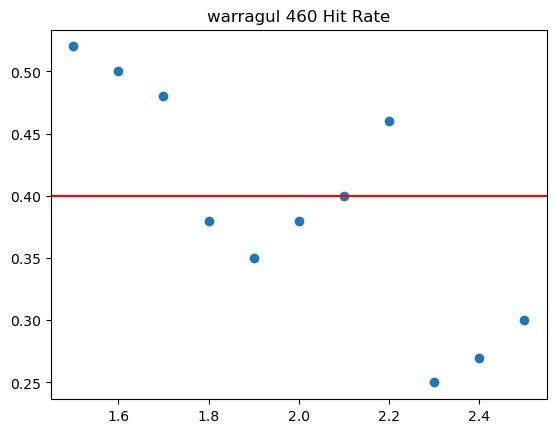

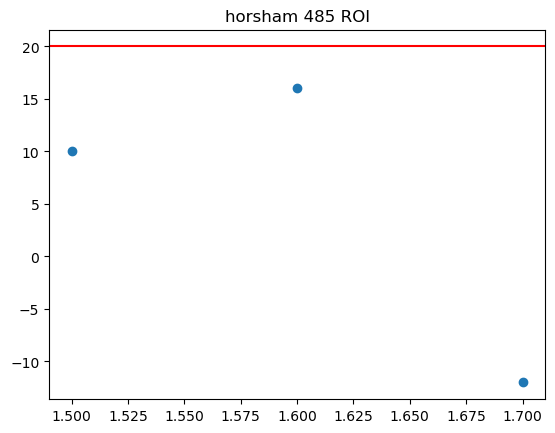

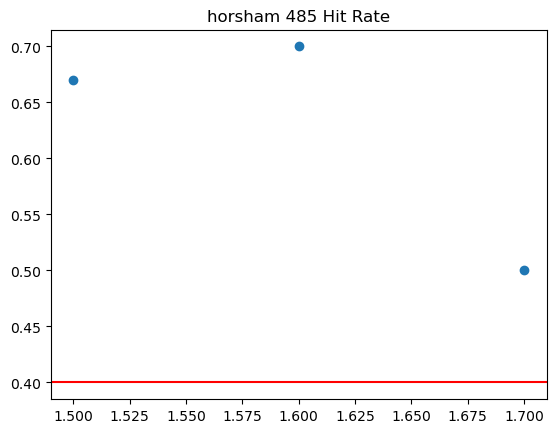

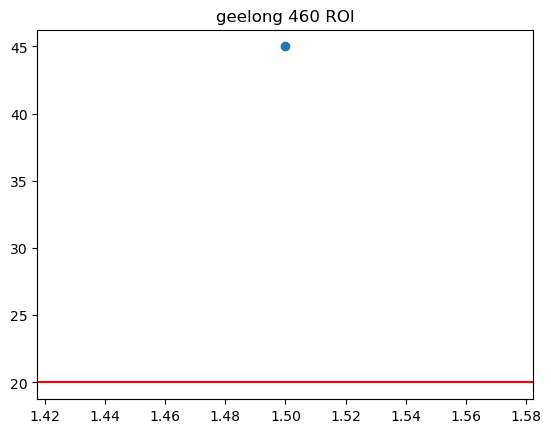

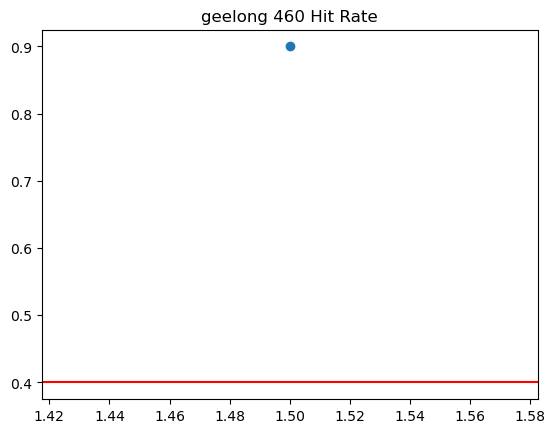

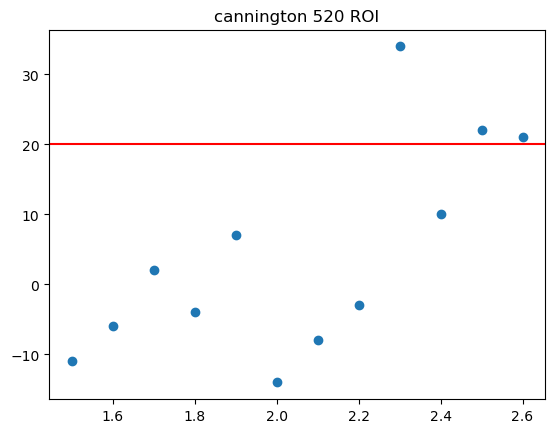

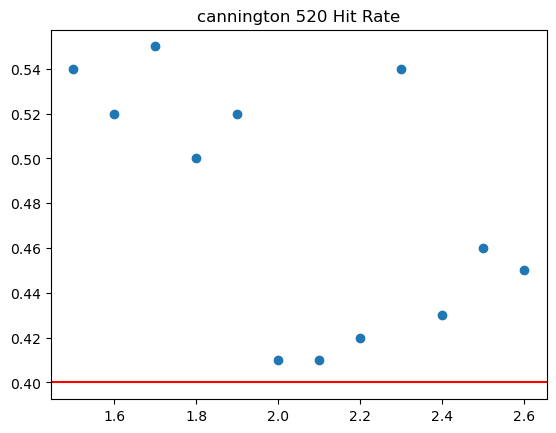

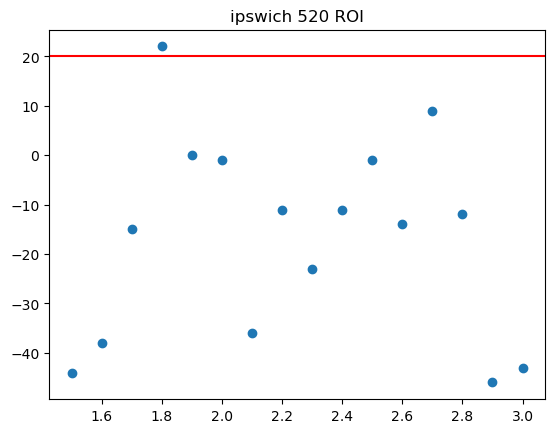

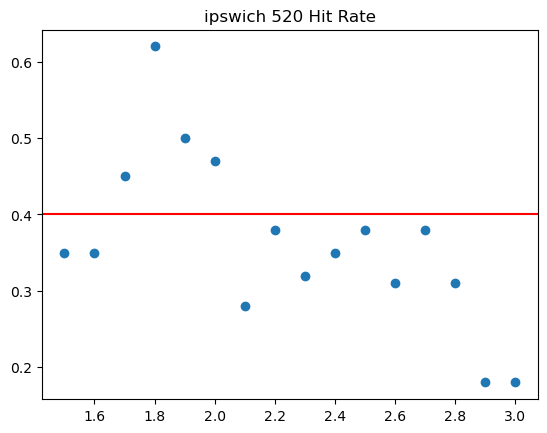

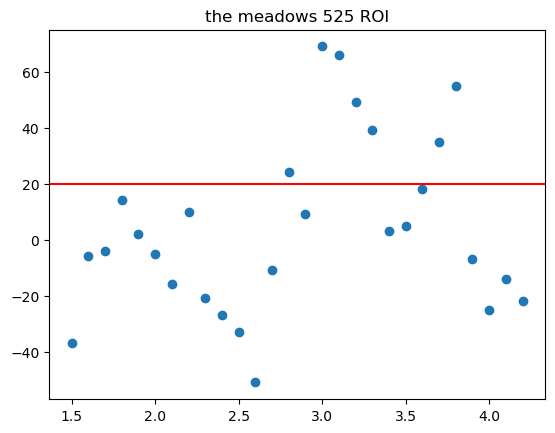

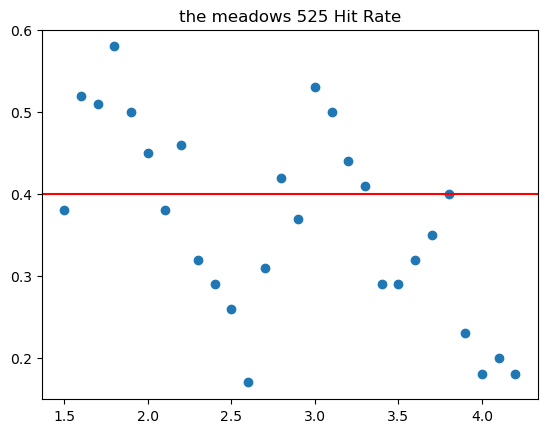

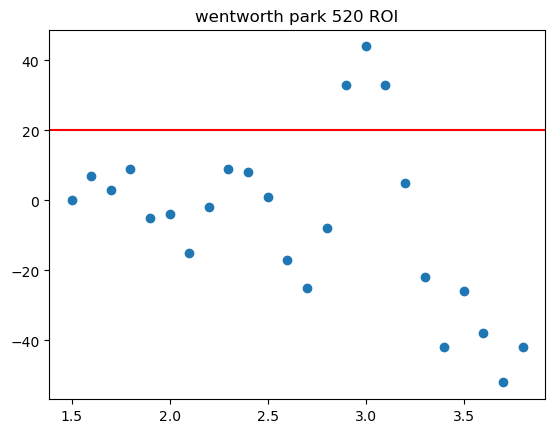

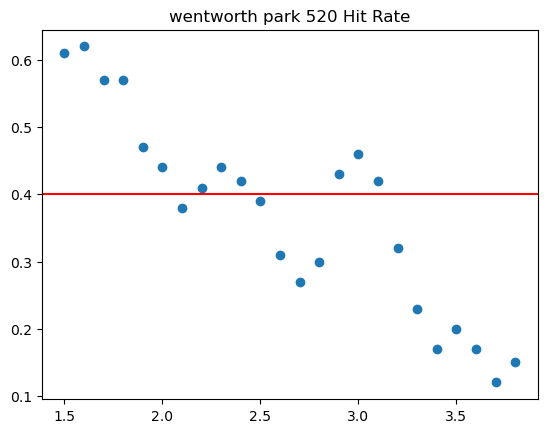

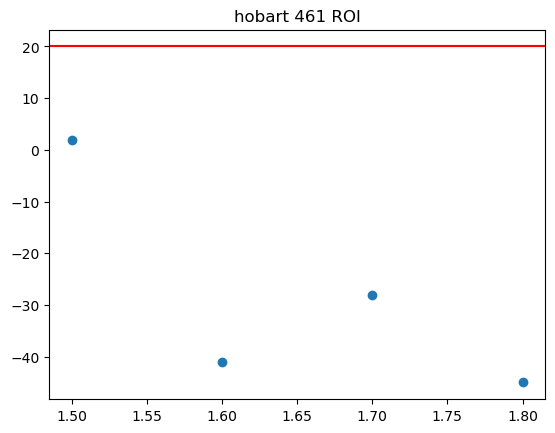

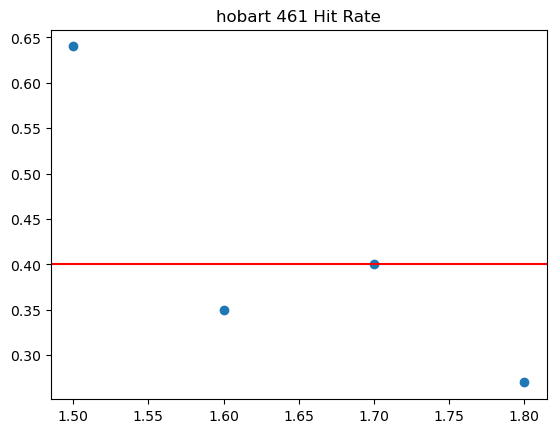

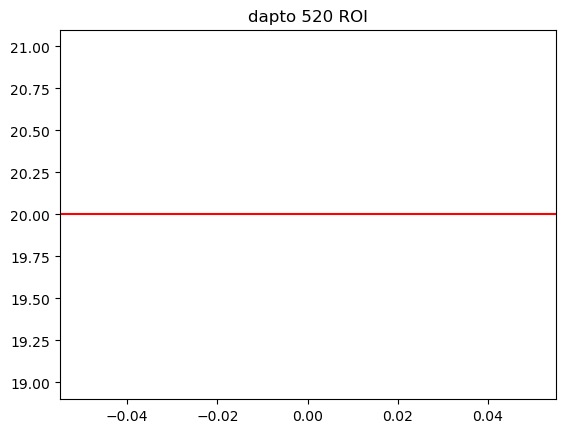

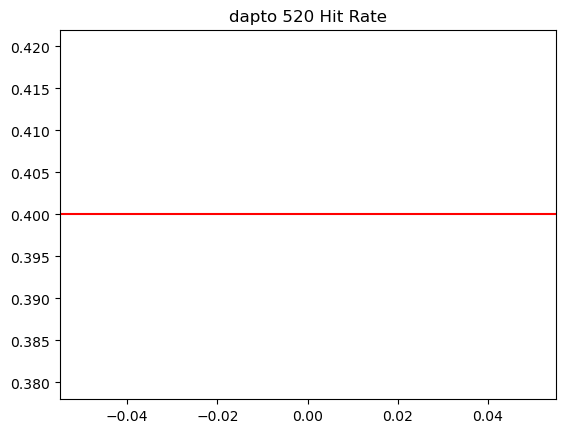

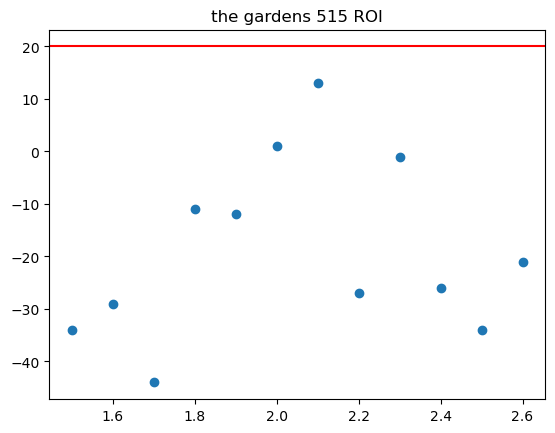

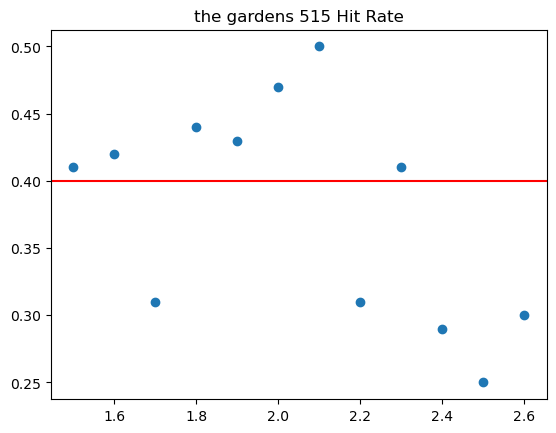

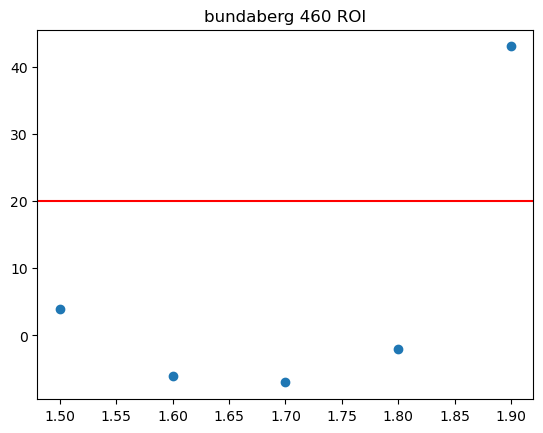

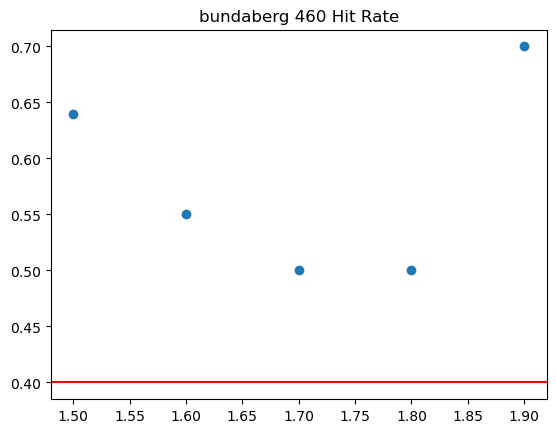

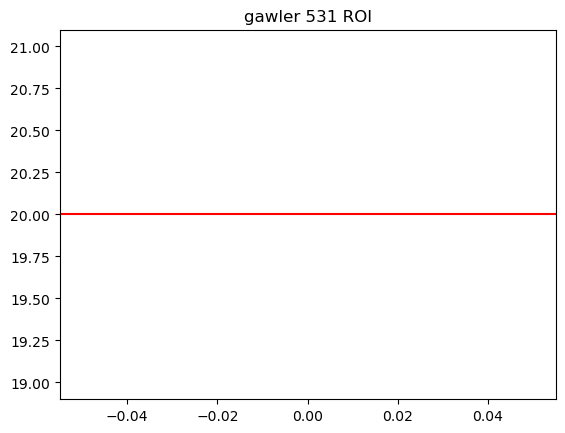

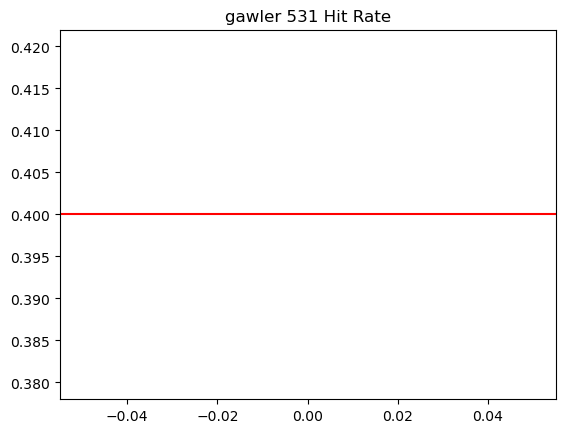

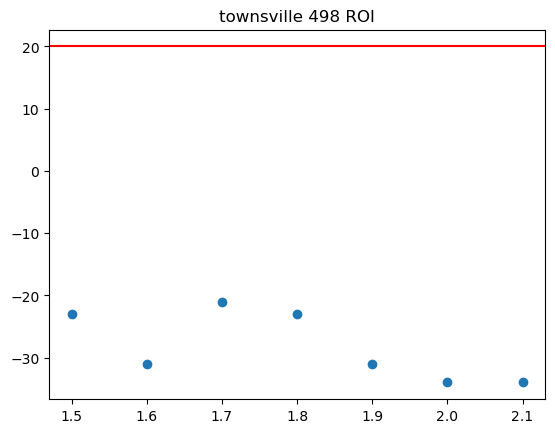

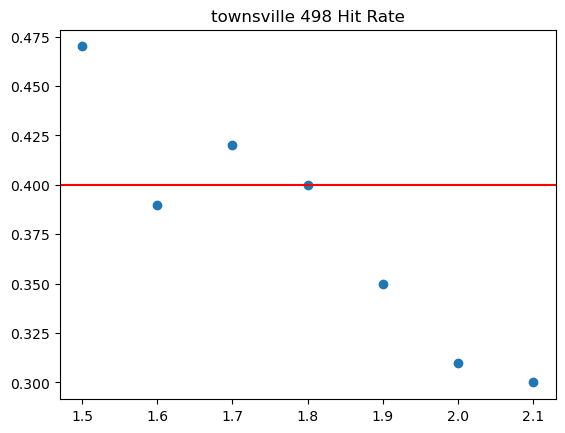

In [298]:
#520 Clear Fav 520 preds

for x in dick.keys():
    
    kra = 0
    for y in dick[x]:
        if y>450 and y<600:
            kra = y
            
    if kra != 0:
        dic = {}
        tracker = []
        rois = []
        hits = []
        bets = []

        for i in range(0,41):
            ls = sim(x,False,kra,[7,8],   0.1,47,   (1.49+i*0.1),(1.81+i*0.1),   True,False,False,   False,False,False,True,False)
            if ls[2]>9:
                tracker.append(1.5+i*0.1)
                rois.append(ls[0])
                hits.append(ls[1])
                bets.append(ls[2])
                dic[1.5+i*0.1] = ls[2]
            else:
                break

        f1 = plt.figure()
        f2 = plt.figure()
        g1 = f1.add_subplot(111)
        g1.scatter(tracker,rois)
        g1.axhline(y = 20, color = 'r', linestyle = '-')
        g2 = f2.add_subplot(111)
        g2.scatter(tracker,hits)
        g2.axhline(y = 0.4, color = 'r', linestyle = '-')
        g1.title.set_text(x+' '+str(kra)+' '+'ROI')
        g2.title.set_text(x+' '+str(kra)+' '+'Hit Rate')
        plt.draw()
        print(x,kra)
        print(dic)
        
plt.show()

bendigo 500
{1.5: 10}
sandown park 595
{}
albion park 520
{1.5: 20, 1.6: 20, 1.7: 26, 1.8: 26, 1.9: 29, 2.0: 26, 2.1: 20, 2.2: 21, 2.3: 28, 2.4: 36, 2.5: 41, 2.6: 46, 2.7: 37, 2.8: 30, 2.9000000000000004: 26, 3.0: 20, 3.1: 17, 3.2: 18, 3.3: 27, 3.4000000000000004: 25, 3.5: 34, 3.6: 34, 3.7: 23, 3.8000000000000003: 21, 3.9000000000000004: 17, 4.0: 12, 4.1: 14, 4.2: 16, 4.300000000000001: 13, 4.4: 13, 4.5: 13, 4.6: 11, 4.7: 16, 4.800000000000001: 16, 4.9: 10, 5.0: 10}
mount gambier 512
{}
angle park 515
{}
launceston 515
{}
warragul 460
{1.5: 13, 1.6: 21, 1.7: 24, 1.8: 21, 1.9: 18, 2.0: 18, 2.1: 19, 2.2: 24, 2.3: 19, 2.4: 21, 2.5: 20, 2.6: 18, 2.7: 17, 2.8: 14, 2.9000000000000004: 14, 3.0: 15, 3.1: 13, 3.2: 17, 3.3: 17, 3.4000000000000004: 17, 3.5: 20, 3.6: 20, 3.7: 22, 3.8000000000000003: 17, 3.9000000000000004: 15}
horsham 485
{}
geelong 460
{1.5: 10, 1.6: 13, 1.7: 12, 1.8: 12, 1.9: 14, 2.0: 16, 2.1: 18, 2.2: 23, 2.3: 21, 2.4: 19, 2.5: 17, 2.6: 16, 2.7: 17, 2.8: 14, 2.9000000000000004:

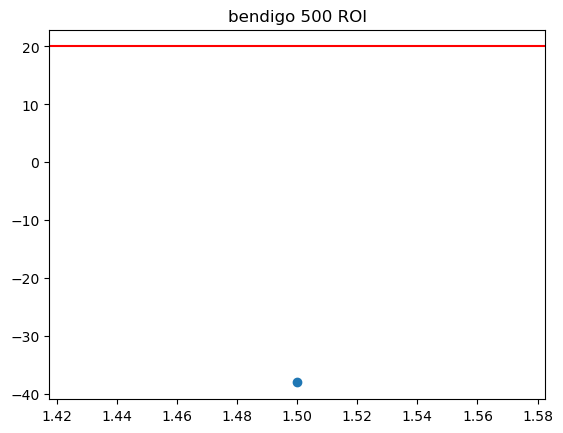

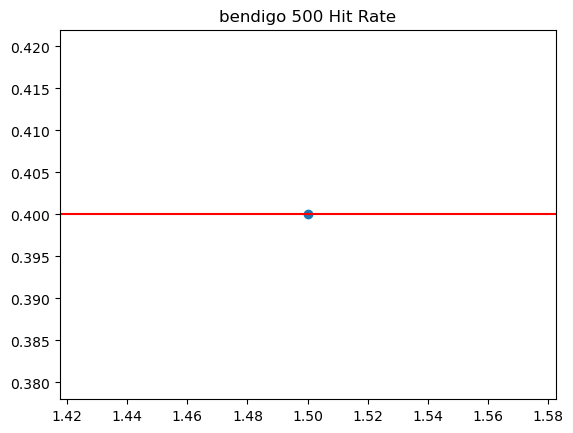

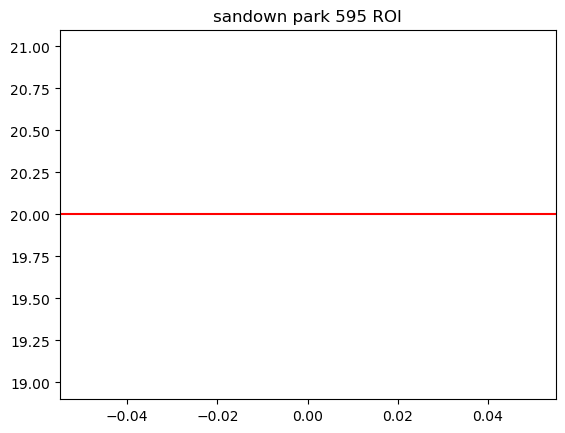

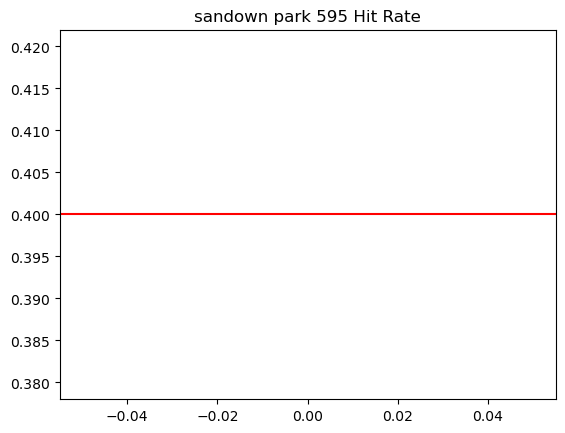

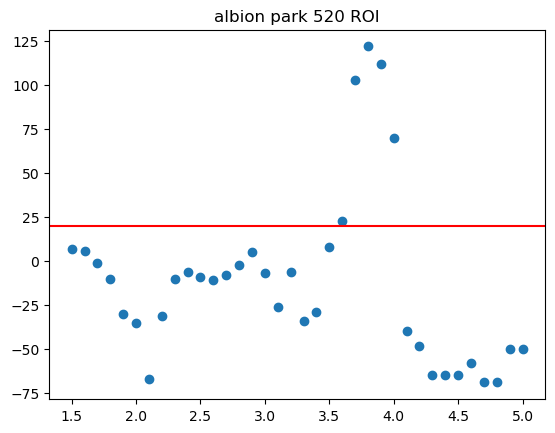

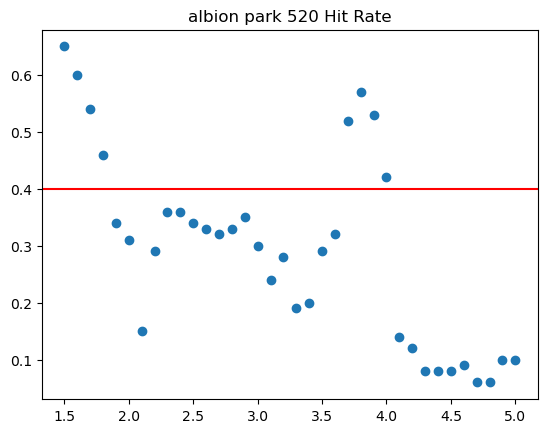

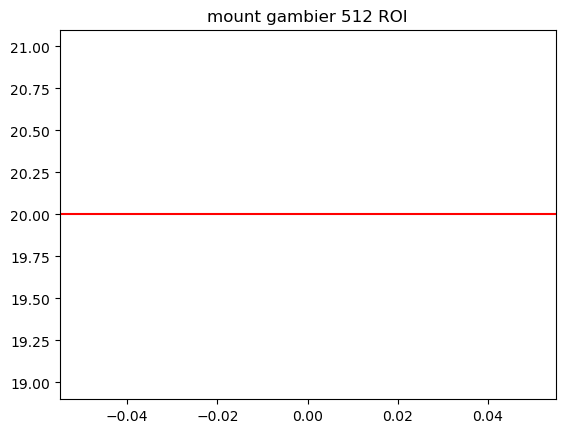

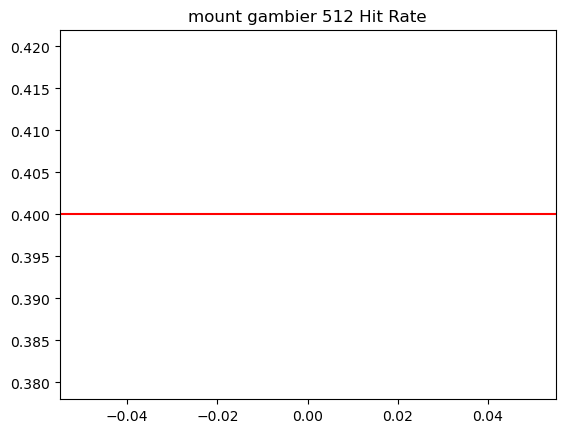

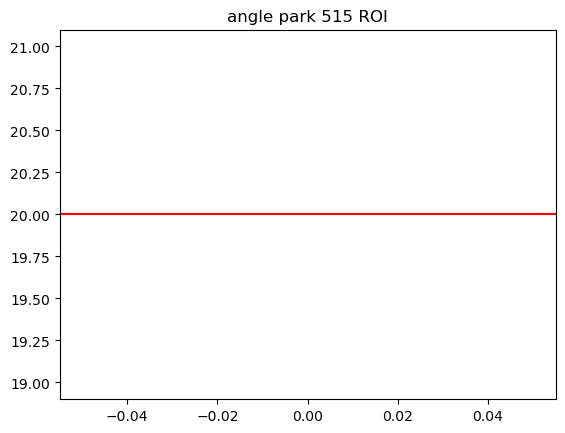

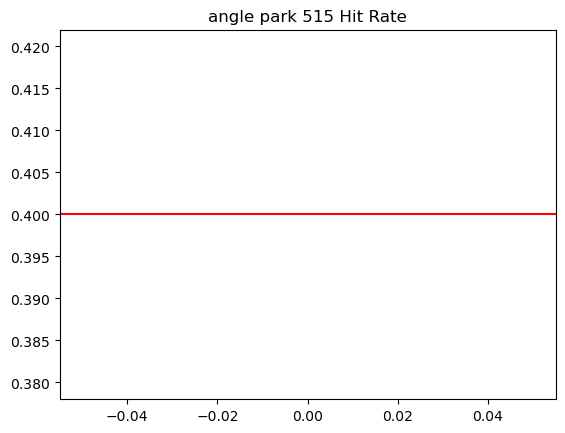

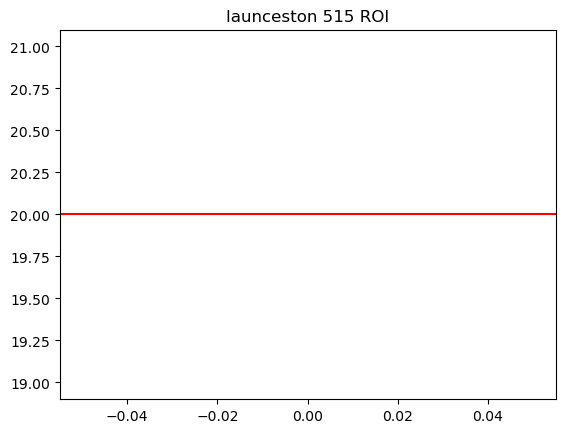

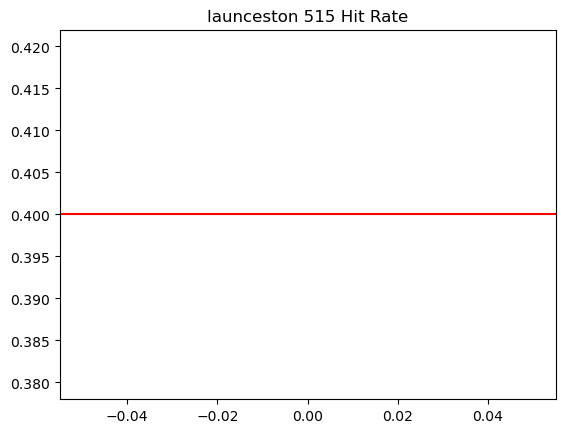

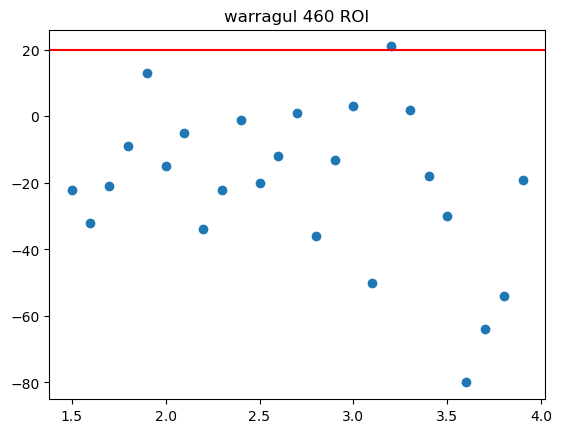

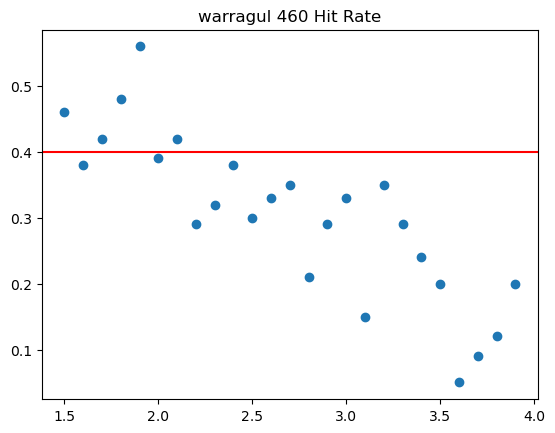

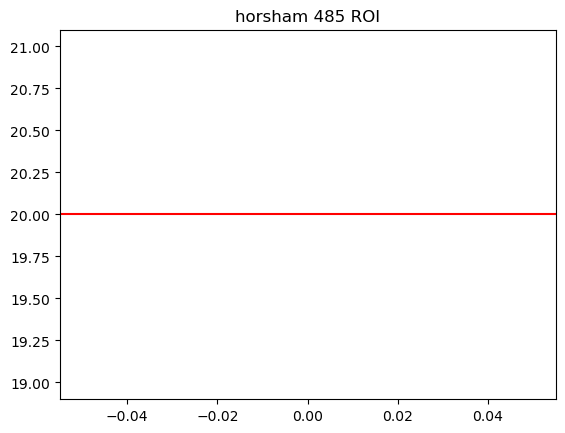

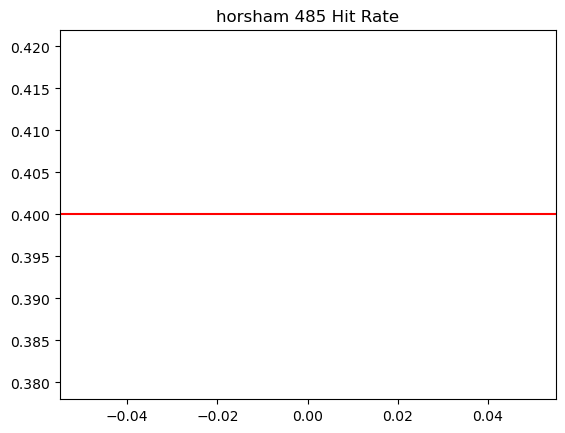

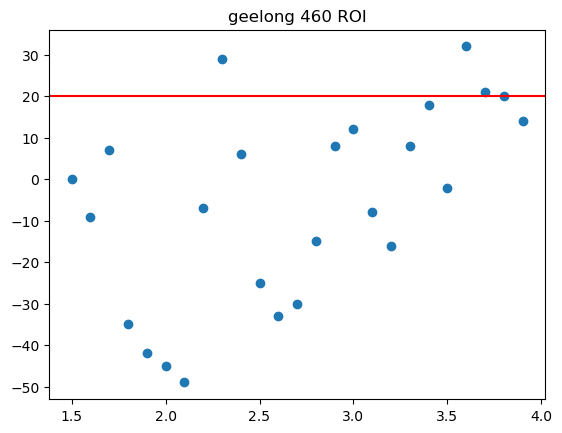

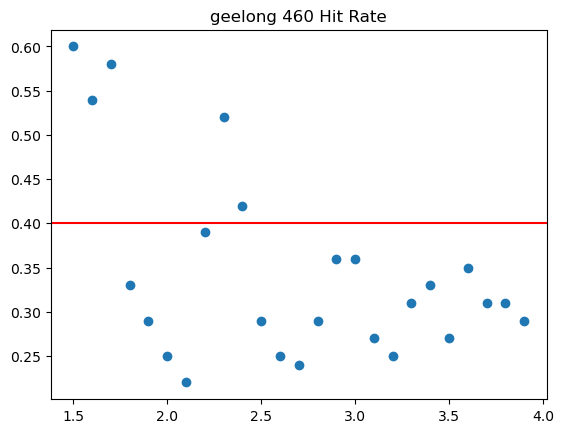

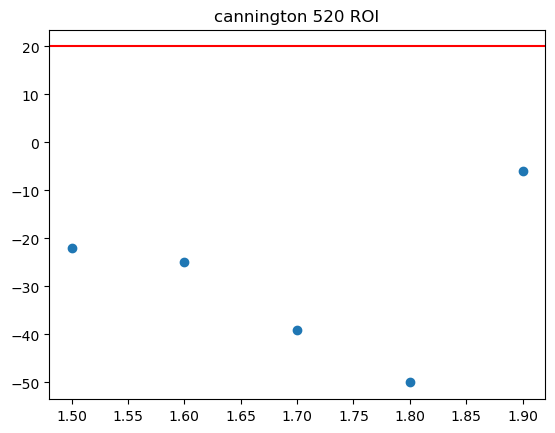

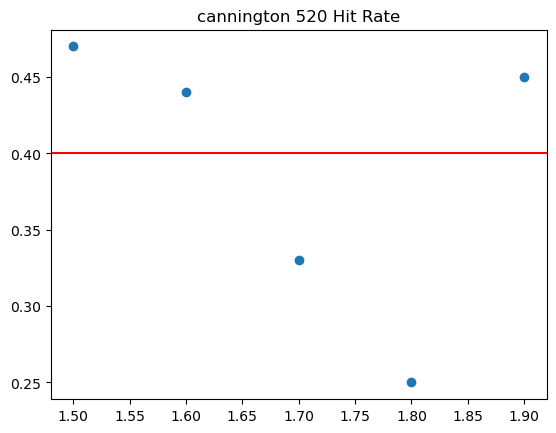

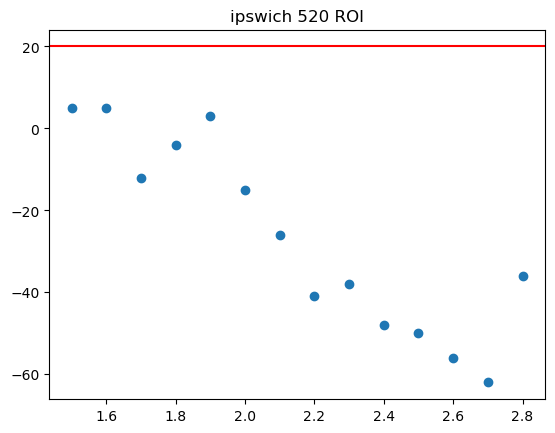

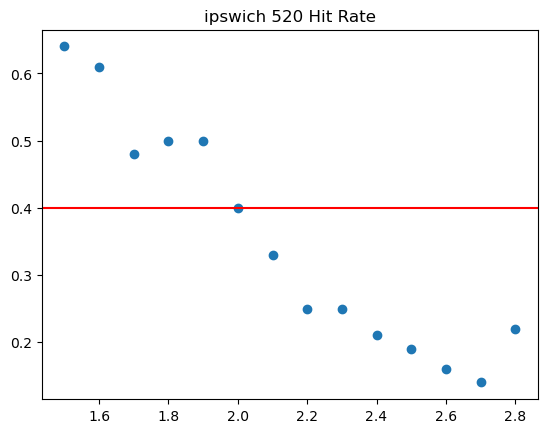

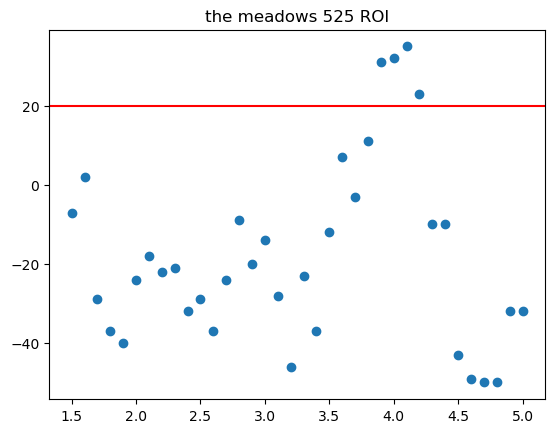

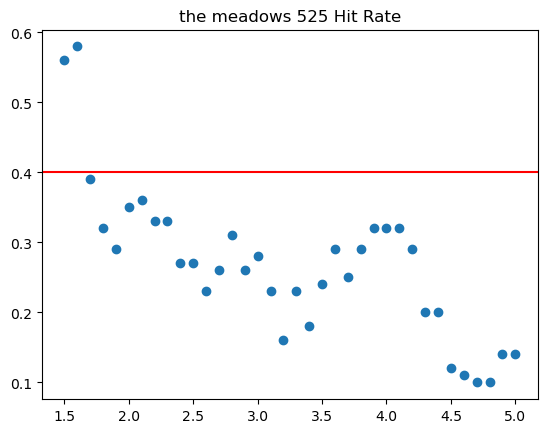

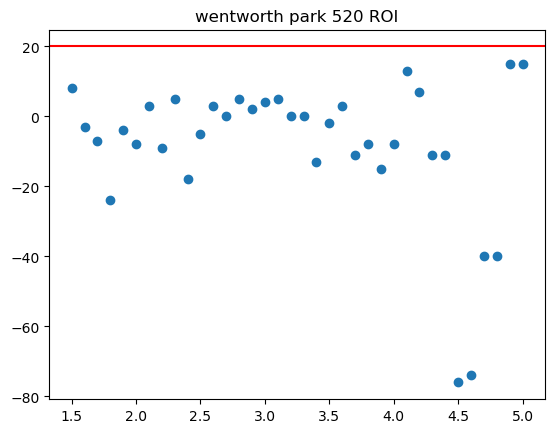

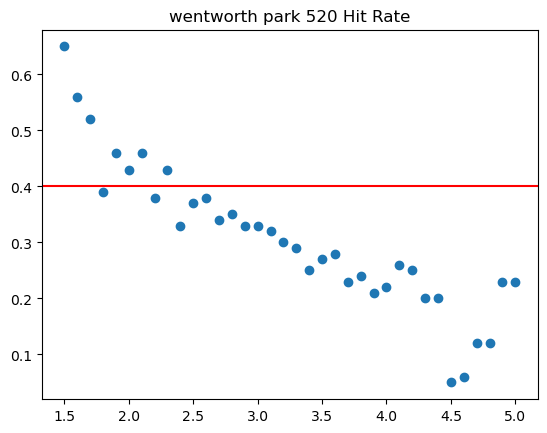

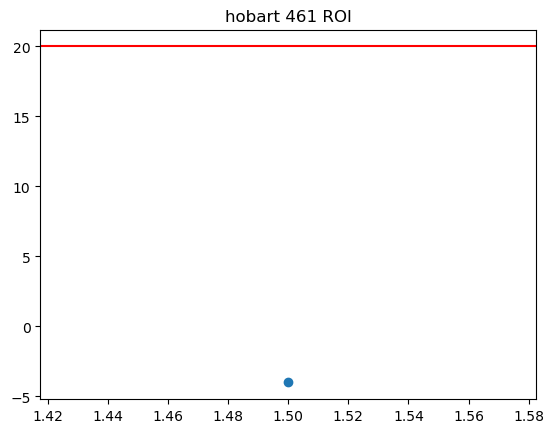

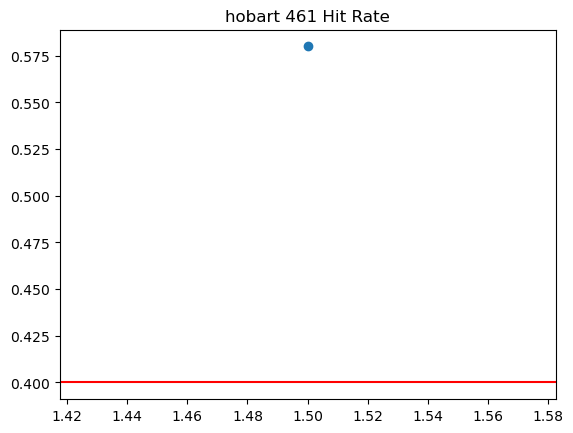

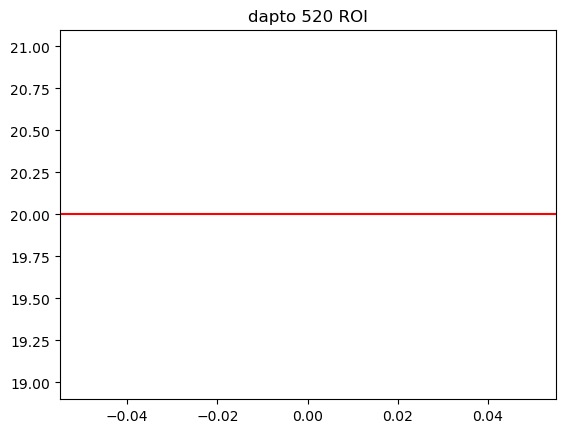

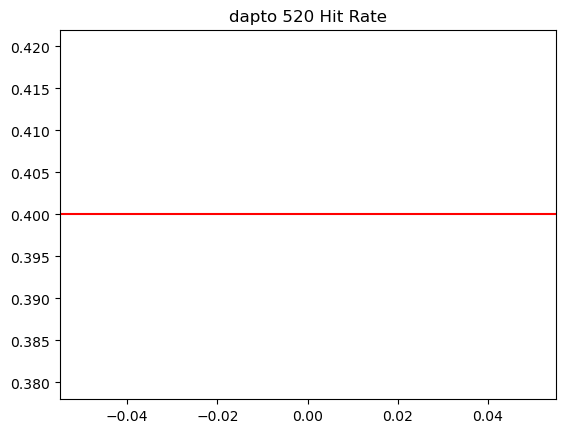

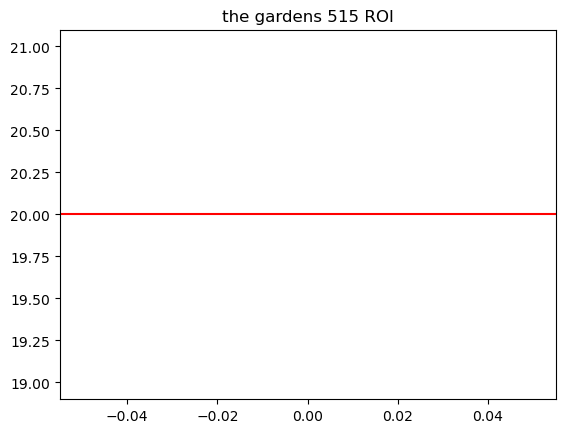

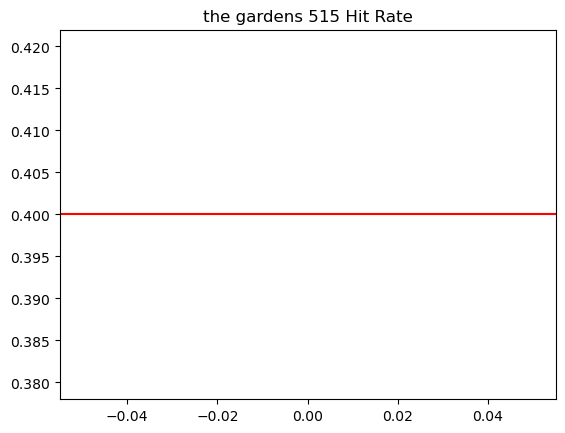

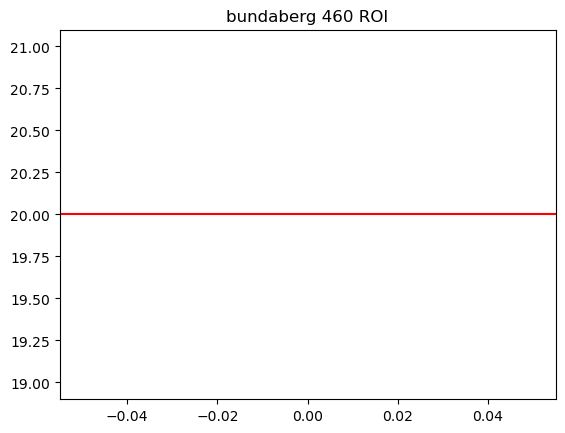

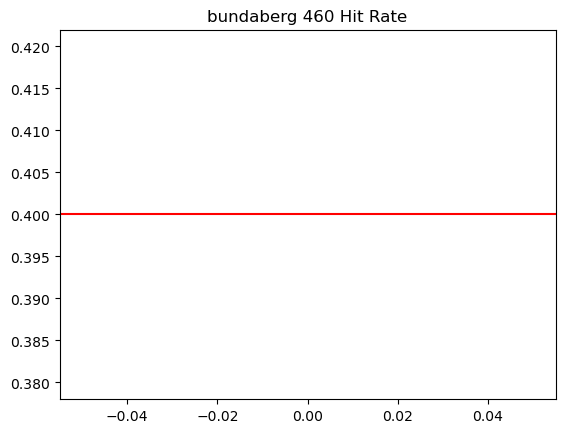

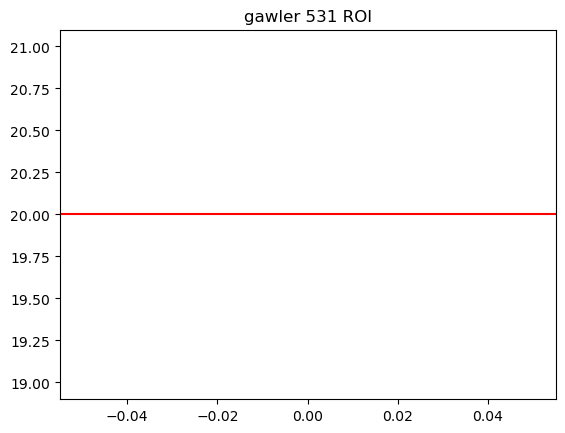

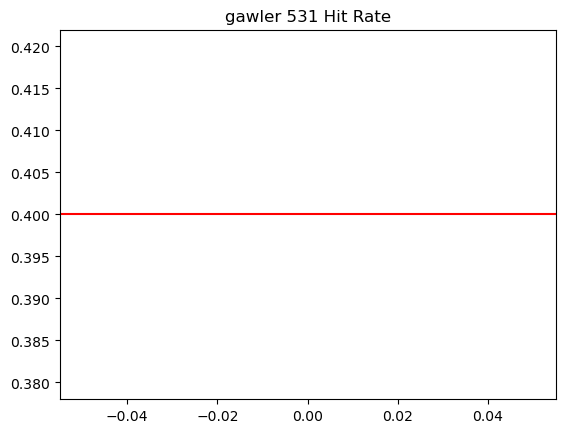

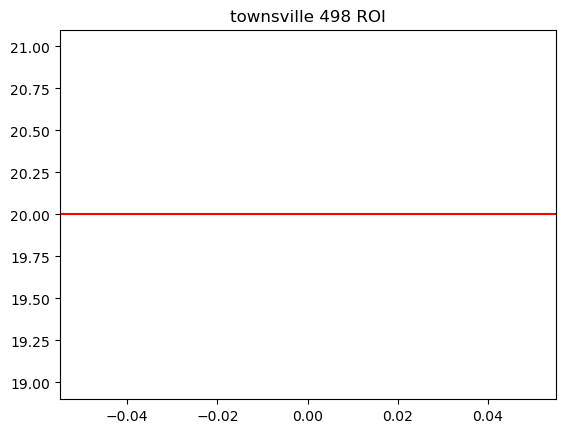

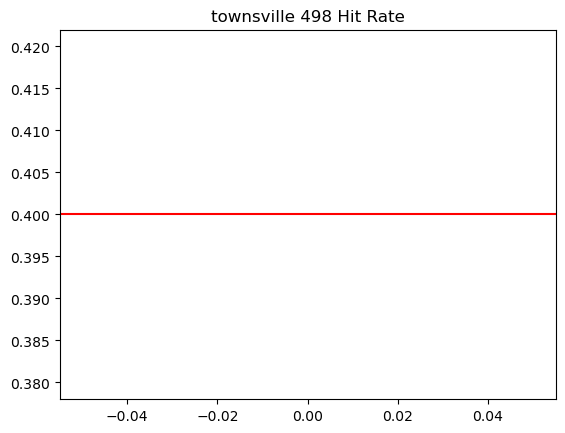

In [299]:
#520 Non-Clear Fav 520 preds

for x in dick.keys():
    
    kra = 0
    for y in dick[x]:
        if y>450 and y<600:
            kra = y
            
    if kra != 0:
        dic = {}
        tracker = []
        rois = []
        hits = []
        bets = []

        for i in range(0,41):
            ls = sim(x,False,kra,[7,8],   0.1,47,   (1.49+i*0.1),(1.81+i*0.1),   False,False,False,   False,False,False,True,False)
            if ls[2]>9:
                tracker.append(1.5+i*0.1)
                rois.append(ls[0])
                hits.append(ls[1])
                bets.append(ls[2])
                dic[1.5+i*0.1] = ls[2]
            else:
                break

        f1 = plt.figure()
        f2 = plt.figure()
        g1 = f1.add_subplot(111)
        g1.scatter(tracker,rois)
        g1.axhline(y = 20, color = 'r', linestyle = '-')
        g2 = f2.add_subplot(111)
        g2.scatter(tracker,hits)
        g2.axhline(y = 0.4, color = 'r', linestyle = '-')
        g1.title.set_text(x+' '+str(kra)+' '+'ROI')
        g2.title.set_text(x+' '+str(kra)+' '+'Hit Rate')
        plt.draw()
        print(x,kra)
        print(dic)
        
plt.show()

albion park 331
{1.5: 27, 1.6: 20, 1.7: 21, 1.8: 18, 1.9: 18, 2.0: 17, 2.1: 20, 2.2: 16, 2.3: 18, 2.4: 14, 2.5: 13, 2.6: 12, 2.7: 12}
angle park 342
{1.5: 10}
nowra 365
{1.5: 14, 1.6: 13}
launceston 278
{1.5: 11, 1.6: 12, 1.7: 16, 1.8: 14, 1.9: 12, 2.0: 11}
grafton 350
{1.5: 16, 1.6: 16, 1.7: 18, 1.8: 11}
cannington 275
{1.5: 11}
ipswich 288
{1.5: 18, 1.6: 20, 1.7: 22, 1.8: 22, 1.9: 21, 2.0: 22, 2.1: 20, 2.2: 19, 2.3: 19, 2.4: 14, 2.5: 12, 2.6: 10}
darwin 312
{}
richmond 320
{1.5: 19, 1.6: 17, 1.7: 16, 1.8: 15, 1.9: 18, 2.0: 20, 2.1: 16, 2.2: 24, 2.3: 24, 2.4: 26, 2.5: 19, 2.6: 13, 2.7: 11, 2.8: 12, 2.9000000000000004: 13, 3.0: 13, 3.1: 15, 3.2: 12, 3.3: 12}
hobart 340
{1.5: 15, 1.6: 12}
casino 300
{1.5: 14, 1.6: 16, 1.7: 12, 1.8: 11, 1.9: 10, 2.0: 10}
goulburn 350
{1.5: 16, 1.6: 15, 1.7: 14, 1.8: 11, 1.9: 11, 2.0: 12, 2.1: 16, 2.2: 12, 2.3: 10}
dapto 297
{1.5: 18, 1.6: 15, 1.7: 14}
healesville 350
{1.5: 14, 1.6: 16, 1.7: 15, 1.8: 18, 1.9: 16, 2.0: 14, 2.1: 14, 2.2: 11, 2.3: 13, 2.4: 1

FileNotFoundError: [Errno 2] No such file or directory: 'class4/temora.csv'

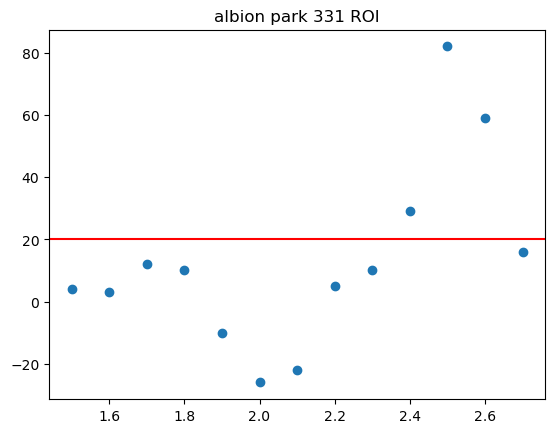

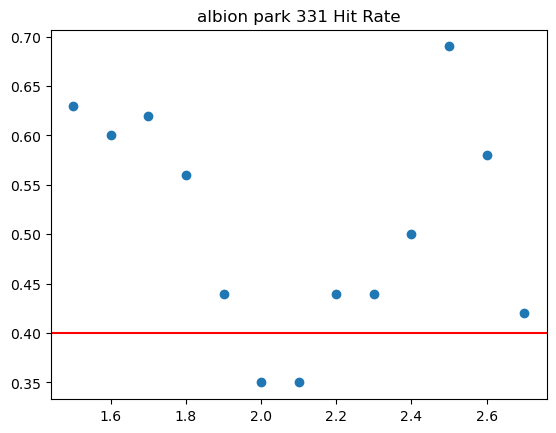

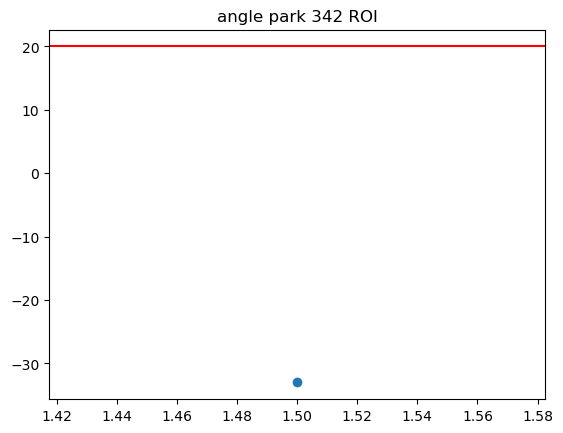

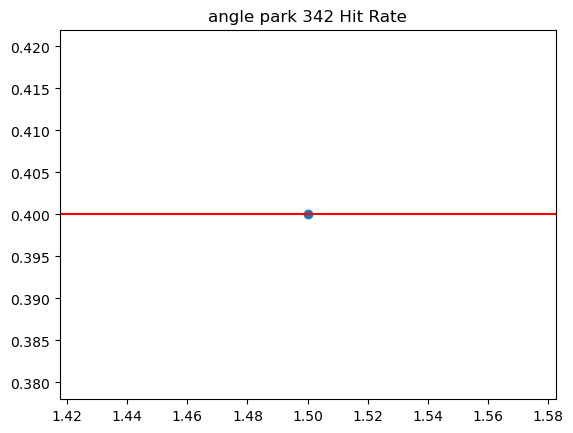

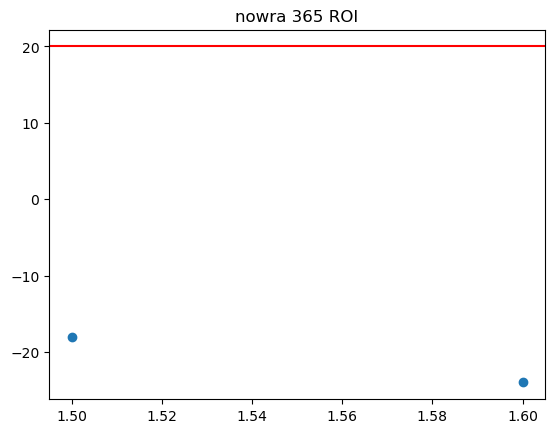

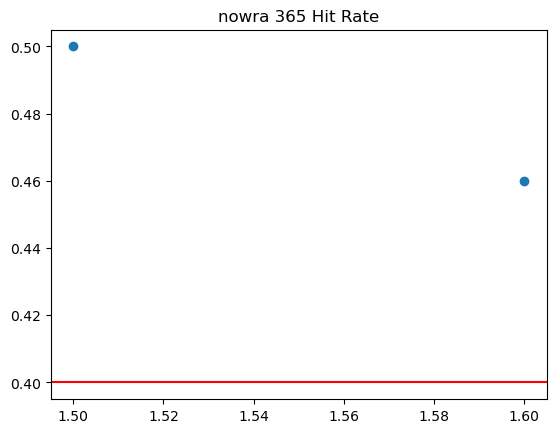

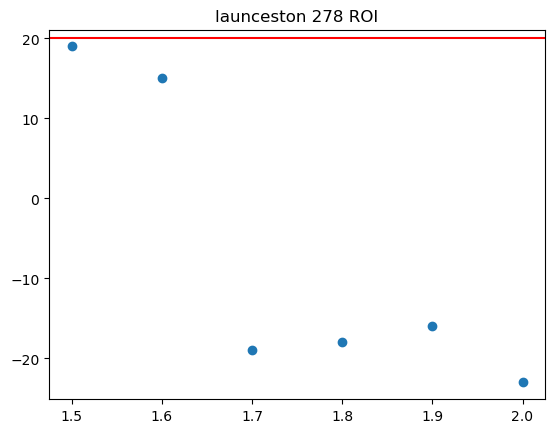

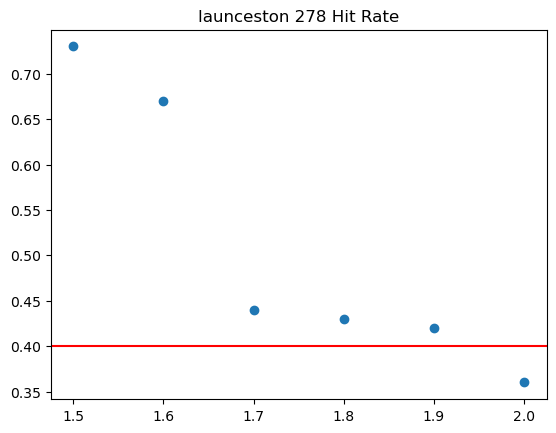

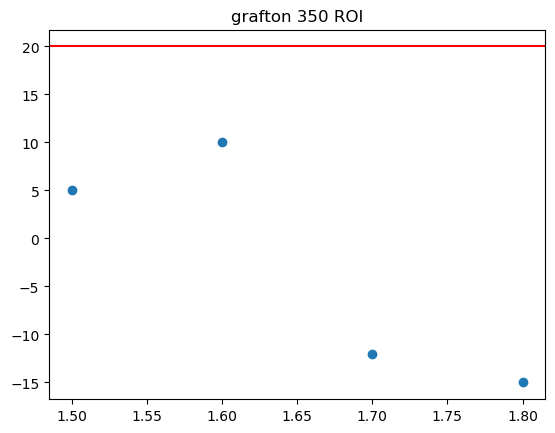

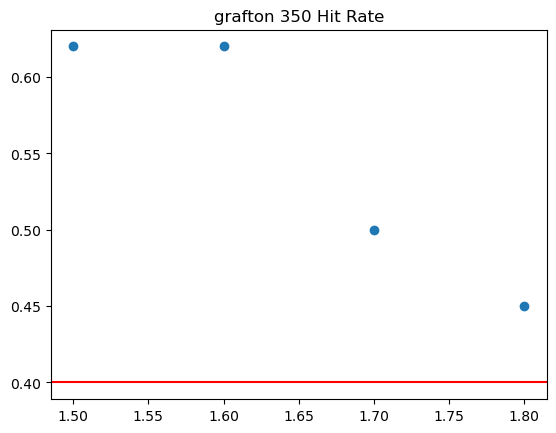

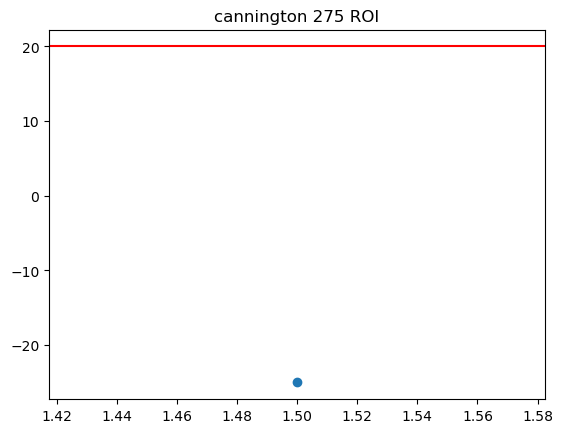

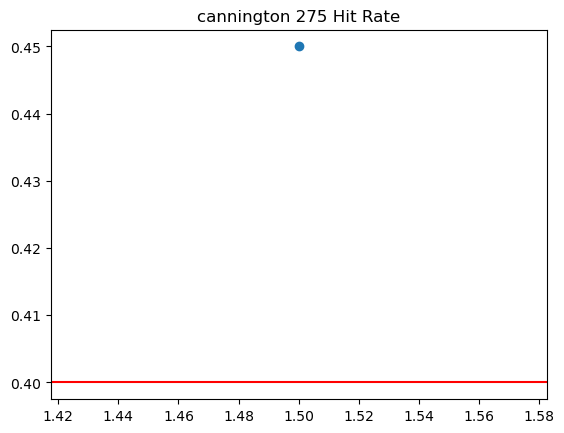

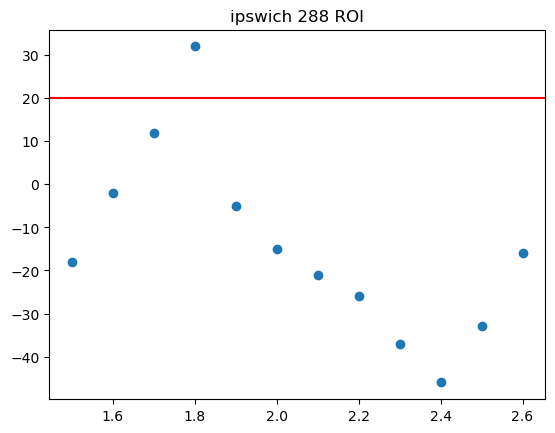

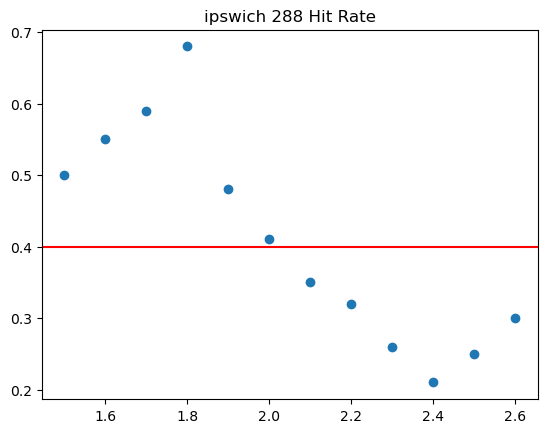

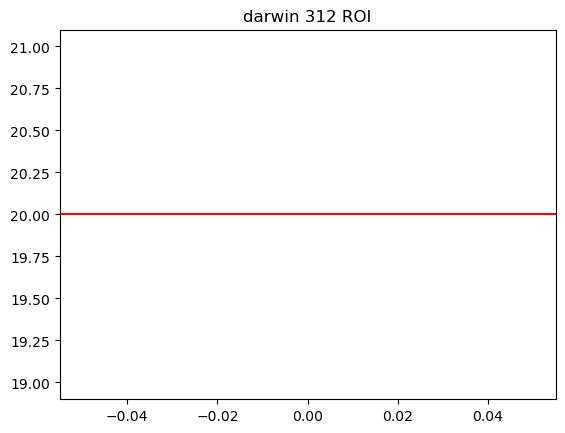

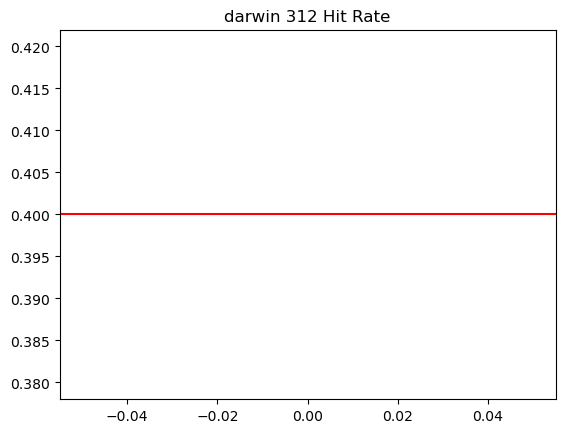

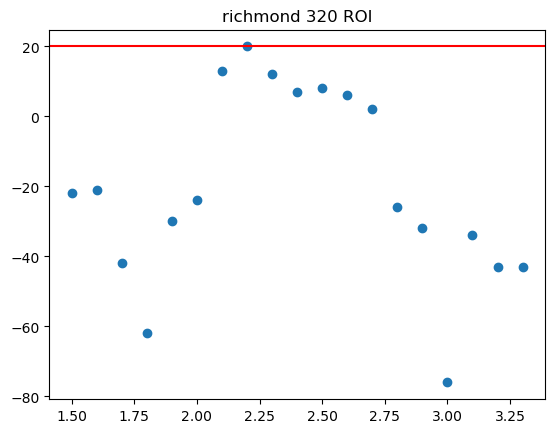

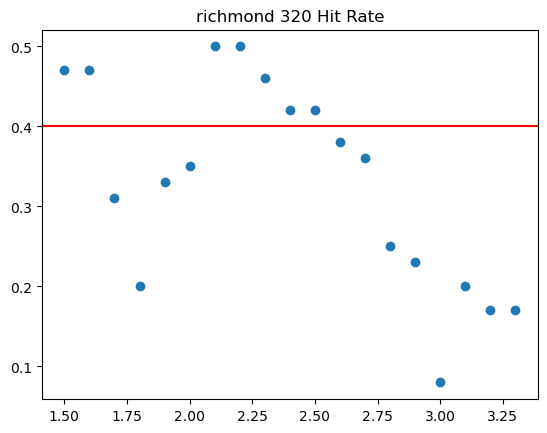

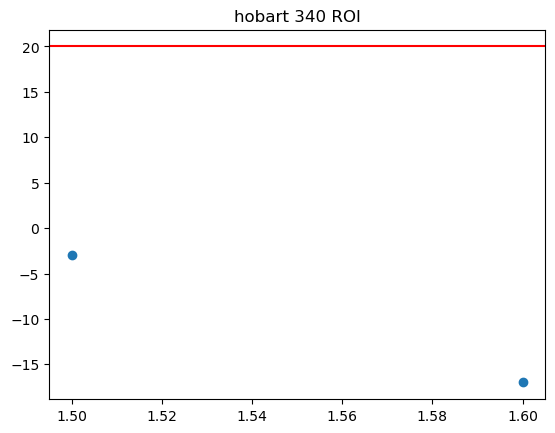

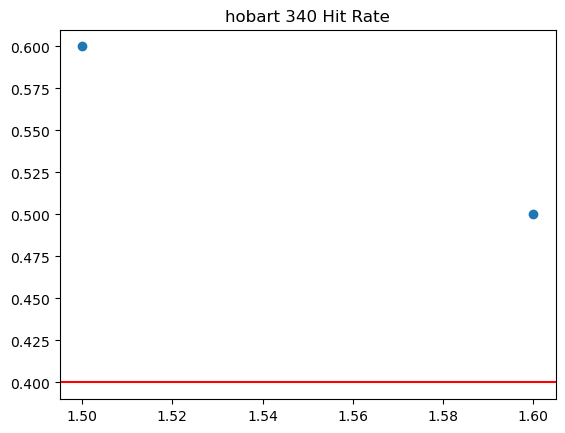

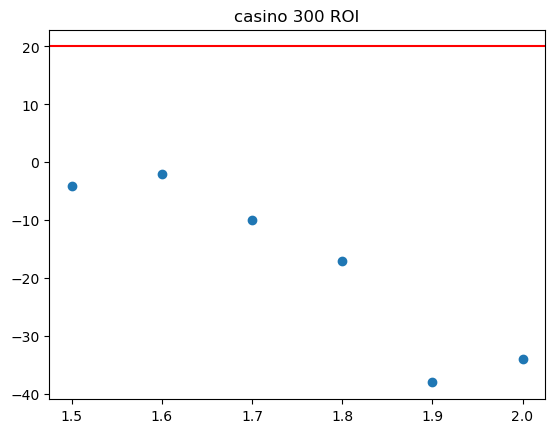

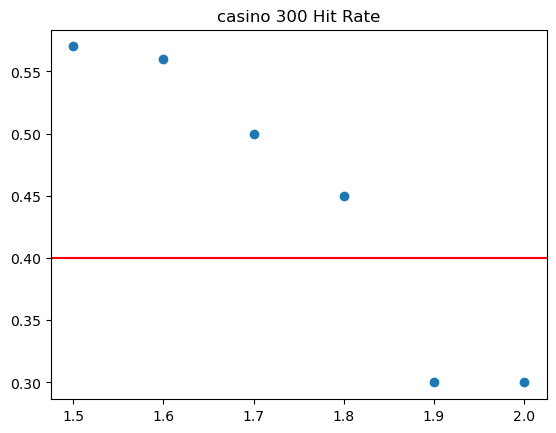

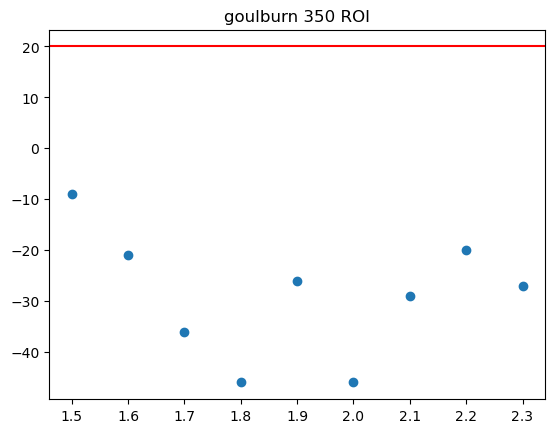

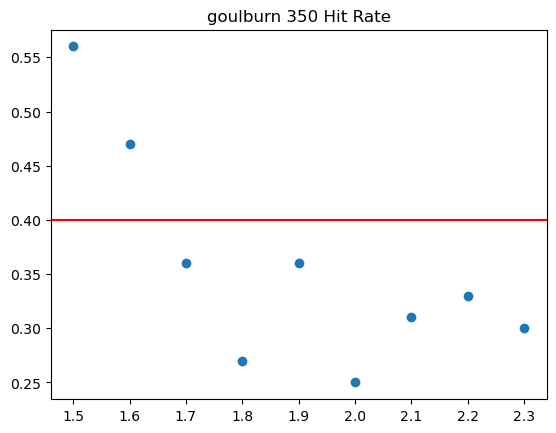

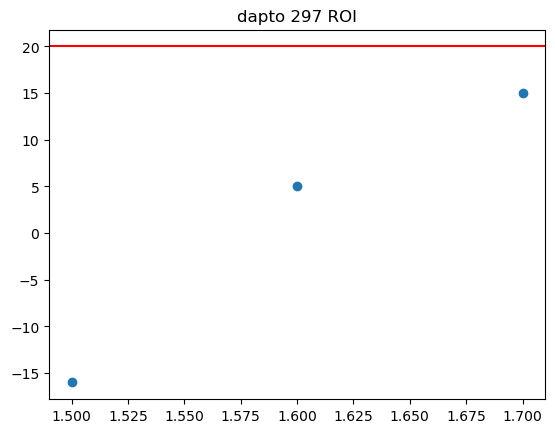

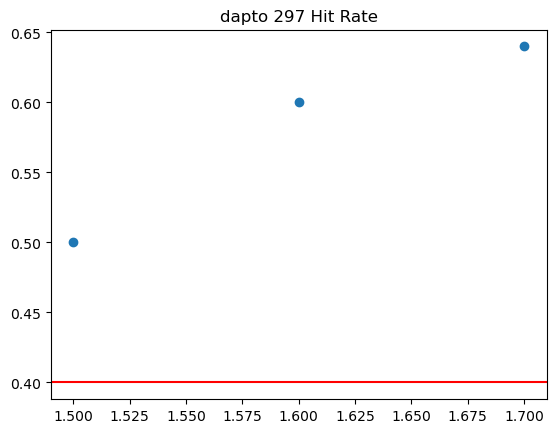

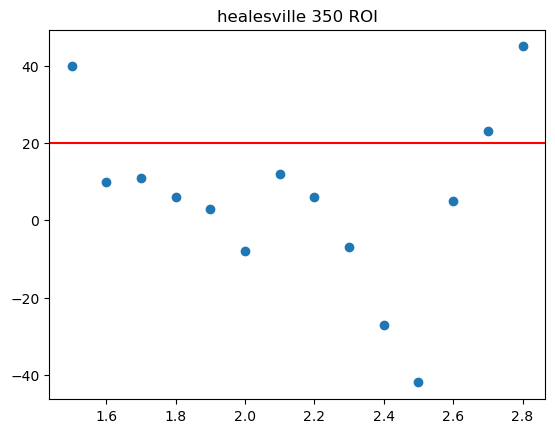

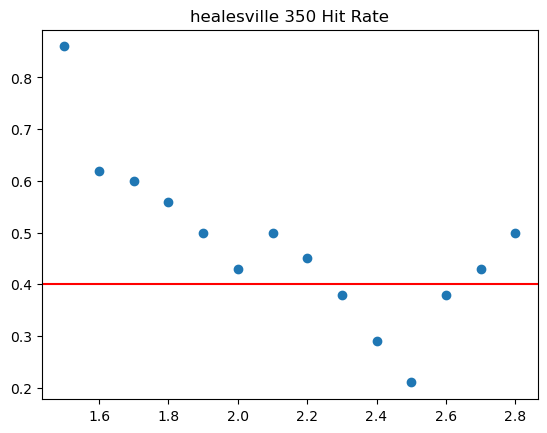

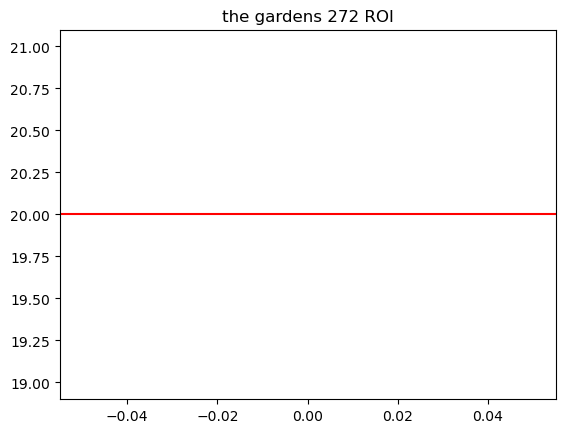

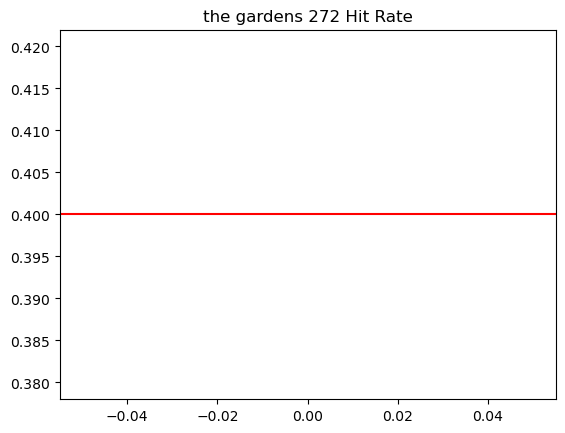

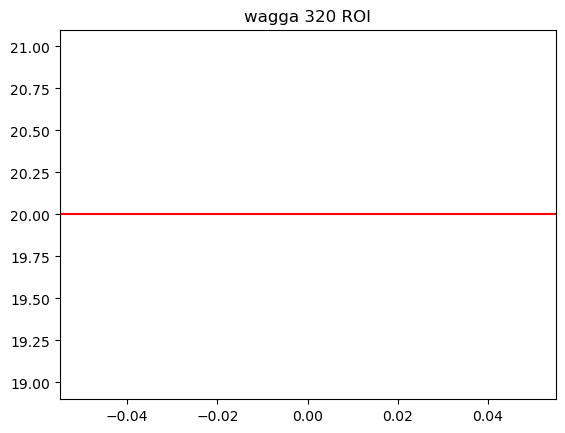

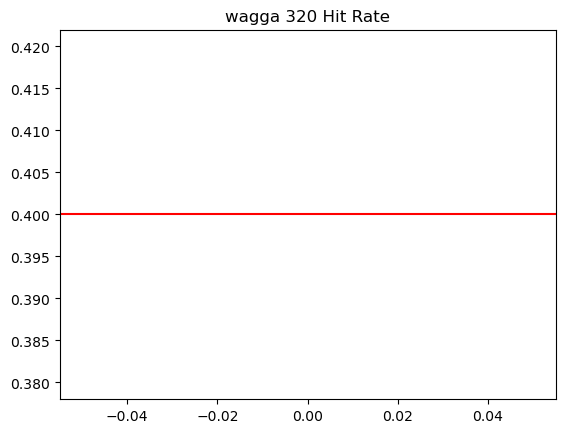

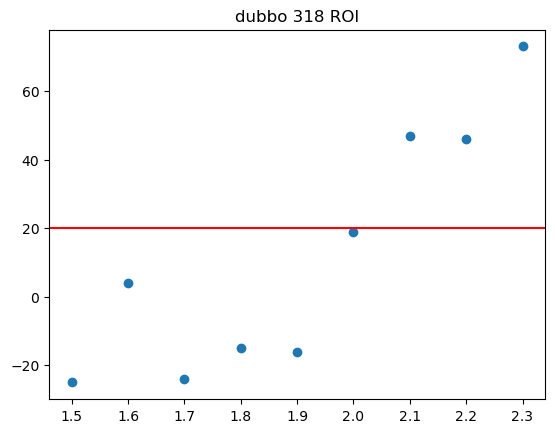

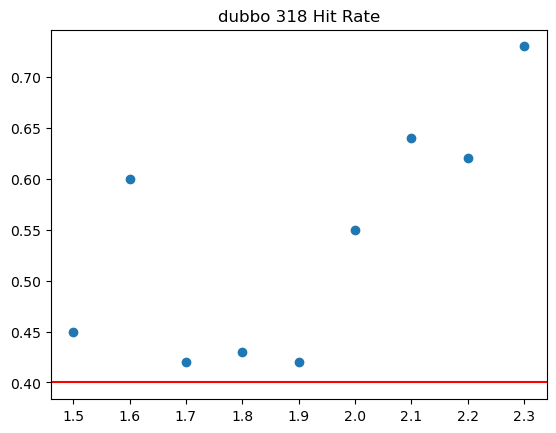

In [485]:
#320 Clear Fav 320 preds

for x in dick.keys():
    
    kra = 0
    for y in dick[x]:
        if y>260 and y<370:
            kra = y
            
    if kra != 0:
        dic = {}
        tracker = []
        rois = []
        hits = []
        bets = []

        for i in range(0,41):
            ls = sim(x,False,kra,[7,8],   0.1,47,   (1.49+i*0.1),(1.81+i*0.1),   True,False,False,   False,True,False,False,False)
            if ls[2]>9:
                tracker.append(1.5+i*0.1)
                rois.append(ls[0])
                hits.append(ls[1])
                bets.append(ls[2])
                dic[1.5+i*0.1] = ls[2]
            else:
                break

        f1 = plt.figure()
        f2 = plt.figure()
        g1 = f1.add_subplot(111)
        g1.scatter(tracker,rois)
        g1.axhline(y = 20, color = 'r', linestyle = '-')
        g2 = f2.add_subplot(111)
        g2.scatter(tracker,hits)
        g2.axhline(y = 0.4, color = 'r', linestyle = '-')
        g1.title.set_text(x+' '+str(kra)+' '+'ROI')
        g2.title.set_text(x+' '+str(kra)+' '+'Hit Rate')
        plt.draw()
        print(x,kra)
        print(dic)
        
plt.show()

albion park 331
{1.5: 23, 1.6: 22, 1.7: 24, 1.8: 21, 1.9: 25, 2.0: 20, 2.1: 15, 2.2: 11, 2.3: 13, 2.4: 12, 2.5: 12}
angle park 342
{}
nowra 365
{1.5: 14, 1.6: 14}
launceston 278
{1.5: 12, 1.6: 16, 1.7: 14, 1.8: 14}
grafton 350
{1.5: 12, 1.6: 18, 1.7: 19, 1.8: 17, 1.9: 14, 2.0: 11, 2.1: 15, 2.2: 19, 2.3: 14, 2.4: 15, 2.5: 12, 2.6: 11, 2.7: 10}
cannington 275
{1.5: 23, 1.6: 18, 1.7: 18, 1.8: 12, 1.9: 10, 2.0: 14, 2.1: 13, 2.2: 16, 2.3: 18, 2.4: 17, 2.5: 19, 2.6: 20, 2.7: 17, 2.8: 15, 2.9000000000000004: 11}
ipswich 288
{1.5: 20, 1.6: 23, 1.7: 22, 1.8: 23, 1.9: 22, 2.0: 22, 2.1: 16, 2.2: 12, 2.3: 16, 2.4: 17, 2.5: 20, 2.6: 20, 2.7: 14, 2.8: 14, 2.9000000000000004: 14, 3.0: 14, 3.1: 13, 3.2: 14, 3.3: 10}
darwin 312
{}
richmond 320
{1.5: 26, 1.6: 22, 1.7: 22, 1.8: 24, 1.9: 27, 2.0: 28, 2.1: 22, 2.2: 29, 2.3: 21, 2.4: 22, 2.5: 19, 2.6: 12, 2.7: 14, 2.8: 12, 2.9000000000000004: 12, 3.0: 12, 3.1: 10}
hobart 340
{1.5: 13}
casino 300
{1.5: 19, 1.6: 19, 1.7: 17, 1.8: 13, 1.9: 13, 2.0: 18, 2.1: 18

FileNotFoundError: [Errno 2] No such file or directory: 'class4/temora.csv'

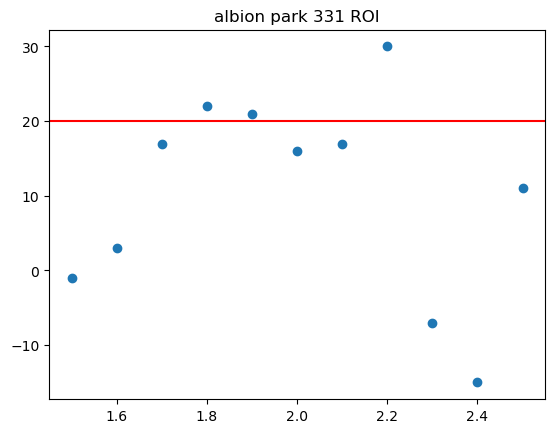

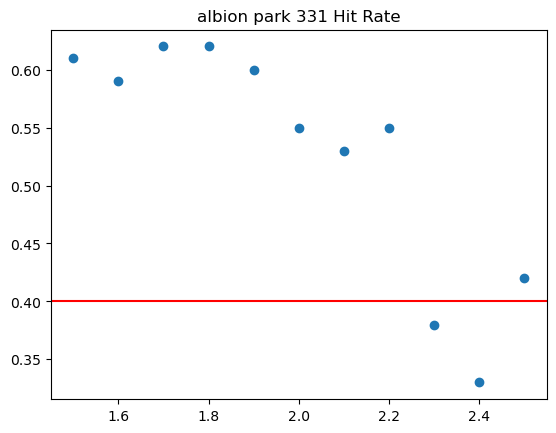

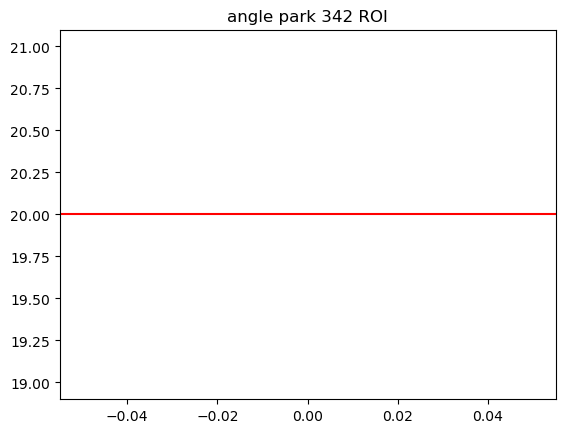

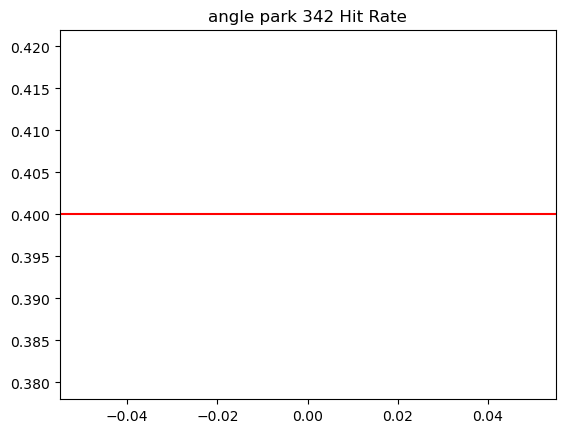

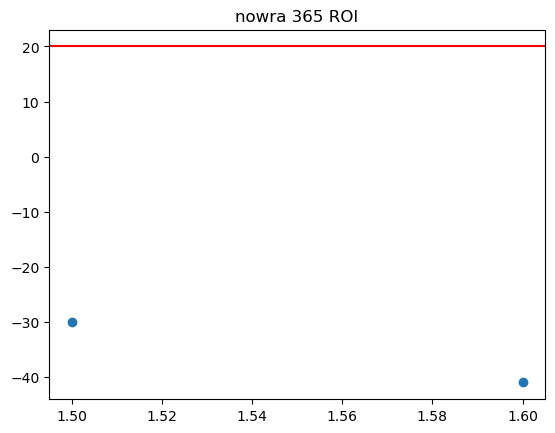

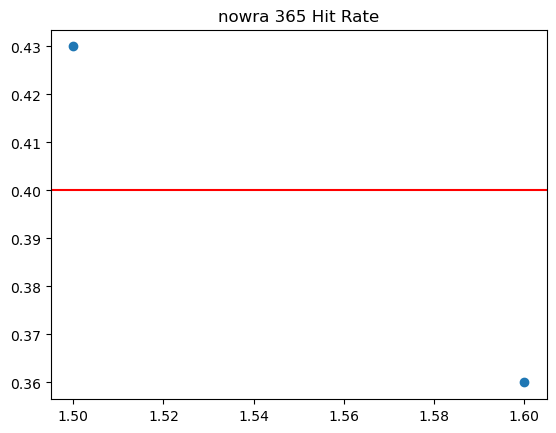

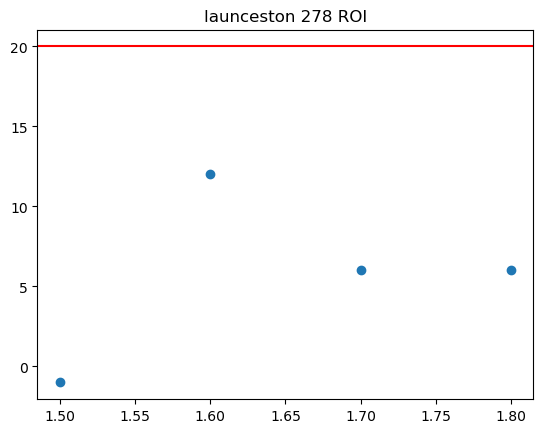

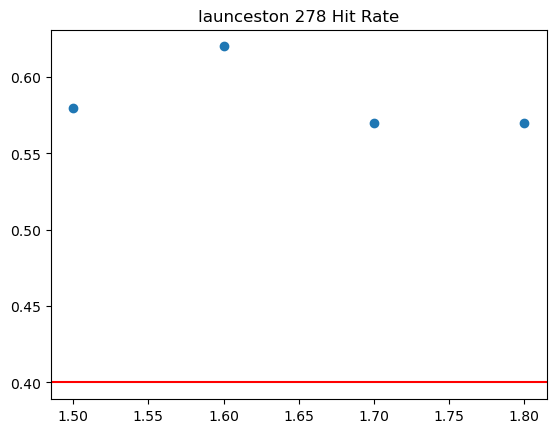

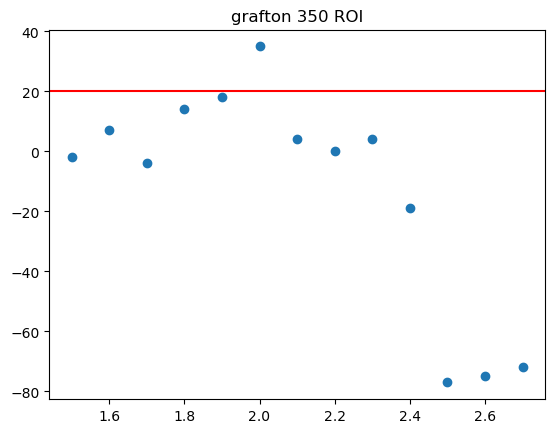

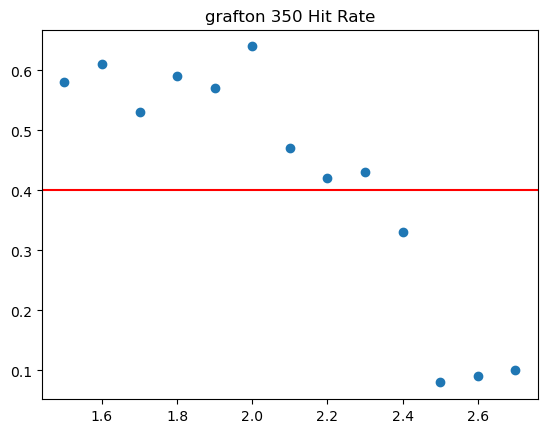

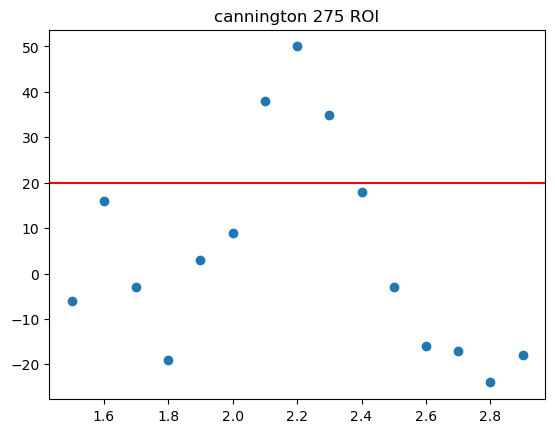

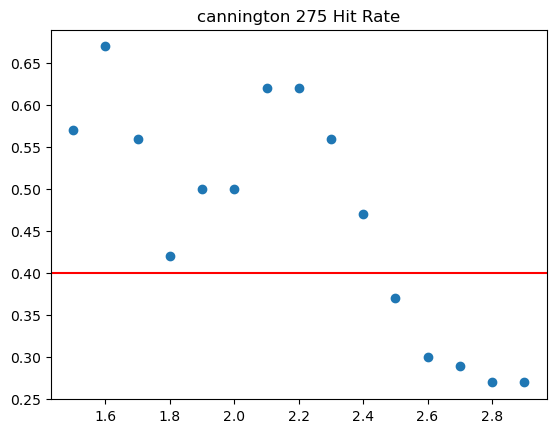

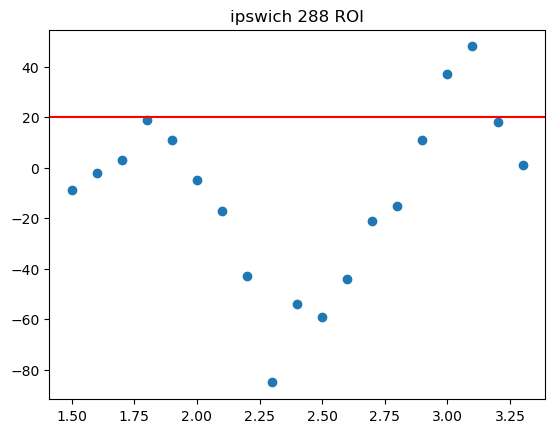

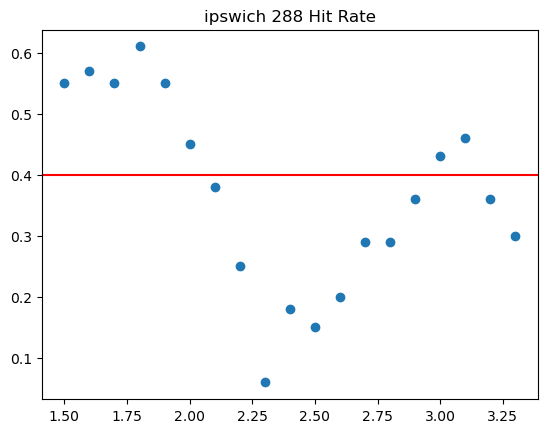

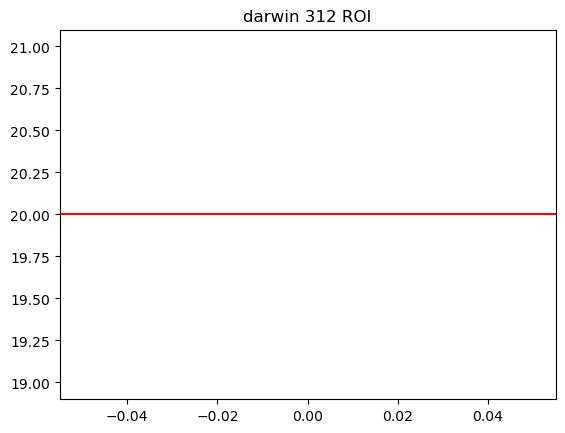

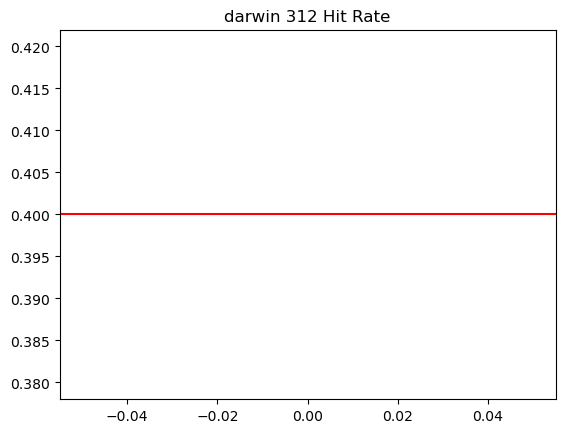

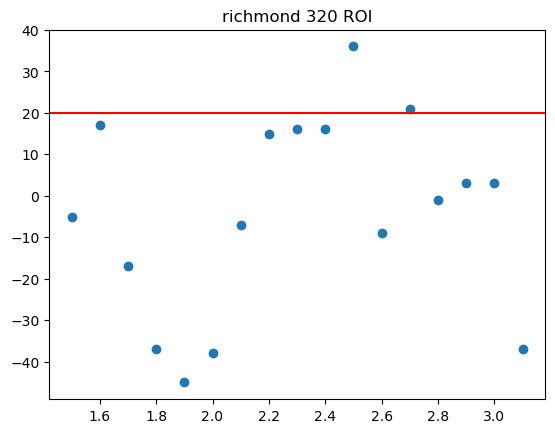

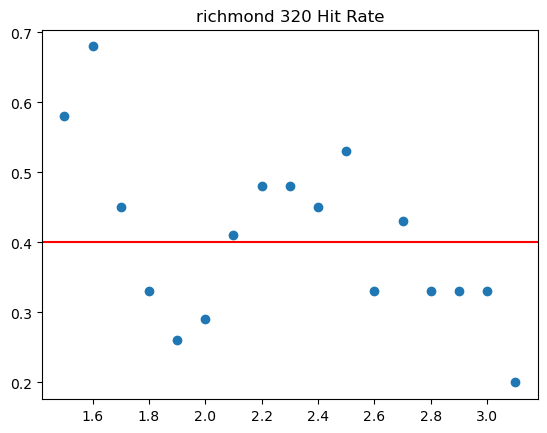

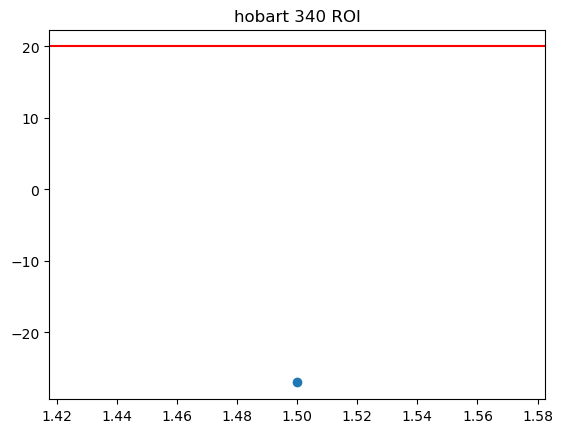

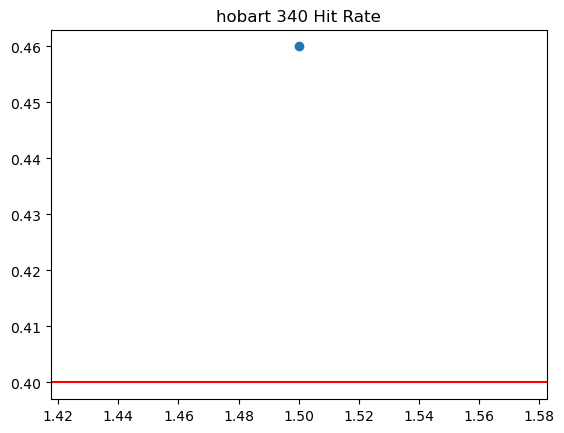

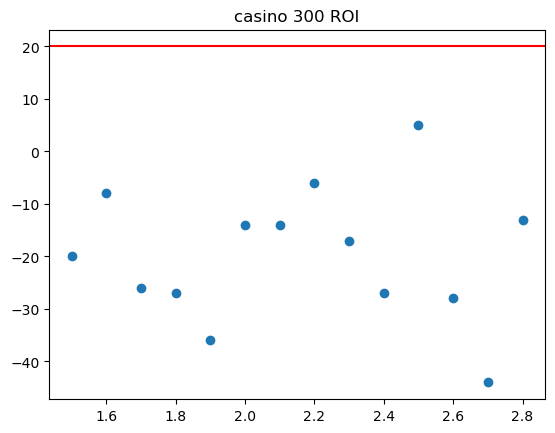

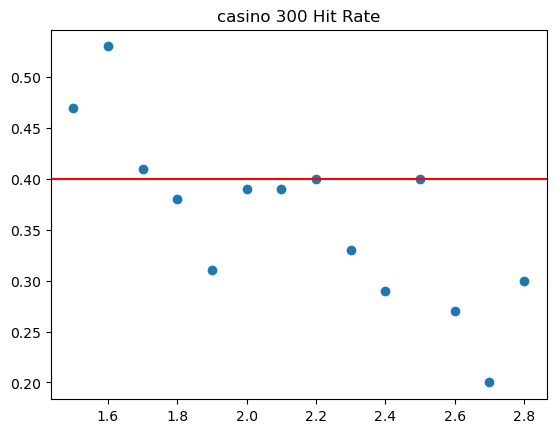

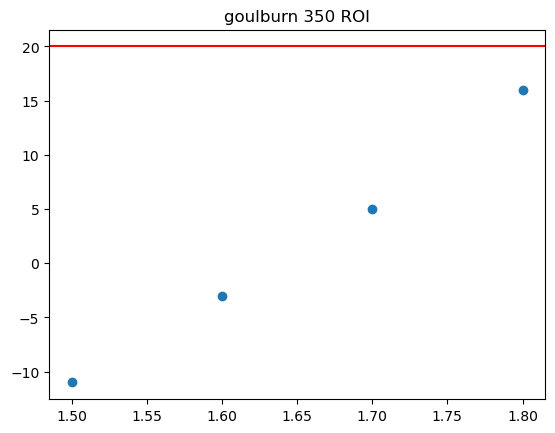

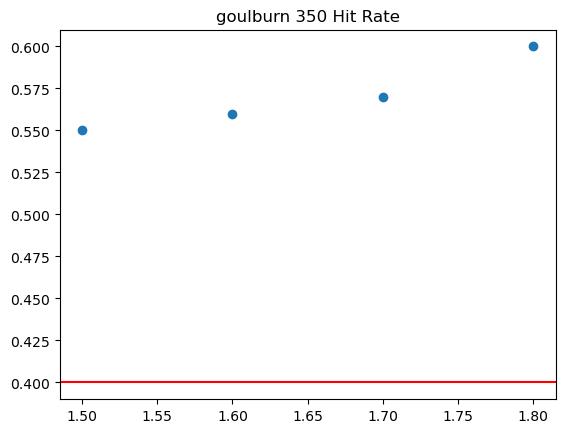

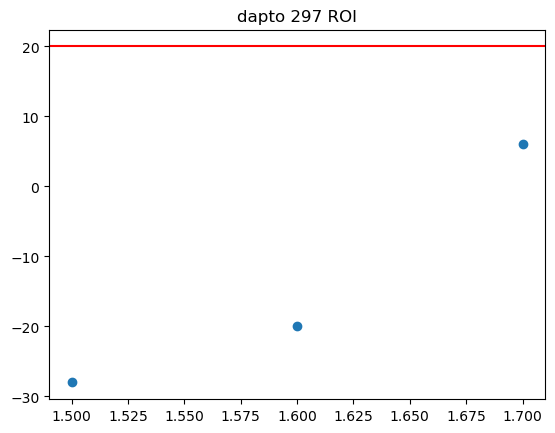

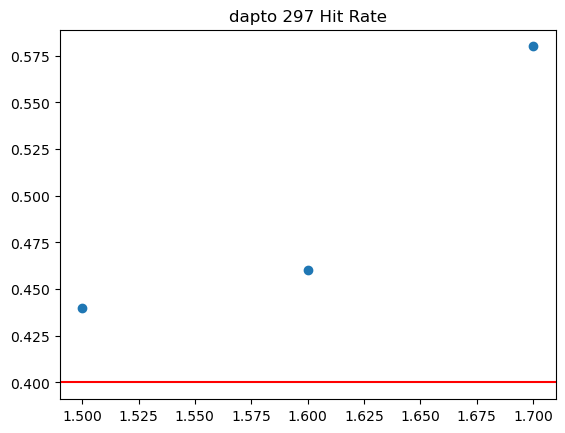

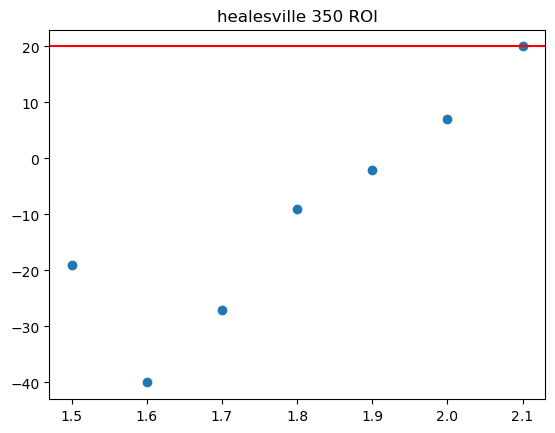

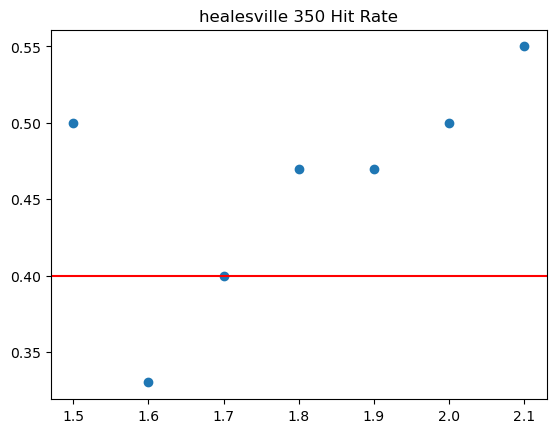

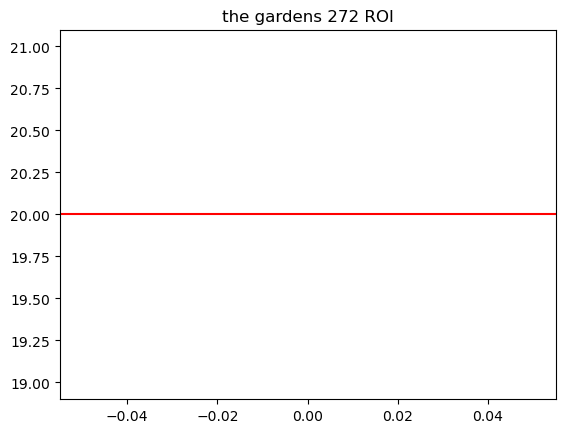

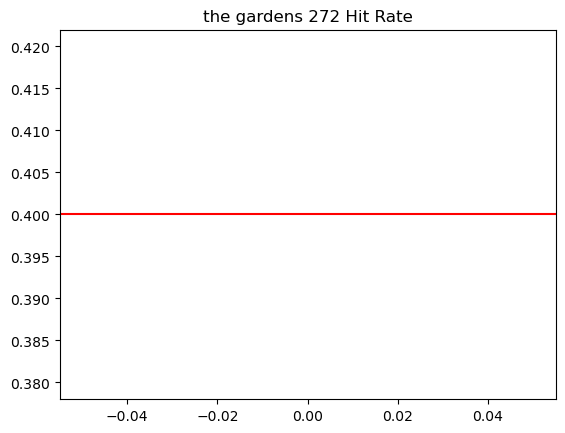

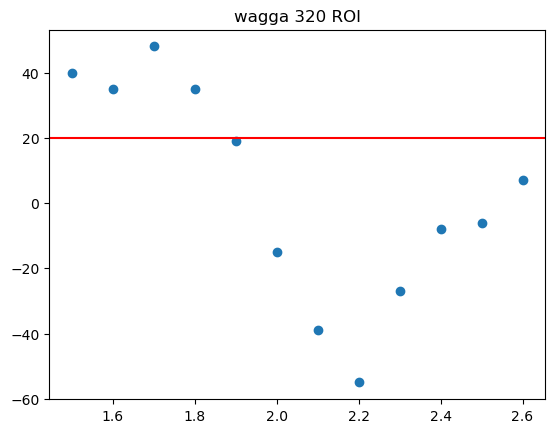

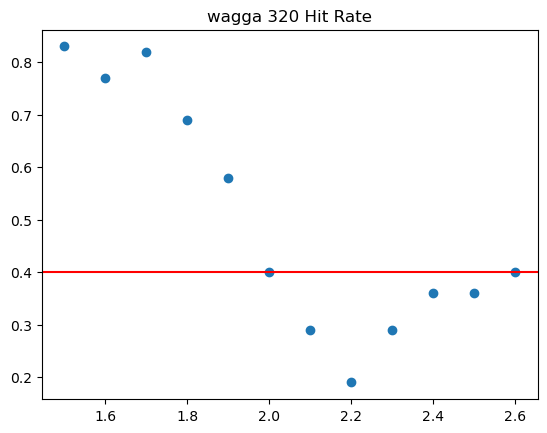

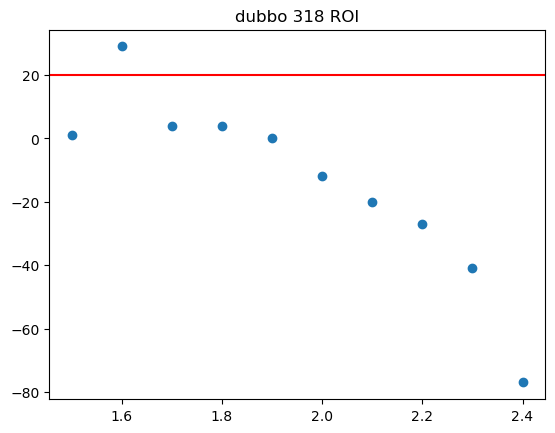

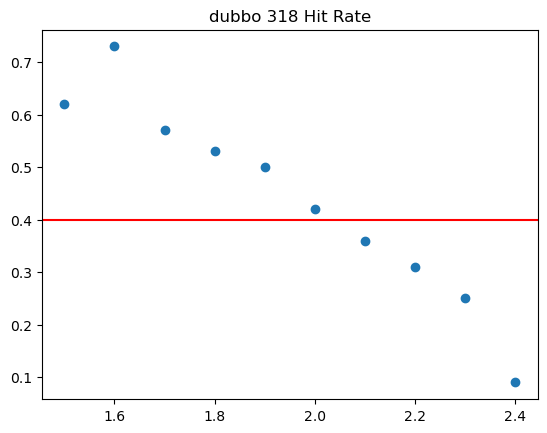

In [678]:
#320 Clear Fav straight preds

for x in dick.keys():
    
    kra = 0
    for y in dick[x]:
        if y>260 and y<370:
            kra = y
            
    if kra != 0:
        dic = {}
        tracker = []
        rois = []
        hits = []
        bets = []

        for i in range(0,41):
            ls = sim(x,False,kra,[7,8],   0.1,47,   (1.49+i*0.1),(1.81+i*0.1),   True,False,False,   True,False,False,False,False)
            if ls[2]>9:
                tracker.append(1.5+i*0.1)
                rois.append(ls[0])
                hits.append(ls[1])
                bets.append(ls[2])
                dic[1.5+i*0.1] = ls[2]
            else:
                break

        f1 = plt.figure()
        f2 = plt.figure()
        g1 = f1.add_subplot(111)
        g1.scatter(tracker,rois)
        g1.axhline(y = 20, color = 'r', linestyle = '-')
        g2 = f2.add_subplot(111)
        g2.scatter(tracker,hits)
        g2.axhline(y = 0.4, color = 'r', linestyle = '-')
        g1.title.set_text(x+' '+str(kra)+' '+'ROI')
        g2.title.set_text(x+' '+str(kra)+' '+'Hit Rate')
        plt.draw()
        print(x,kra)
        print(dic)
        
plt.show()

bendigo 500
{1.5: 18, 1.6: 15, 1.7: 14, 1.8: 15, 1.9: 14, 2.0: 15, 2.1: 19, 2.2: 16, 2.3: 20, 2.4: 21, 2.5: 15, 2.6: 13}
sandown park 515
{1.5: 28, 1.6: 29, 1.7: 27, 1.8: 19, 1.9: 17, 2.0: 19, 2.1: 23, 2.2: 22, 2.3: 23, 2.4: 22, 2.5: 21, 2.6: 26, 2.7: 28, 2.8: 25, 2.9000000000000004: 28, 3.0: 23, 3.1: 21, 3.2: 18, 3.3: 16, 3.4000000000000004: 14, 3.5: 15, 3.6: 17, 3.7: 13, 3.8000000000000003: 12, 3.9000000000000004: 12}
albion park 520
{1.5: 29, 1.6: 31, 1.7: 27, 1.8: 26, 1.9: 23, 2.0: 23, 2.1: 26, 2.2: 32, 2.3: 33, 2.4: 27, 2.5: 25, 2.6: 24, 2.7: 21, 2.8: 23, 2.9000000000000004: 16, 3.0: 11, 3.1: 11}
mount gambier 512
{}
angle park 515
{}
launceston 515
{1.5: 10, 1.6: 10}
warragul 460
{1.5: 19, 1.6: 20, 1.7: 25, 1.8: 22, 1.9: 27, 2.0: 23, 2.1: 21, 2.2: 19, 2.3: 15, 2.4: 17, 2.5: 14, 2.6: 12}
horsham 485
{}
geelong 460
{1.5: 16, 1.6: 16, 1.7: 11, 1.8: 12}
cannington 520
{1.5: 25, 1.6: 22, 1.7: 28, 1.8: 24, 1.9: 26, 2.0: 19, 2.1: 11, 2.2: 12}
ipswich 520
{1.5: 18, 1.6: 21, 1.7: 23, 1.8:

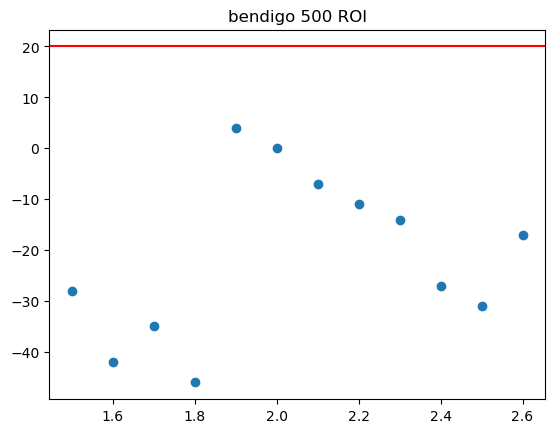

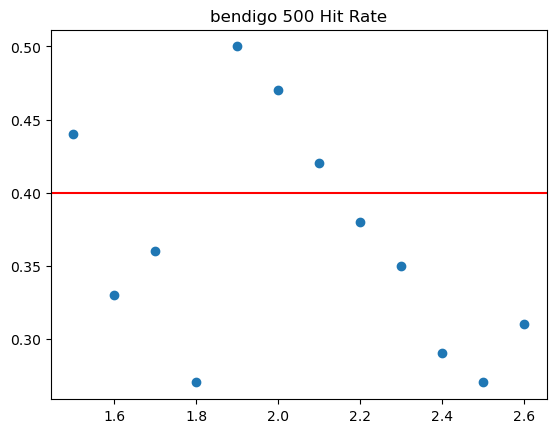

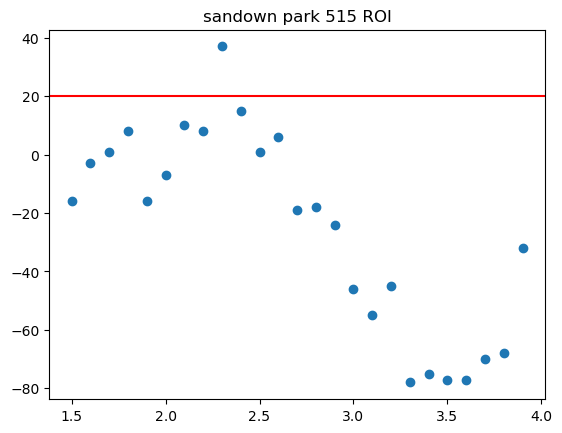

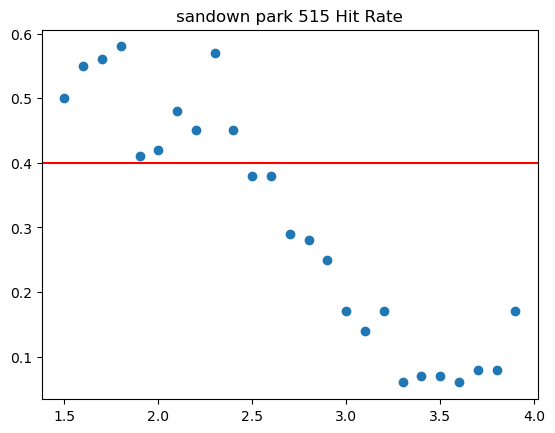

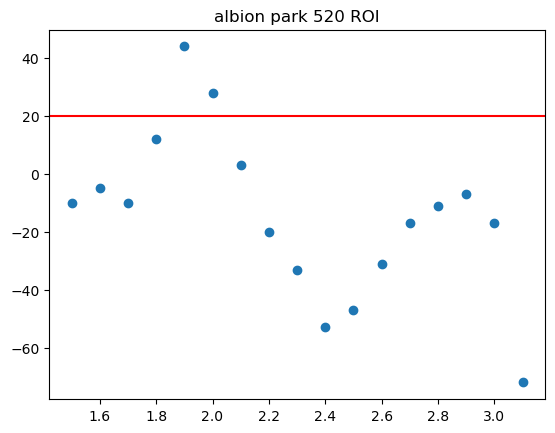

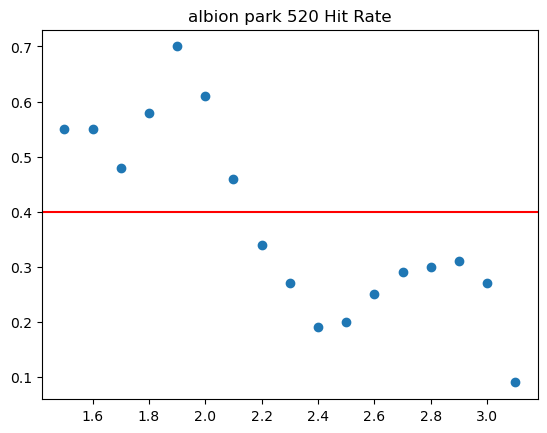

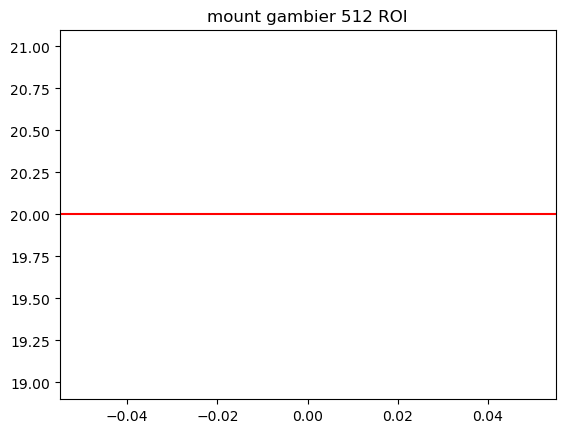

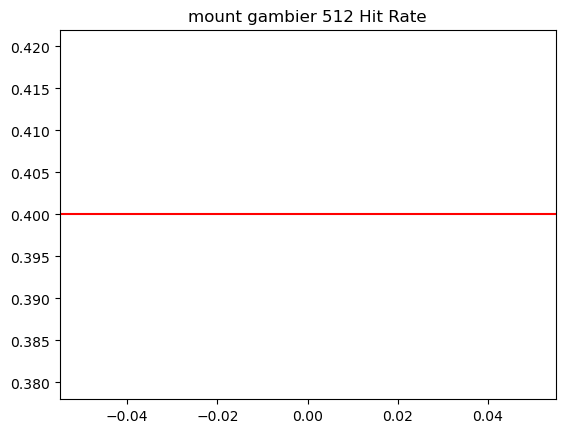

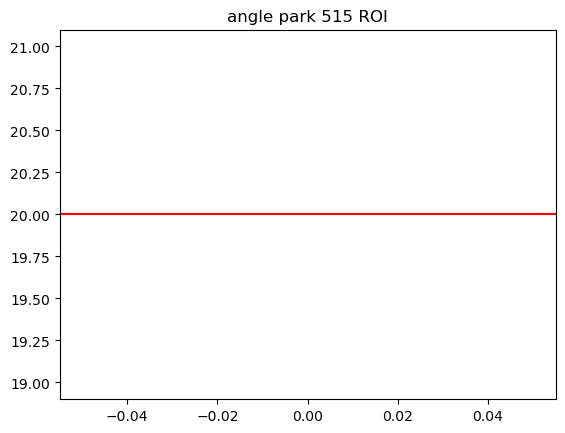

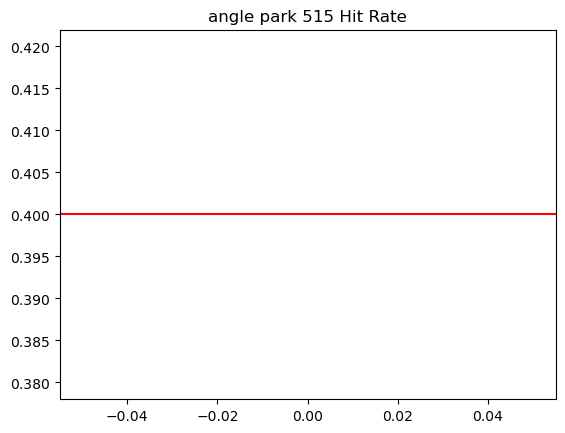

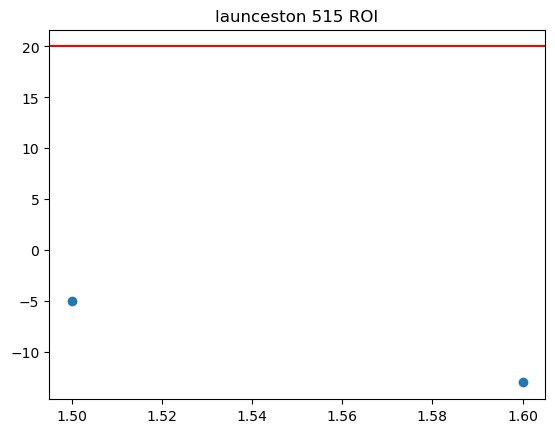

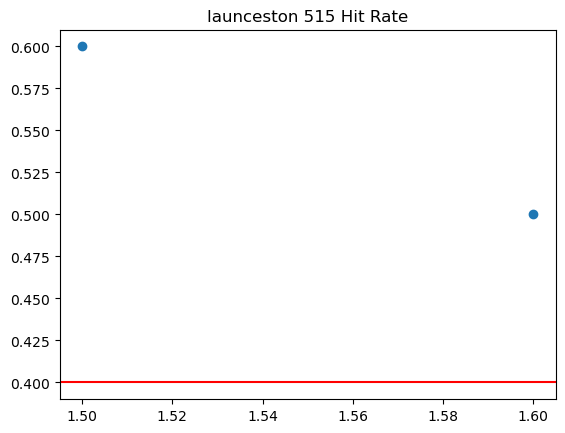

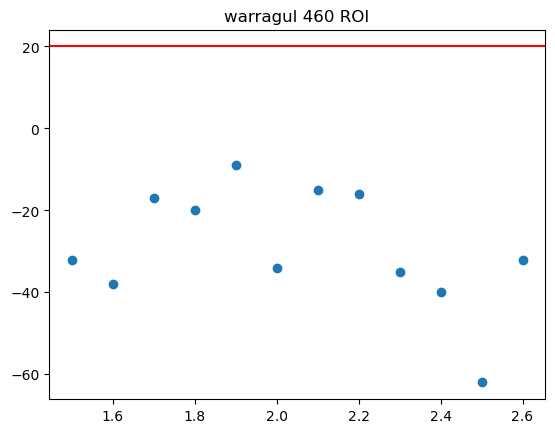

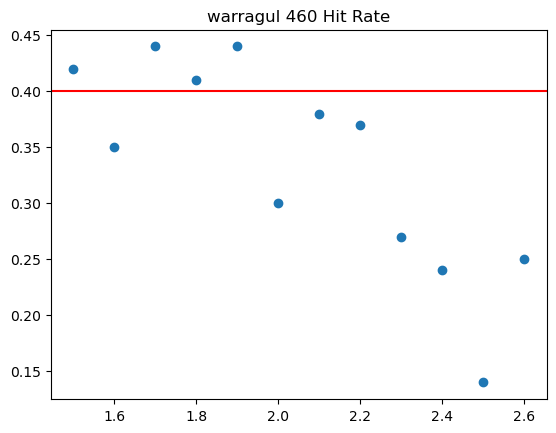

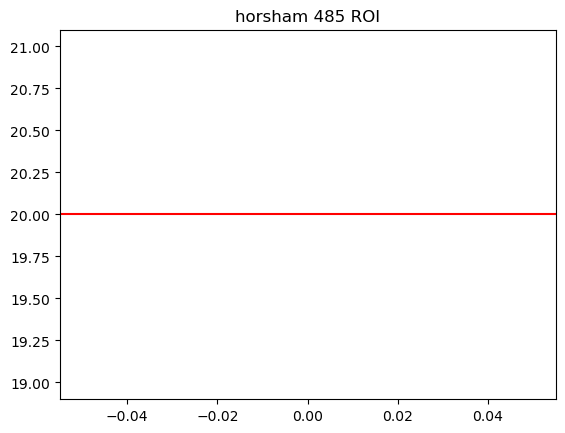

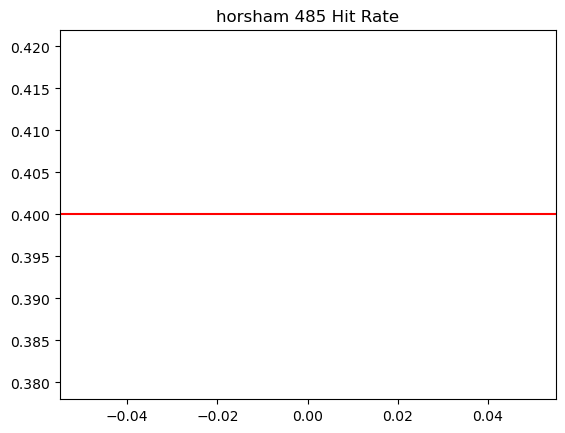

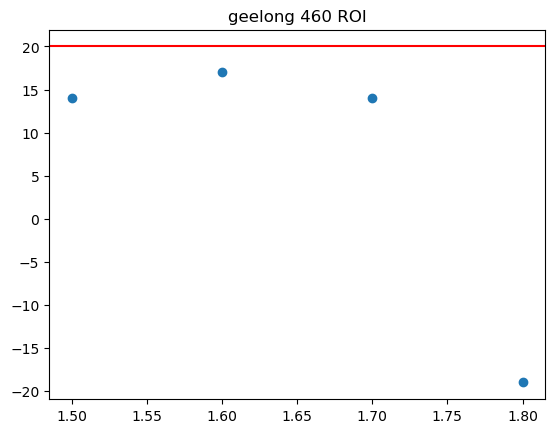

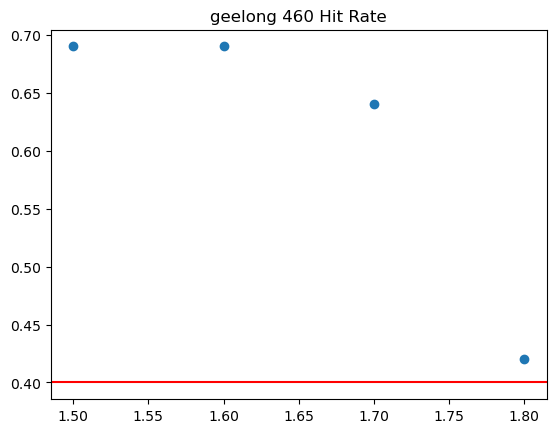

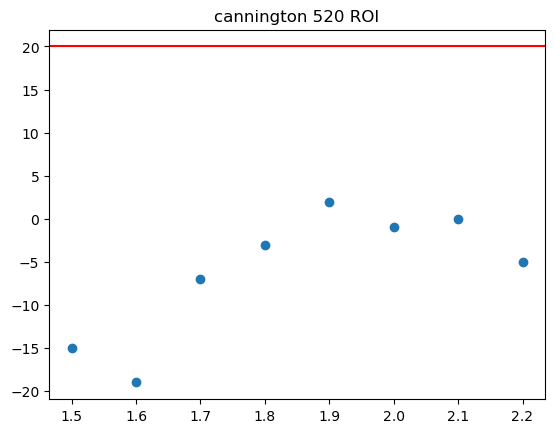

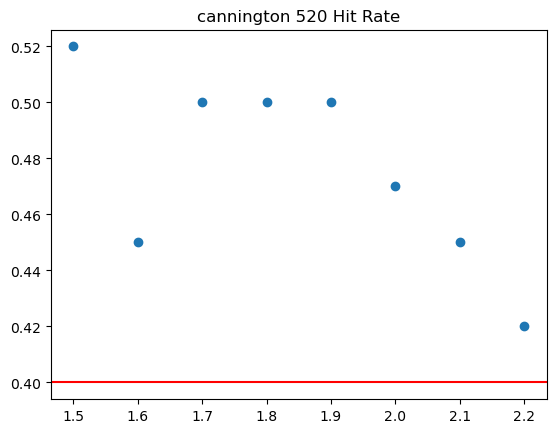

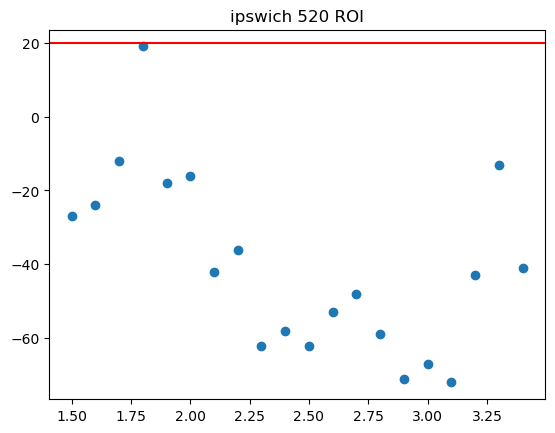

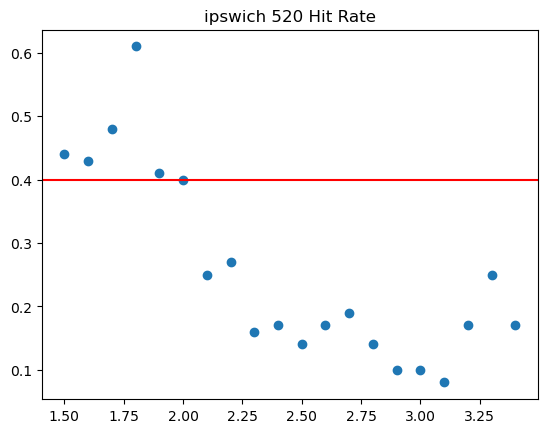

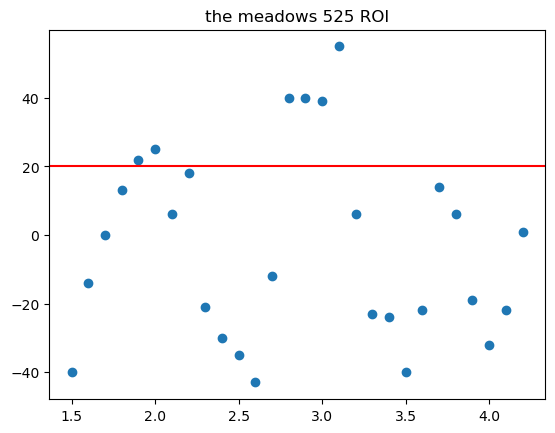

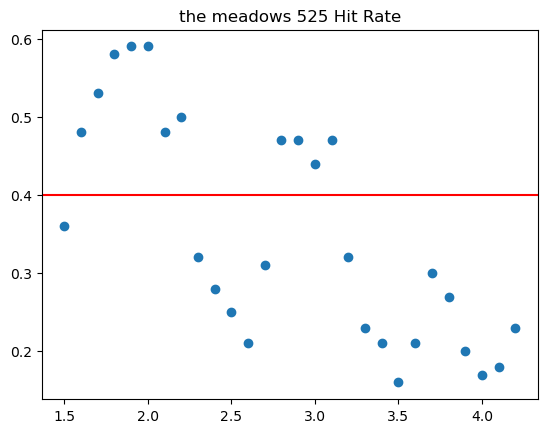

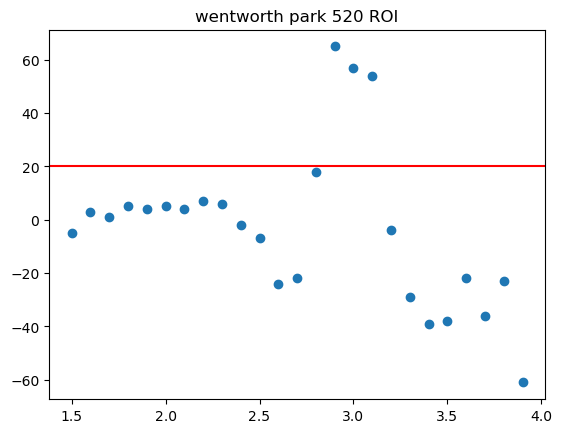

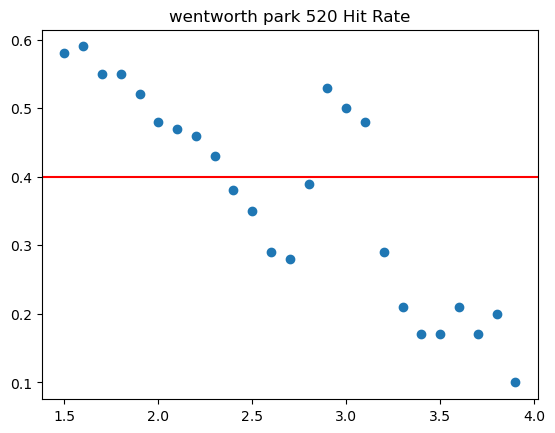

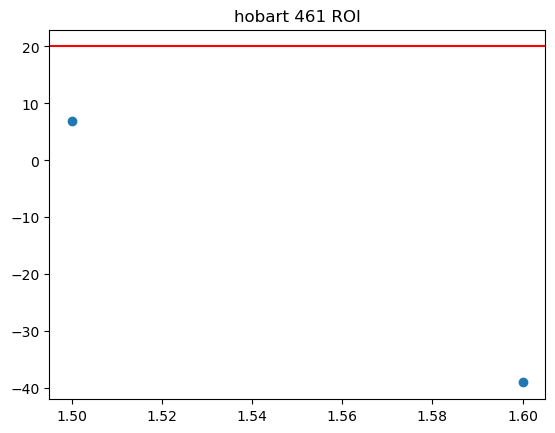

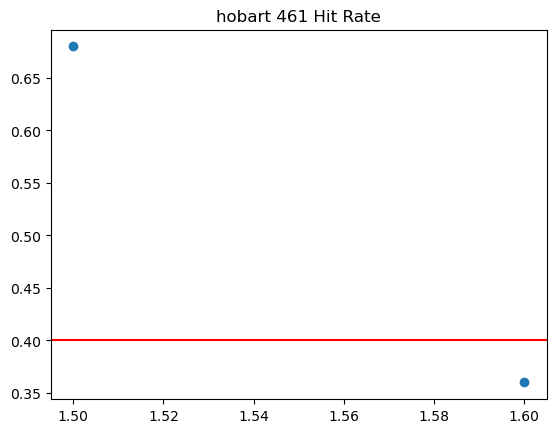

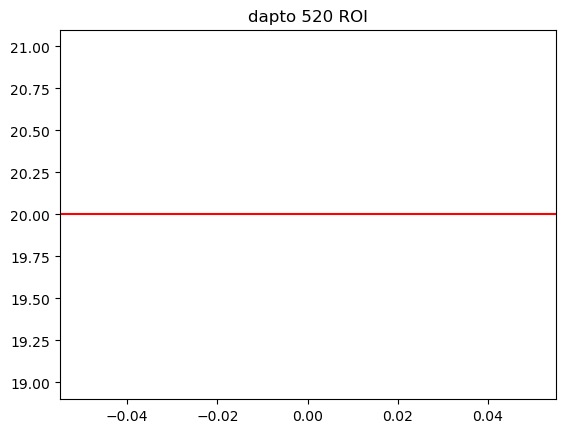

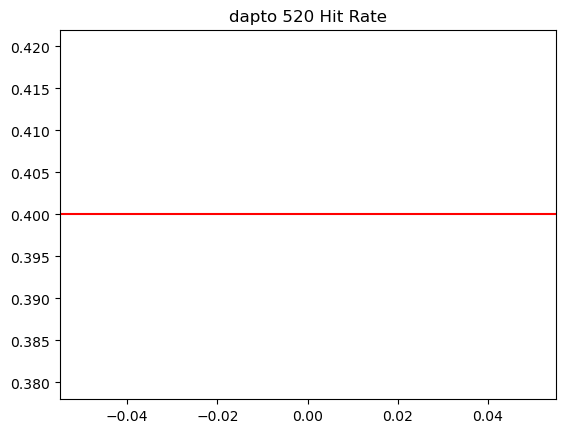

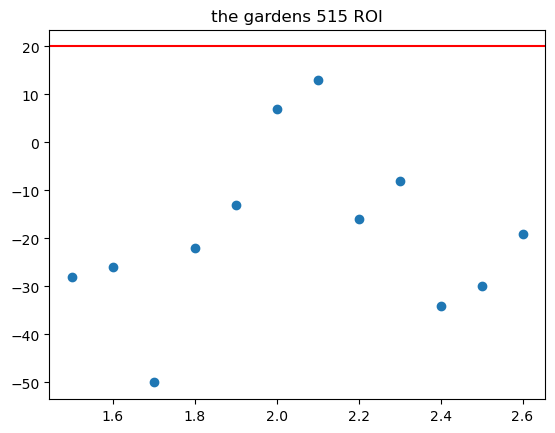

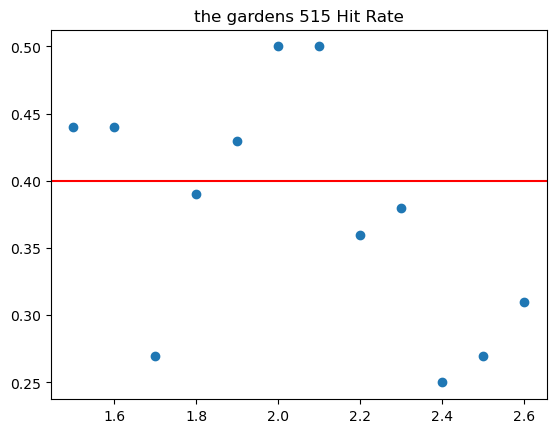

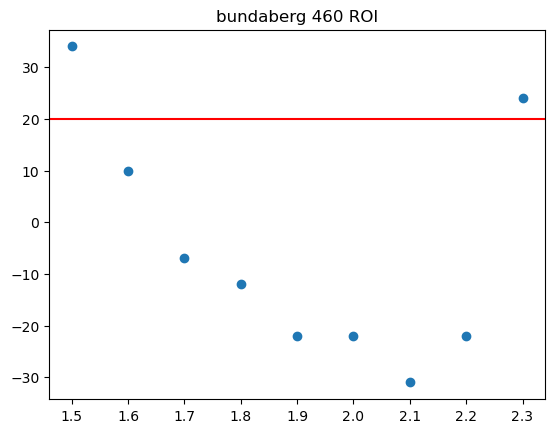

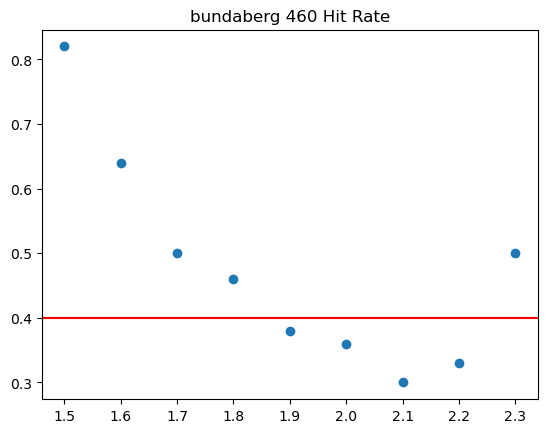

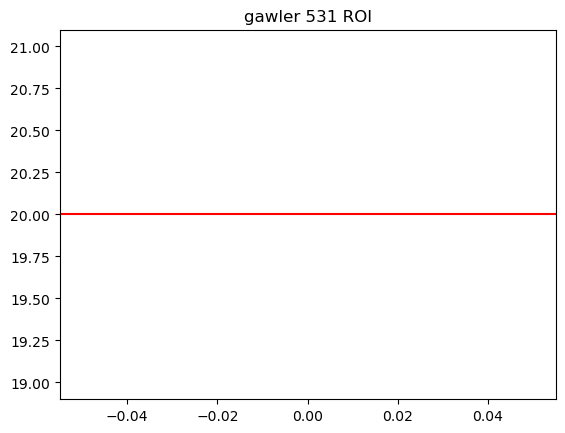

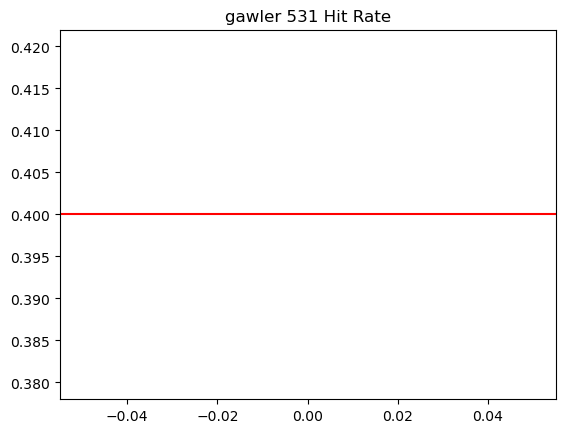

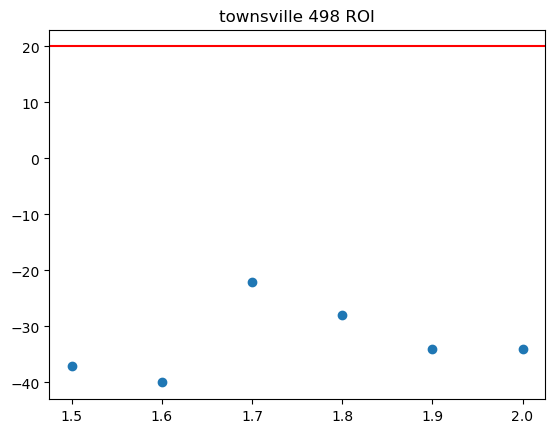

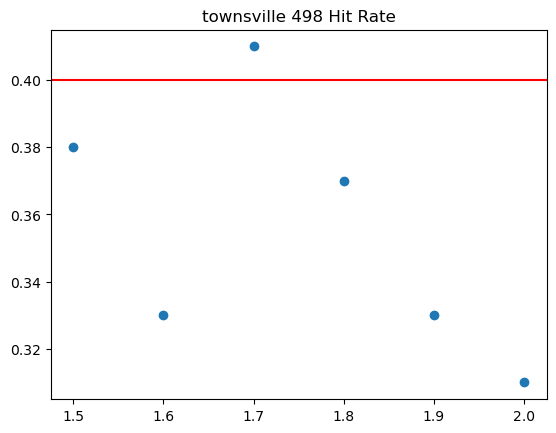

In [501]:
#520 Clear Fav 520 albion fit


#520 Mod
df = pd.read_csv('class4/albion park.csv')
df = df[df['Distance']==520]

preds = ['at_cas_dist_time_avg', 'faster_inside', 'i2', 'i1', 'split_z_avg', 'last_5_avg', 'mean_place', 'at_cas_perc', 'in_form', 'mean_in_race_pos', 'last_5_avg']
df = df.dropna(subset=preds)

mod_520 = LogisticRegression(random_state=42,max_iter=2000).fit(df[preds], df['Win'])



for x in dick.keys():
    
    kra = 0
    for y in dick[x]:
        if y>450 and y<535:
            kra = y
            
    if kra != 0:
        dic = {}
        tracker = []
        rois = []
        hits = []
        bets = []

        for i in range(0,41):
            ls = sim(x,False,kra,[7,8],   0.1,47,   (1.49+i*0.1),(1.81+i*0.1),   True,False,False,   False,False,False,True,False,mod_520)
            if ls[2]>9:
                tracker.append(1.5+i*0.1)
                rois.append(ls[0])
                hits.append(ls[1])
                bets.append(ls[2])
                dic[1.5+i*0.1] = ls[2]
            else:
                break

        f1 = plt.figure()
        f2 = plt.figure()
        g1 = f1.add_subplot(111)
        g1.scatter(tracker,rois)
        g1.axhline(y = 20, color = 'r', linestyle = '-')
        g2 = f2.add_subplot(111)
        g2.scatter(tracker,hits)
        g2.axhline(y = 0.4, color = 'r', linestyle = '-')
        g1.title.set_text(x+' '+str(kra)+' '+'ROI')
        g2.title.set_text(x+' '+str(kra)+' '+'Hit Rate')
        plt.draw()
        print(x,kra)
        print(dic)
        
plt.show()

{1.5: 16, 1.6: 19, 1.7: 17, 1.8: 15, 1.9: 10, 2.0: 10, 2.1: 14, 2.2: 24, 2.3: 21, 2.4: 18, 2.5: 12}
{1.5: 13, 1.6: 17, 1.7: 13, 1.8: 15, 1.9: 10, 2.0: 10, 2.1: 13, 2.2: 15, 2.3: 15, 2.4: 16, 2.5: 15, 2.6: 14, 2.7: 14}
{1.5: 15, 1.6: 22, 1.7: 17, 1.8: 20, 1.9: 13, 2.0: 13, 2.1: 15, 2.2: 16, 2.3: 17, 2.4: 17, 2.5: 16, 2.6: 14, 2.7: 14}


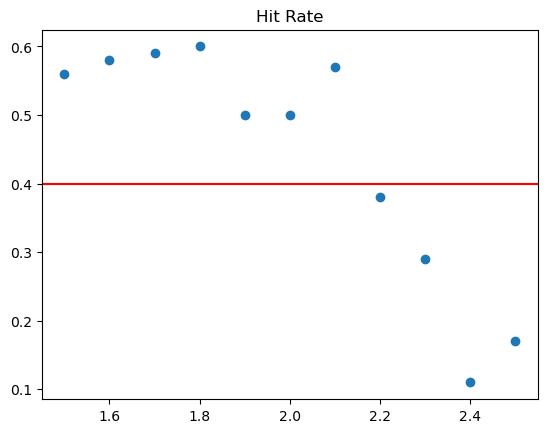

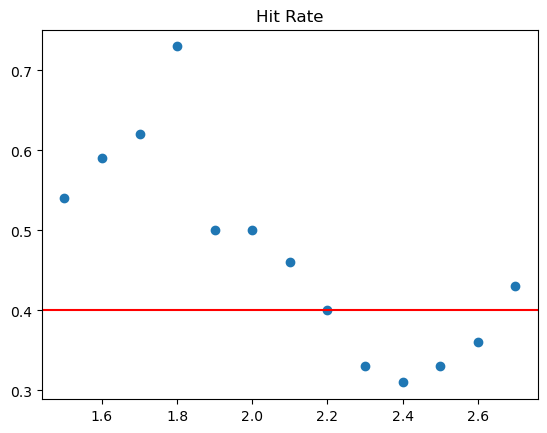

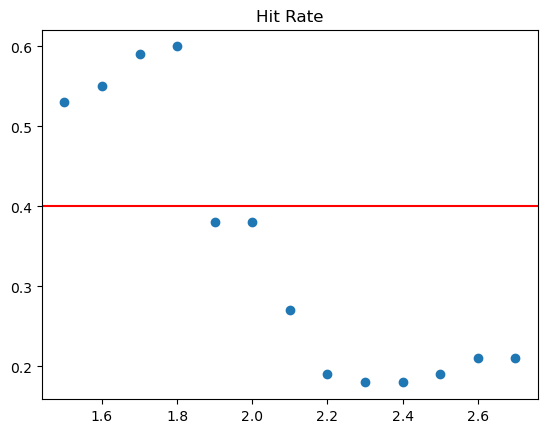

In [704]:
#Pred Comparer

trk = 'albion park'
dist = 395

for x in range(2,5):
    dic = {}
    tracker = []
    rois = []
    hits = []
    bets = []

    for i in range(0,41):
        if x == 2:
            ls = sim(trk,False,dist,[7,8],   0.1,47,   (1.49+i*0.1),(1.81+i*0.1),   True,False,False,   True,False,False,False,False)
        if x == 3:
            ls = sim(trk,False,dist,[7,8],   0.1,47,   (1.49+i*0.1),(1.81+i*0.1),   True,False,False,   False,True,False,False,False)
        if x == 4:
            ls = sim(trk,False,dist,[7,8],   0.1,47,   (1.49+i*0.1),(1.81+i*0.1),   True,False,False,   False,False,True,False,False)
        
        if ls[2]>9:
            tracker.append(1.5+i*0.1)
            rois.append(ls[0])
            hits.append(ls[1])
            bets.append(ls[2])
            dic[1.5+i*0.1] = ls[2]
        else:
            break

    f2 = plt.figure()
    g2 = f2.add_subplot(111)
    g2.scatter(tracker,hits)
    g2.axhline(y = 0.4, color = 'r', linestyle = '-')
    g2.title.set_text('Hit Rate')
    plt.draw()
    print(dic)

In [516]:
dick = {'bendigo': [500, 425],
 'sandown park': [515, 595],
 'sale': [440],
 'albion park': [331, 395, 520],
 'mount gambier': [512, 400],
 'angle park': [515, 342],
 'shepparton': [390, 450],
 'traralgon': [395, 450],
 'ballarat': [450, 390],
 'nowra': [365],
 'launceston': [515, 278],
 'grafton': [350],
 'warragul': [460, 400],
 'horsham': [410, 485],
 'geelong': [460, 400],
 'cannington': [380, 520, 275],
 'maitland': [400],
 'ipswich': [431, 520, 288],
 'the meadows': [525, 600],
 'darwin': [312, 383],
 'richmond': [401, 320],
 'wentworth park': [520],
 'rockhampton': [407],
 'hobart': [340, 461],
 'casino': [411, 300],
 'goulburn': [350, 440],
 'dapto': [520, 297],
 'healesville': [300, 350],
 'the gardens': [515, 400, 272],
 'wagga': [320],
 'bulli': [400],
 'bundaberg': [460],
 'gawler': [400, 531],
 'townsville': [380, 498],
 'dubbo': [318, 400],
 'temora': [330],
 'capalaba': [366],
 'warrnambool': [390, 450],
 'gosford': [388],
 'murray bridge': [395, 300],
 'gunnedah': [340],
 'richmond straight': [324]}

{1.5: 24, 1.6: 34, 1.7: 30, 1.8: 27, 1.9: 21, 2.0: 13, 2.1: 11, 2.2: 12, 2.3: 14, 2.4: 14, 2.5: 12, 2.6: 14, 2.7: 14, 2.8: 16, 2.9000000000000004: 14, 3.0: 12}


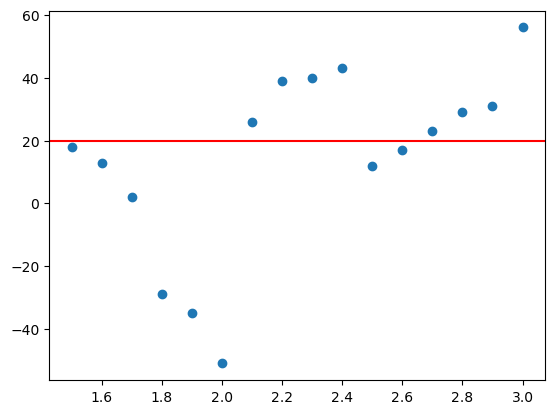

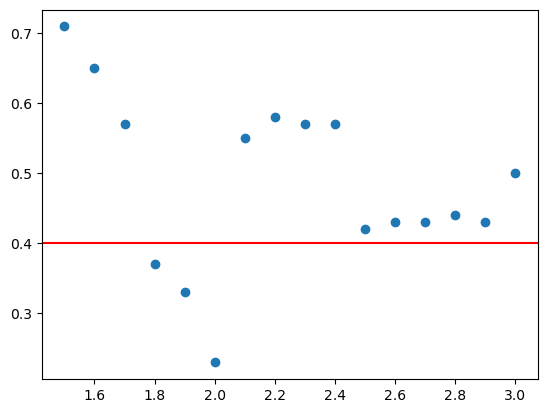

In [58]:
#Capalaba
dic = {}
tracker = []
rois = []
hits = []
bets = []

for i in range(0,41):
    ls = sim('capalaba',False,366,[7,8],   0.1,47,   (1.49+i*0.1),(1.81+i*0.1),   True,False,False,   False,True,False,False,False)
    if ls[2]>9:
        tracker.append(1.5+i*0.1)
        rois.append(ls[0])
        hits.append(ls[1])
        bets.append(ls[2])
        dic[1.5+i*0.1] = ls[2]
    else:
        break

f1 = plt.figure()
f2 = plt.figure()
g1 = f1.add_subplot(111)
g1.scatter(tracker,rois)
g1.axhline(y = 20, color = 'r', linestyle = '-')
g2 = f2.add_subplot(111)
g2.scatter(tracker,hits)
g2.axhline(y = 0.4, color = 'r', linestyle = '-')
plt.draw()
print(dic)

{1.5: 18, 1.6: 18, 1.7: 17, 1.8: 11, 1.9: 12, 2.0: 12, 2.1: 21, 2.2: 20, 2.3: 21, 2.4: 19, 2.5: 15, 2.6: 20, 2.7: 22, 2.8: 17, 2.9000000000000004: 19, 3.0: 15, 3.1: 11, 3.2: 11, 3.3: 10, 3.4000000000000004: 10, 3.5: 11, 3.6: 17, 3.7: 16, 3.8000000000000003: 13, 3.9000000000000004: 18, 4.0: 11, 4.1: 14, 4.2: 17}


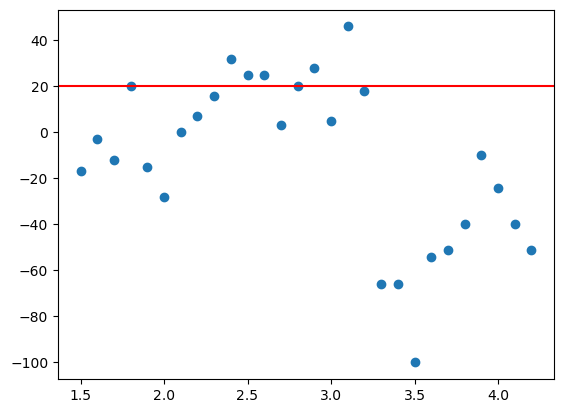

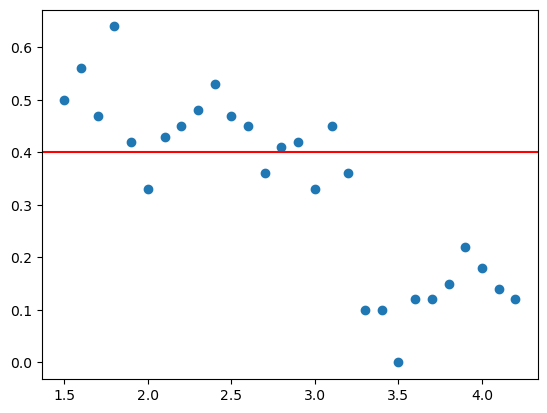

In [42]:
#Sandown Park
dic = {}
tracker = []
rois = []
hits = []
bets = []

for i in range(0,41):
    ls = sim('sandown park',False,515,[7,8],   0.1,47,   (1.49+i*0.1),(1.81+i*0.1),   True,False,False,   False,True,False,False,False)
    if ls[2]>9:
        tracker.append(1.5+i*0.1)
        rois.append(ls[0])
        hits.append(ls[1])
        bets.append(ls[2])
        dic[1.5+i*0.1] = ls[2]
    else:
        break

f1 = plt.figure()
f2 = plt.figure()
g1 = f1.add_subplot(111)
g1.scatter(tracker,rois)
g1.axhline(y = 20, color = 'r', linestyle = '-')
g2 = f2.add_subplot(111)
g2.scatter(tracker,hits)
g2.axhline(y = 0.4, color = 'r', linestyle = '-')
plt.draw()
print(dic)

{1.5: 16, 1.6: 16, 1.7: 19, 1.8: 13, 1.9: 11, 2.0: 10, 2.1: 10, 2.2: 16, 2.3: 15, 2.4: 13}


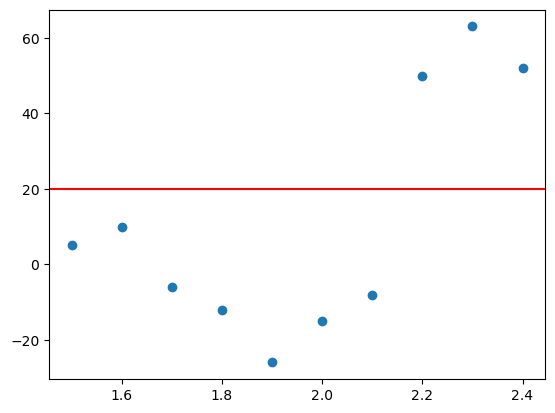

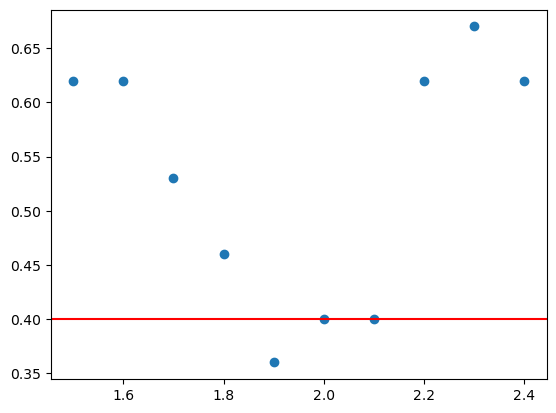

In [8]:
#Grafton
dic = {}
tracker = []
rois = []
hits = []
bets = []

for i in range(0,41):
    ls = sim('grafton',False,350,[7,8],   0.1,47,   (1.49+i*0.1),(1.81+i*0.1),   True,False,False,   False,True,False,False,False)
    if ls[2]>9:
        tracker.append(1.5+i*0.1)
        rois.append(ls[0])
        hits.append(ls[1])
        bets.append(ls[2])
        dic[1.5+i*0.1] = ls[2]
    else:
        break

f1 = plt.figure()
f2 = plt.figure()
g1 = f1.add_subplot(111)
g1.scatter(tracker,rois)
g1.axhline(y = 20, color = 'r', linestyle = '-')
g2 = f2.add_subplot(111)
g2.scatter(tracker,hits)
g2.axhline(y = 0.4, color = 'r', linestyle = '-')
plt.draw()
print(dic)

{1.5: 12, 1.6: 14, 1.7: 15, 1.8: 19, 1.9: 19, 2.0: 21, 2.1: 24, 2.2: 26, 2.3: 31, 2.4: 31, 2.5: 33, 2.6: 32, 2.7: 33, 2.8: 28, 2.9000000000000004: 26, 3.0: 25, 3.1: 27, 3.2: 31, 3.3: 28, 3.4000000000000004: 31, 3.5: 28, 3.6: 35, 3.7: 24, 3.8000000000000003: 29, 3.9000000000000004: 21, 4.0: 22, 4.1: 15, 4.2: 21, 4.300000000000001: 14, 4.4: 24, 4.5: 20, 4.6: 22, 4.7: 16, 4.800000000000001: 16}


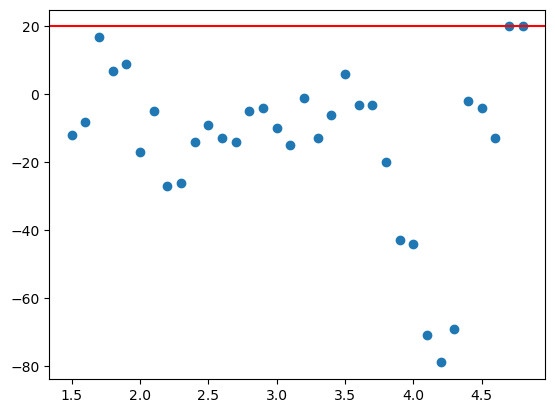

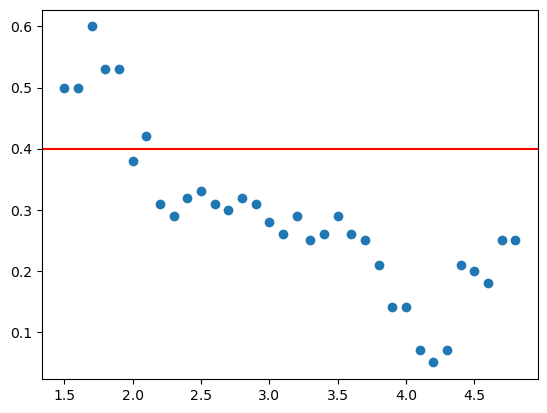

In [57]:
#Traralgon
dic = {}
tracker = []
rois = []
hits = []
bets = []

for i in range(0,41):
    ls = sim('traralgon',False,395,[7,8],   0.1,47,   (1.49+i*0.1),(1.91+i*0.1),   False,False,False,   False,True,False,False,False)
    if ls[2]>9:
        tracker.append(1.5+i*0.1)
        rois.append(ls[0])
        hits.append(ls[1])
        bets.append(ls[2])
        dic[1.5+i*0.1] = ls[2]
    else:
        break

f1 = plt.figure()
f2 = plt.figure()
g1 = f1.add_subplot(111)
g1.scatter(tracker,rois)
g1.axhline(y = 20, color = 'r', linestyle = '-')
g2 = f2.add_subplot(111)
g2.scatter(tracker,hits)
g2.axhline(y = 0.4, color = 'r', linestyle = '-')
plt.draw()
print(dic)